# Section 2: Animating the structure - time- and space- dependent modeling 
After designing the model structure, being able to write down the corresponding mathematical equations is the second most important step. Because interacting biochemical networks are ubiquitous to modeling in cell biology and biomedicine, we will start with the modeling of such networks. However, towards the end of this notebook we will see how to integrate other type of model objects as illustrated in the notebook Section 1. 

## General considerations
An elementary network element such that A->B has a biological meaning. A and B nodes are graphical representations of measurable quantities, such that the activity of a gene promoter, the phosphorylation level of a protein, an mRNA concentration, ... etc.

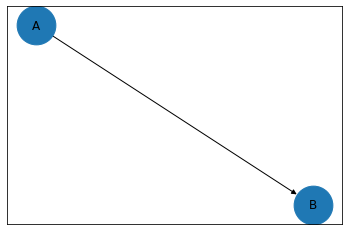

In [5]:
%run elementaryPositiveInteraction.py

The A->B representation means that the value of the node A has an effect on the value of the node B, specifically here a positive effect (A-|B would represent a negative effect). 

The key question is: what is this effect, how do we characterize it quantitatively? There is no general answer to this question, it all depends on the model and on what A, B and the arrow mean. 

But the very first question to answer is: <b> how is B affected by the interaction over a very short period of time </b>? This of course depends on the nature of B (and, as a corollary, of A). If B is a number of molecules, then regardless of how small the time interval during which you monitor B is, if there is a change in B it will be B->B+1 (or B+2, B+3... or B-1 for a negative interaction...). If B is a number of molecules, changes in B triggered by A will be discrete jumps. The same if B is a number of phosphate groups on a kinase substrate. If B is the local concentration of a protein b on a membrane, and "A" represent the fusion event of a vesicle that carry loads of b on this membrane, then each fusion event will also produce discrete jumps in the value of B. 

In all these situations, where the entire network or parts of it is made of nodes that represent biological quantities that vary as sudden "jumps" or "drops" over time, the adequate formulation is <b> a priori </b> stochastic modeling. It is more complicated, and will be discussed in the notebook Section 3: Animating the structure - stochastic modeling. 
But you might argue that everything in biology is discrete, as molecules are all distinguishable, indivual objects… And this is true. Fortunately, those individual objects are numerous, and large numbers provide us a very convenient tool: the <b> Continuum Approximation </b>. Yes, with Capital Letters. 

If there is a large number of similar biological molecules (or, in the general sense, model objects) in a given volume, it is possible to define a molecule concentration (C=number/volume). Then even if stochastic processes generate or destroy individually those molecules, because there are millions of other identical molecules within the volume, the concentration will be barely affected. So the “jump” or “drop” becomes an infinitesimal jump or drop. And it is even better: assume you are watching how the concentration changes for a very short period of time as above, because you have so many of these molecules you are extremely likely to observe an event that changes the number of molecules. So, unlike in the stochastic case where, when observing the system during a short period of time, you were observing either no change or a huge jump/drop in the number of molecule, in the Continuum  Approximation you will <b> systematically observe a small change </b>. 
The purpose of this section is to learn how to correlate these small changes in the different biological quantities represented by network nodes together, with space and time, through mathematical equations. 


## Conditions to use the Continuum Approximation 
In the Continuum Approximation (ok, I stop with capital letters), all the model objects and features must be continuous quantities that vary “smoothly” in time. By continuous, we mean that the quantities are properly defined at each instant of time and space. This is not the case, for instance, for a number of molecules: indeed, because each molecule occupies a particular position, between the molecules there is nothing, and the biological quantity “number of molecules” is not defined. However, a concentration is. 
So, without changes in the model structure and the objects, features and interactions you account for (the “essence” of your model), making a continuous mathematical description of your model requires to:

- deal with concentrations, rather than number of molecules,
- deal with average phosphorylation level over a molecule population rather than the number of phosphate groups on each ,
- deal with densities of susceptible, infected or recovered patients in infectious disease modeling rather than describe each patient,
- deal with a continuously increasing/decreasing gene promoter activity rather than individual binding/unbinding events of the RNA Polymerase pre-initiation complex,
- deal with vesicle fluxes, rather than formation or delivery of individual vesicles, in neurological disease modeling,
- deal with continuous ion fluxes, not discrete events of ion channel opening/closure,
- deal with the density of filamentous actin, rather than individual filaments,
- and if you need to model individual filaments (model object), to study branching properties for instance, use filament length (a continuous quantity) as your object feature rather than the number of actin monomers attached … etc. And so on, and so forth.

The condition for using those different forms of the continuum approximation is the biological quantity is <b> homogeneous </b> at the smallest scale at which our biological system is modeled. The biological quantity doesn’t have to be homogenous throughout the entire system. But we cannot “zoom in” too much if we don’t have enough of the biological molecule for instance. 
This condition is generally equivalent to the fact that each individual event as a minimal impact on the behavior of the entire system. Do we have enough Ca2+ channels along the pre-synaptic surface so that the closure of one particular channel has a minimal impact on calcium flux? If we have 10 channels in total, it is likely that closure/opening of each individual channel has a 10% effect on the total flux. Are we ready to accept a 10% error bar in our modeling? Maybe yes. If not, -> Section 3. IF we have 100 channels, the problem is different: we can try to define a channel density on the pre-synaptic surface, and do continuous modeling. However, we cannot zoom in 50x on a small patch of pre-synaptic membrane, and still want to use continuous modeling of calcium channels on this patch. On another example, even though individual vesicles formed in the ER take with them a significant amount of lipid membrane when they detach, the total surface area of the ER is so huge that the lost surface membrane is a minimal perturbation. Thus, from the point of view of the ER, it is fine to model continuous emission of vesicles: the membrane reservoir is big enough. 
In modeling interacting biochemical networks in a cell, using protein/mRNA concentrations rather the number of molecules requires that there are enough molecules present. At least hundreds, if not thousands, in order to achieve a reasonable <1% accuracy in the mathematical formulation of the model. Below, stochastic modeling will be recommended.  
Even in “borderline” situations where the local homogeneity of all biological variables of the model cannot be guaranteed, continuous modeling still offers a first, easy approach of model resolution that can provide insight before embarking on more complex stochastic modeling. 


## Constructing differential equations: elements of differential calculus
Let us assume we have a model structure, represented by a graph/network, and we want to make a continuous description of its dynamics. Under this approximation, all biological quantities vary smoothly in space and time. Note that smoothly can still be fast, but it excludes discrete jumps/drops in the biological quantities. This means that if we look at the system over a very, very short time interval, shorter than all time-scales of the interactions accounted for, then the variations of the biological quantities during this time interval are very, very small. 

And we will simply ignore them, or at least choose a time interval that is small enough to do so. 

### 1) the elementary A->B network interaction motif
Let's come back to our elementary network interaction A->B, in the “gene regulatory network” meaning:



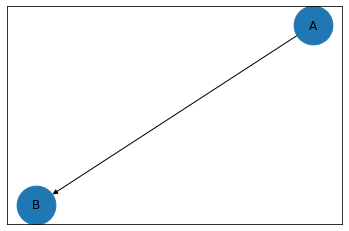

In [6]:
%run elementaryPositiveInteraction.py

<b> The activity of protein a, with concentration A, stimulates the synthesis of protein b, with concentration B. </b>  

Let us compare the situation at a certain instant of time, denoted $t$, and a tiny tiny tiny bit later at a new instant of time $t+dt$ (which we don’t need to specify: it is a “concept”).  At time $t$, concentration of protein a is $A(t)$. Concentration of protein b is $B(t)$. A tiny tiny tiny bit later, at time $t+dt$, concentration of protein a is $A(t+dt)$. Concentration of protein b is $B(t+dt)$. So far, we’ve done almost nothing, just expressing formally the fact that concentrations A and B are functions of time. 

The key step is then to express mathematical relationships between $A(t), B(t), A(t+dt)$ and $B(t+dt)$. Because the time interval is assumed to be very small $A(t+dt) \approx A(t)$ and $B(t+dt) \approx B(t)$. And because the time interval is assumed to be very small, the <b> rate of change </b> of both quantities can be safely assumed to remain constant over the course of the time interval $[t,t+dt]$, equal to its value at the beginning of the interval (time $t$). Therefore, the <b> total change </b> in both quantities $A$ and $B$ between $t$ and $t+dt$ is the product of the <b> rate of change </b> at time $t$ by the <b> duration of the change </b>, i.e. the tiny tiny time increment $dt$:

 $$A(t+dt)-A(t) = Rate\:of\:change\:of\:A(t) * dt,$$ $$B(t+dt)-B(t) = Rate\:of\:change\:of\:B(t) * dt.$$

This is very general, and only expresses mathematically what a “rate of change” is: a change in something (difference between final state and initial state), per unit time. We call this kind of equation a <b> balance equation </b>.

And this is when the model structure comes in: when we express the Rate\:of\:change\:of\:both quantities $A$ and $B$ as a function of other model quantities. “Protein a stimulates the synthesis of protein b” means that the Rate of change of protein b per unit time due to protein a is positive, and increases with the concentration A of protein a. In principle, any positive mathematical function that increases with increasing A could reflect this statement.  

The specifics of how, in your biological model, “protein a stimulates the synthesis of protein b” will dictate the mathematical formulation of the Rate\:of\:change\:of\:$B$ as a function of $A$:

- Can all molecules of protein a equally contribute to synthesis of b? If yes, then $$ Rate\:of\:change\:of\:B(t) = k*A(t),$$ where the k is a rate constant per unit concentration. 


- Is there a threshold concentration $A_0$ of protein a below which it cannot stimulate the synthesis of b, and above which all excess a equally contribute to synthesis? In this case,   $$ Rate\:of\:change\:of\:B(t) = 0$$ for $A(t)<=A_0$ and $$ Rate\:of\:change\:of\:B(t) = k*[A(t)-A_0]$$ for $A(t)>=A_0$ where the k is a rate constant per unit concentration. 


- Do we need the cooperation of 2 proteins a for the stimulation of b synthesis? If yes, $$ Rate\:of\:change\:of\:B(t) = k*A(t)^2$$ where the k is a rate constant per unit concentration to the square. 


- Is there a maximal concentration $B_0$ of protein b above which synthesis becomes inefficient (e.g., due to retroactive negative regulation of b on its own production, might this be a direct effect or an indirect overall regulation by the cell)? In this case the Rate\:of\:change\:of\:$B$ must vanish when $B$ gets close to $B_0$, for instance using $$ Rate\:of\:change\:of\:B(t) = k*A(t)*[1-\frac{B(t)}{B_0}],$$ where the k is a rate constant per unit concentration.  Note that in this situation, to properly reflect the negative regulation of protein b on its own synthesis, the model structure should be modified as

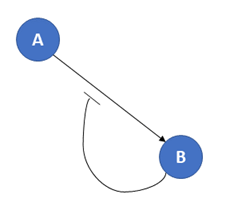



- Does a require the cooperation of another protein c to stimulate b synthesis? If yes, 

$$ Rate\:of\:change\:of\:B(t) = k*A(t)*C(t)$$ 

where the k is a rate constant per unit concentration to the square. Then, the model structure should be written as

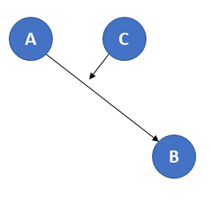

and would include a third protein C, for which a balance equation shall also be written.

<b> But you get the point: the following graph element </b>

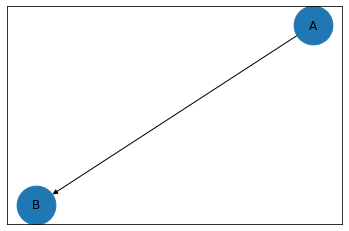

In [7]:
%run elementaryPositiveInteraction.py

<b> is equivalent to </b>

$$B(t+dt)-B(t) = k * F[A(t)] * dt, $$ 

where F is a simple mathematical function of the concentrations $A$ at time $t$ that increases with increasing $A$ (see different examples above), and the physical unit of the rate constant $k$ depends on the particular form of the function F. If $F$ involves other factors, the graph has to be modified accordingly (see examples above). 

So what about the rate of change of $A$? In this particular example, there is no interaction arrow pointing towards the node A: hence, 

$$ Rate\:of\:change\:of\:A(t) = 0.$$

We generally divide both sides of the equation 

$$B(t+dt)-B(t) = k * F[A(t)] * dt, $$ 

by $dt$ and get 

$$\frac{ B(t+dt)-B(t)}{dt} = k * F[A(t)], $$ 

or in other words, 
$$\frac{ B(t+dt)-B(t)}{(t+dt)-(t)} = k * F[A(t)].$$

On the left hand side, the numerator is a small change in concentration $B$ while the denominator is a small change in the time variable. We usually denote this ratio of small $d$ifferences 

$$\frac{dB}{dt}$$

and this ratio can be identified to the first order derivative of the function $B(t)$ with respect to time. Hence, we obtain an equation that links the <b> variations </b> of the concentration $B(t)$ with time, as formalized by the first order derivative $\frac{dB}{dt}$, with the <b> value </b> of the concentration $A$ at the same time $t$: 

$$\frac{dB}{dt}(t) = k * F[A(t)]$$

This type of equation, which involves both the biological variables (such as $A(t)$ here) and their derivatives is called a <b> differential equation </b>. In this section, we have tried to de-mystify this term, by showing how the equations are constructed using small <b> differences </b> in biological quantities, hence the term “differential” equation. When there is only one variable (here, the time $t$), we talk of <b> ordinary differential equation(s) </b> (ODEs). When there are multiple variables that influence the biological quantities (e.g., time AND spatial position in the system), we talk of <b> partial differential equation(s) </b> (PDEs), because as we will see below, it is important to specify with respect to which of the variables the derivatives of the biological quantities are taken.  

This full derivation doesn’t have to be performed every time we write down the equations for a model. With some training, which you will in part acquire by doing the exercises throughout this notebook, you will become able to write the differential equations of small interacting networks just by looking at the network structure. 

But it is fundamental to remember where these equations come from: indeed, what we have done here is the most basic and the most important reasoning that will almost always allow you to convert a conceptual model into a mathematical model. It is quite straightforward for interacting biochemical systems and can be a bit more complex when modeling more complex objects, but the “cooking recipe” we have followed here is always the same and can be summarized as 4 steps:
- List the “values” of all biological quantities that make the model (fluxes, concentrations, densities …) at an instant t. These are not known at this stage (the model will be solved for these quantities), but they “exist”. 
- write down the <b > rate of change </b> of each biological quantity as a function of all other quantities during the time interval $[t, t+dt]$; remember that  $dt$ is infinitely small, hence during this time interval, biological quantities are assumed to have a constant value, the value they had at time $t$. 
- Update the the values of the quantities at time $t+dt$ writing “balance” equations such that: Quantity at time $t+dt$ = Quantity at time $t$ + Change in quantity during interval $[t, t+dt]$, and because Change in quantity during interval $[t, t+dt]$ = rate of change * dt, the balance equation becomes Quantity at time $t+dt$ = Quantity at time $t$ + rate of change in quantity * dt.


### 2) Enforcing conservation laws
Let's have a look now to a slightly different version of the same graph/network element


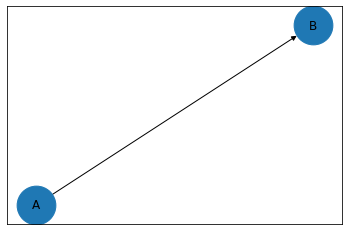

In [20]:
%run elementaryPositiveInteraction.py

where, this time, the pointed arrow has the meaning of protein b “activation” by an enzyme a that is not destroyed upon activation of b. 

Question 1: Can the node B represent the total concentration in protein b, as in 1) ? Why?


In [ ]:
# %run solutionQuestion1.py

So let’s assume that node B represents the concentration of <b> active proteins b </b>, which we will denote $B_{act}$.

Question 2: why the changing rate of $B_{act}$ (right-hand side of the ODE where the left-hand side is $\frac{dB_{act}}{dt}$  cannot be simply $k * A(t)$? What other quantity is missing in the estimation of the changing rate?


In [ ]:
# %run solutionQuestion2.py

In this situation, a protein b can be activated only if the “activator” protein a actually meets the inactive protein b. The probability for this to happen is, in somewhat dilute “solutions” like intra- and extra-cellular environments generally, proportional to the concentration of both species. This is called the <b> mass action law </b> and is a broadly applied approximation that has very deep roots we’re not interested in at this stage. 

Hence, here the mathematical meaning of the “a activates b” simple graph/network is:

$$\frac{dB_{act}}{dt} = k * A(t) * B_{inact}(t)$$

So the situation, at first sight, resembles the ABC example of the previous section (1) of this notebook where “protein a requires the cooperation of another protein c to stimulate b synthesis”, with the difference that “protein a requires the presence of inactive protein b to stimulate creation of active protein b”. And in this case, following our own recommendations, we should write a differential equation for the “third quantity”, i.e. the concentration of <b> inactive </b> proteins b, $B_{inact}$. 

You can guess what is coming …

Question 3: What is the corresponding ODE for the concentration of inactive protein b, $B_{inact}$ ?


In [ ]:
# %run solutionQuestion3.py

Hence, this second ODE does not bring a lot more information about the dynamics: because inactive proteins b are converted into active proteins b, it is not needed to study both the variations with time of the concentrations of active and inactive proteins B, both are equivalent in terms of the information we have on the system. 

In this scenario, we are left with 2 options. Either we solve the equation for $B_{inact}$, which only involves A and $B_{inact}$ and no third quantity. Or we remain with our initial definition of the node B, i.e. the concentration of active proteins b, and we thus need to eliminate $B_{inact}$ from the equation.

This can be achieved by <b> enforcing a conservation law </b>. Indeed, in our system, because there is nothing that alters the total concentration of proteins b, the sum of the concentrations of active and inactive proteins does not change in time: it is a constant, which we will denote $B_0$: 

$$B_{inact} + B_{act} = B_0$$

Or equivalently 

$$B_{inact} = B_0 - B_{act} $$

Using this identity in the ODE for $B_{act}$, we can get rid of the $ B_{inact}$ variable and we obtain:

$$\frac{dB_{act}}{dt} = k * A(t) * [B_0 - B_{act}(t)] = (k*B_0) * A(t) * [1-\frac{B_{act}}{B_0}].$$


This resembles another elementary network motif that we discussed in the previous section of this notebook: 

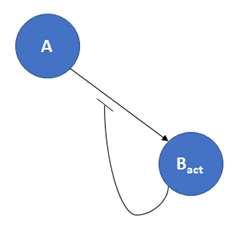



Conservation laws are ubiquitous to biomolecular systems, and need to be used as much as possible to reduce the number of independent biological quantities in the equations, which reduces the size of the systems of multiple ODEs which describe the dynamics of entire networks (more complex than the A->B simple module).  

Exercise 1: Which ODE(s) would represent the model below? Is it different from the previous example?

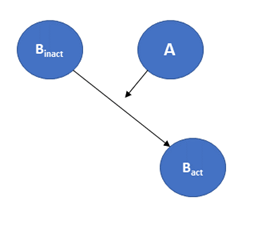


In [31]:
#%run solutionExercise1.py

Exercise 2: How would you model the kinetics of a protein kinase A that catalyses the phosphorylation of a constant pool of substrate S, of total concentration S_0 (elementary network + corresponding ODE)?

In [34]:
 #%run solutionExercise2.py

<b> What about A(t)? </b>

In the examples we have seen so far, the protein a affects b, but nothing affects a, and as a consequence there is no “rate of change” of A(t), or in other words the ODE for A(t) is $dA/dt=0%, or again in other words, A(t) remains constant over time. 

However, there is a very important class of biomolecular interactions that is sometimes loosely represented with a simple A->B arrow: the case where the protein a itself disappears from the A pool while activating the protein b, for instance by making a a-b complex with b that is active towards some downstream signaling pathway, while the unbound protein b is inactive. 

In this case, for any increase in concentration of activated b during the small time increment $dB_{act}= B_{act}(t+dt)- B_{act}(t)$, because activating b means forming a stoichiometric complex with a, there is an identical <b> decrease </b> of the concentration A in free, unbound protein a $dA= A(t+dt)- A(t) = - dB_{act} \neq 0 $.  Therefore, we have to write an ODE for A(t), in addition to the ODE for $B_{act}(t)$:

$$\frac{dB_{act}}{dt} = k * A(t) * B_{inact}(t)$$
$$\frac{dA}{dt} = - k * A(t) * B_{inact}(t)$$

And for the sake of clarity, let’s denote the concentration of activated b (the complexes) AB(t) and the concentration of inactive b just B(t).  The equations become: 

$$\frac{dAB}{dt} = k * A(t) * B(t)$$
$$\frac{dA}{dt} = - k * A(t) * B(t)$$

Here again, we have three molecular species, leading to three different biological variables (the concentrations). But because of the underlying <b> conservation of the total concentration of both proteins a, $A_0$, and b, $B_0$ </b>, 

$$A(t) + AB(t) = A_0$$
$$B(t) + AB(t) = B_0,$$

which can be used to simplify the resolution of the problem. This situation, where an elementary biochemical reaction “converts” something into something else and thus generates identical terms of opposite signs for the molecular species involved in the conversion is very frequent. 


<b> What about complex dissociation? </b>
In the previous example, the reaction of complex formation is total: no dissociation is accounted for. If we want to account for the complex dissociation, we have to modify the model graph to account for the fact than an activated protein b (i.e., in complex with a) can “deactivate” (complex breakdown), releasing a protein a:

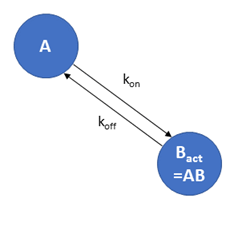

What are the ODE equations describing the time evolution of this system? Let’s take one step back, and write again the balance equations

$$A(t+dt)-A(t) = Rate\:of\:change\:of\:A(t) * dt$$
$$B_{act}(t+dt)-B_{act} (t) = Rate\:of\:change\:of\:B_{act} (t) * dt.$$

As before, $ B_{act}(t)$ increases with a rate of change $k_{on} * A(t) * B_{inact}(t)$ (complex formation). However, here the presence of a reciprocal reaction (complex dissociation) generates a <b> second term </b> in the rate of change, a term that tends to <b> decrease </b> the concentration of activated b (complexes), with a possibly different rate constant $k_{off}$. The concentration of complexes per unit time that dissociate is, reasonably, proportional to the concentration of complexes, hence this second term can be written $ - k_{off} * B_{act}(t)$. These two terms add up in the total rate of change, because each molecular reaction can happen  independently of the other. As a result, we therefore obtain the ODE for  $B_{act}$:

$$\frac{dB_{act}}{dt} = k_{on}  * A(t) * B_{inact}(t) - k_{off} * B_{act}(t),$$

and rewriting as before $B_{act}(t)$ as $AB(t)$ (concentration in complexes) and  $B_{inact}(t)$ as $B(t)$ (concentration in unbound protein b), we get:

$$\frac{AB}{dt} = k_{on}  * A(t) * B(t) - k_{off} * AB(t).$$

Question 4: What is the corresponding ODE for A(t)?


In [37]:
 #%run solutionQuestion4.py

As we will see below, this ODE defines the dissociation constant of the complex. 

### 3) ODE construction and expression of conservation laws in different contexts 
So far, we have written balance equations at two different instants of time, and thus we have constructed time-dependent ODEs. This is very common in biology, and certainly a good starting point. 
However, there are a certain number of contexts where it is important to be very cautious when writing the balance equations. For instance, when the spatial support/compartment on which the model is considered is changing over time (see notebook Section 1 : Building the model structure). This is the case of e.g. a growing cell or organelle, or an expanding cytoskeletal network… Then it is more convenient to use the <b> number of molecules (or moles) N </b>  as a model variable rather than concentrations,  even in the continuum approximation. Equations for $N$ are obtained from the type of equations discussed in 1) and 2) above using $$N(t)=C(t)*V(t)$$ where the volume $V(t)$ of the compartment in which molecules/moles are “counted” depends on time. 
These equations are then supplemented by  a <b>  balance equation for the volume $V$ </b>  of the growing (or shrinking) compartment in the form 

$$V(t+dt)-V(t)= Rate\:of\:growth * dt$$

In this situation, the conservation law has also to be written carefully: if the volume of the spatial support/compartment on which the model is considered is changing over time, then total concentrations are generally <b> not </b> conserved, but total number of molecules are.  Hence, instead of writing $A(t) + AB(t) = A_0$ and $B(t) + AB(t) = B_0$ in the case of two proteins a and b of concentrations A(t), B(t) forming a complex ab of concentration AB(t), we should write: 

$$N_A(t) + N_AB(t) = N_{A_0}$$
$$N_B(t) + N_AB(t) = N_{B_0}$$

which is equivalent to 

$$(A(t) + AB(t))*V(t) = A_0*V_0$$
$$(B(t) + AB(t))*V(t) = B_0*V_0,$$

where $V_0$ is the initial volume when the concentrations $ A_0$ and $B_0$ are measured. And this is again different if the proteins a, b and the complex ab are restricted to different compartments of different volumes, such as for instance freely diffusing cytosolic a that binds a membrane-bound b, forming a membrane-bound complex ab…. We can’t cover all possibilities here. But the rule of thumb is:

<b> BE CAU-TIOUS </b>. 

Another important category of situations where establishing the balance equations requires additional care is the situation where the model objects features (e.g. protein concentrations or activity, fluxes of vesicles…) are inhomogeneous in space. Not at the microscopic scale, in which case we wouldn’t be able to use the continuum approximation. But rather, at an “intermediate” scale, like for instance when a cell is polarized along a certain axis and its constituents have space-dependent concentrations along the polarity axis, or when there is an external gradient in chemoattractants that produce an internal gradient in signaling molecules…. and many other situations.

Whenever model object features become space-dependent, the balance equations must account for fluxes of molecules (or more generally, model objects) between different regions of the cell. Those fluxes spontaneously tend to homogenize the system, but cells also actively maintain fluxes sometimes. The construction of space-dependent balance equations is detailed in the section “Constructing partial differential equations: space-time dependent modeling” below. 

Finally, we want to emphasize that building balance equations yourself is not always necessary. Or at least, not all of them. Modeling of biological systems can be based upon fundamental physics laws, in particular when it comes to modeling cell mechanics, including cell motion of shape changes. It is interesting to note that many of these laws have been demonstrated using balance equations, and thus they take the form of differential equations (ODEs and PDEs). Since the purpose of this course is neither to demonstrate physics laws nor to learn how to solve complex physics equations, we have listed such laws in a Supplemental notebook. The notebook also includes a short description of the meaning of the different variables and parameters, and how they are generally used in biology, and should be viewed as both a “toolbox” and a “glossary” that you might use when collaborating with quantitative scientists to build complex models. 

More information (technical) on modeling cell mechanics in the following articles, written in a very pedagogical way yet exposing up-to-date models:

https://doi.org/10.1063/1.4900941

https://doi.org/10.1002/wsbm.1275

https://doi.org/10.1109/ISBI.2014.6867859




### 4) Tips to check the consistency of an ODE framework 
After having worked hard to construct the system of ODEs, and simplify them according to model hypotheses and conservation laws, we recommend to take a step back and “check” that equations are correct. It is difficult to be absolutely sure they are correct, especially when lacking experience in modeling. However there are 3 simple verifications that can allow to spot errors.

<b> 1) control that the units are correct : </b> all the terms that are summed or subtracted on each side of an equation need to have the same unit. This also applies to both sides of the equation. When constructing each ODE, you will introduce different rates, and depending on the kind of terms they are associated with, those rates will have particular units. For instance, the equation derived above $\frac{dB_{act}}{dt} = k_{on}  * A(t) * B_{inact}(t) - k_{off} * B_{act}(t)$ involves 3 terms. On the left-hand-side,  $\frac{dB_{act}}{dt}$ has the unit of a concentration per unit time. Thus, $ k_{off} * B_{act}(t)$ must also be a concentration per unit time, which implies that $ k_{off}$ has the unit of the inverse of a time. But also, $k_{on}  * A(t) * B_{inact}(t)$ is also a concentration per unit time, which means $ k_{on}$ is the inverse of a concentration and the inverse of a time. We say that its <b> dimension </b> is $M^{-1}.s^{-1}$.

<b> 2) control that the conservation laws are satisfied by summing the corresponding ODEs : </b> if, for instance, the ODEs consist in the concentration, at constant volume, of a kinase substrate S in its non phosphorylated form $p_0$, and at $n$ different phosphorylation levels $p_1$, $p_2$ … $p_n$,  then when summing the ODEs for $dS_{p_0}/dt$, $dS_{p_1}/dt$, $dS_{p_2}/dt$, …  $dS_{p_n}/dt$ one should find 0. This is because the total concentration in substrate, $S_{tot}= S_{p_0}+ S_{p_1}+ S_{p_2}+ … + S_{p_n}$ is a constant over time in this  model. Similarly, if we model the formation of a complex a+b->ab, then the conservation of the total pool of proteins a and b imposes $A(t) + AB(t) = A_0$ and $B(t) + AB(t) = B_0$ (see above), and as a consequence when writing (still at constant volume) the ODEs for $dA/dt$, $dB/dt$, and $dAB/dt$, we should find $dA/dt+dAB/dt=0$ and $dB/dt+dAB/dt=0$. For a more complex model, involving more species, this is still true, the only difference being that there will be more equations to add and conservation laws to write. On a more practical aspect, the different terms in all equations will cancel two by two. You’ll see when you do it.


<b> 3) control that the system prevents biological quantities from “diverging”: </b> this might not be the case if the ODEs are supposed to, on purpose, describe the biological system for a limited amount of time. If, however, the  ODE framework is supposed to be unbounded in time, then for any biological quantity $Y(t)$, the sign of the coefficient in front of $Y(t)$ in the right-hand-side of the ODE for $dY/dt$ <b> must </b> be negative, at least when time approaches infinity asymptotically. And this is also valid if this coefficient is “composite” and includes multiple terms, other concentrations… . Overall, it must be negative. Indeed, if it is positive then $dY/dt = (k>0) * Y(t) $ establishes a “positive feedback” that makes the quantity $Y(t)$ become infinite. 
These tips will allow you to detect many errors when building ODEs. We are happy to know if you have more tips of this kind to propose to enrich this section. 


### 5) Time for some training exercises: 
<b> Exercise 3: </b> Write a model network to represent a system where a mRNA is constitutively transcribed in the nucleus at a rate $k_t$, then exported from the nucleus to the cytosol with a rate $k_{exp}$, then degraded with the rate $k_{deg}$. Derive the corresponding ODE(s). Is there a conservation of the total number of mRNA? Why? 

In [78]:
#%run hintExercise3.py

In [77]:
# %load solutionModelExercise3.py

In [76]:
#%run solutionODEsExercise3.py 

<b> Exercise 4: </b> Derive the ODE(s) that correspond to the formation of a trimolecular complex $A_2B$, at constant volume and based upon a limited pool of A and B constituents, with total concentrations $A_0$ and $B_0$. Choice is free for the notations of the rates. Write the conservation equations for the total pool of A and B. What do you conclude?

In [74]:
#%run hintExercise4.py

In [75]:
#%run solutionODEsExercise4.py 

<b> Exercise 5: </b> Let us remember our simplified pathway of glucose-regulated gene expression: 
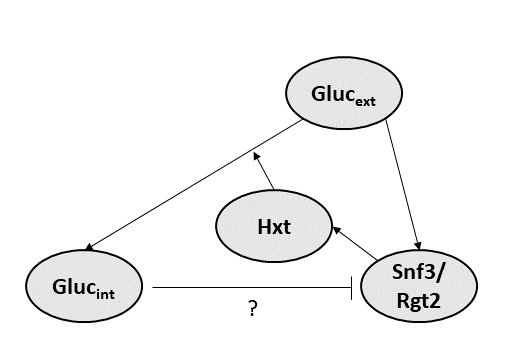

The arrows have the following meaning: an unlimited pool of external glucose (concentration $G_0$ activates the synthesis of Hxt proteins through Rgt2 and Snf3 receptors. We assume the synthesis rate of Hxt to be proportional to the sum of [Rgt2] and [Snf3], and to the concentration of external glucose. Hxt proteins import external glucose. The concentration of internal glucose [G_i] represses the expression of Snf3: we assume Snf3 synthesis rate is inversely proportional to internal glucose concentration. Rgt2 is synthesized by an independent pathway with rate $ks_{Rgt2}$. To simplify, all proteins have the same degradation rate $k_{deg}$. 
Which ODEs would describe the dynamics of such a  model? Is there an equation for $dG_0/dt$ ? How is it different if the external glucose pool is limited (e.g., finite concentration $G_0$ in a limited compartment of volume $V_{comp}$)?


In [82]:
#%run solutionODEsExercise5.py 

<b> Exercise 6:</b> Let us get slightly out our comfort zone and model something different: membrane organelles. We assume that a membrane organelle A (e.g., the ER) sends to a membrane organelle B (e.g., the Golgi apparatus) a continuous flux of small membrane spherical vesicles of radius $r_a$ at a rate that depends linearly on the total surface of the organelle. This would be the case, for instance, if budding of a vesicle was triggered by some initiator membrane-bound protein that would be present on the surface of A at homogenous concentration. We're not too far from a real system! In return, the organelle B sends to organelle A a continuous flux of large membrane spherical vesicles of radius $r_b>r_a$ at a rate that depends linearly on the total surface of the organelle B. 

Is this model sufficient to predict the time evolution of the total surface area of the organelles? If so, what would be the ODEs describing this simple model? 

In [86]:
#%run solutionODEsExercise6.py 


## Analytical resolution of ODE(s) 
Now that we know how to construct (ordinary) differential equations, it is time to learn how to solve them. We also use the word “integrate” when referring to the solving of a differential equation. The equations we have seen so far are called of “first-order”, because they involve only the first order derivative of the different variables with respect to time. This is the simplest class of differential equations.  And at this stage it is crucial to realize that <b> even for this simplest class of equations, there is no general method to solve them </b> that would work all the time, like a cooking recipe. Below (sections 1-4), we present some techniques; but new techniques are constantly being developed by mathematicians (section 5), and an equation that cannot be solved today might be solved tomorrow. For those equations that can’t be solved, it is possible to use computer-based integration (section 6).
### 1) Single ODE: separation of variables and other integration techniques
But let us start with the beginning: a single ODE that described the dynamics of a single biological variable $Y(t)$ from some initial state $t=0$ where $Y(t=0)=Y_0$. Let’s also assume this ODE has a very familiar form, and let’s also assume that $Y(t)$ is never exactly 0 (most biological quantities we deal with are strictly positive - when changing signs, need to pay attention):

$$ \frac{dY}{dt}=-k*Y(t),$$
where $k$ is a positive constant. This is the ODE representing an exponential decay, we know the solution. But how can we <b> find </b> it? Let’s divide both sides by $Y(t)$
$$ \frac{dY/dt}{Y(t)}=-k,$$

On the left-hand-side of this equation, we recognize the ratio between the derivative of a function $Y(t)$ with respect to its (unique) variable $t$, and the function itself. Remember high-school maths lessons: this is the derivative of the natural logarithm of $Y(t)$. Let’s write it this way: 
$$ \frac{d (\ln Y)}{dt}=-k.$$

Let’s give a different name to the function $\ln Y$, which is also a function of time since $Y$ is a function of time, and let’s call it $X$:  $\ln Y (t) = X(t)$. If we find $X$, we find $Y$, so the problem is completely equivalent. Note that at time $t=0$, by definition, $X(t=0)=\ln Y_0$. So far, we’ve just been renaming things, and the equation above might be rewritten with the new function X: $$ \frac{dX}{dt}=-k.$$ But now remember where the “d’s” in differential equations come from: a balance equation comparing the values of functions at the times t and t+dt. Hence, in terms of these tiny tiny tiny differences, the equation above can be re-written: 
$$ \frac{X(t+dt)-X(t)}{(t+dt)-(t)}=-k$$
or equivalently,
$$ X(t+dt)-X(t) =-k[(t+dt)-(t)].$$

This equation, written in terms of the tiny tiny tiny difference, can be written at any time $t$. In particular, at $t=0$:

$$ X(0+dt)-X(0) = X(dt)-X(0) = -k[(0+dt)-(0)] = -k*dt.$$
And at $t=dt$:
$$ X(dt+dt)-X(dt) = X(2*dt)-X(dt) = -k[(dt+dt)-(dt)] = -k*dt.$$
And at $t=2*dt$:
$$ X(2*dt+dt)-X(2*t) = X(3*dt)-X(2*t) =-k[(2*dt+dt)-(2*dt)] = -k*dt.$$

… and so on and so forth. These equations can be combined: assume we sum up the 3 equations written above, we get

$$ X(dt)-X(0) + X(2*dt)-X(dt) + X(3*dt)-X(2*t) = -k*dt -k*dt -k*dt $$
which simplifies to 

$$ X(3*dt)-X(0) = -k*(3*dt).$$

The beauty of this reasoning is that it works regardless of the number of times you add the small increment $dt$, and for any integer $n$, we would sum up $n$ such equations and get to $X(n*dt)-X(0) = -k*(n*dt)$. And that goes even further: for any instant of time $t$, we would be able to exactly divide $t$ into a large number $n$ of such small $dt$ intervals, so that we have both $t=n*dt$ and $n$ large. We just have to pick a large enough $n$ and set $dt=t/n$. And the above reasoning would still be valid. And what would we find?
$$ X(n*dt)-X(0) = -k*(n*dt)$$
 which by definition of $n$ and $dt$ is just: 
$$ X(t)-X(0) = -k*t.$$
So 
$$ X(t) = X(0)-k*t.$$

We have found $X(t)$, for any time $t$. So we have solved the problem. Explicitly writing $Y(t)$, which is “linked” to $X(t) by the relationship $\ln Y (t) = X(t)$, requires a couple of basic calculations but they are straightforward:

$$ Y(t) = e^{X(t)} = e^{ (X(0)-k*t) }= e^{ (X(0))}*e^{ -k*t} = e^{ (\ln Y_0)}*e^{ -k*t} = Y_0*e^{ -k*t}.$$

Classic exponential decay. 
And what about the 

$$ \frac{dY}{dt}=k*Y(t)$$

ODE? No difference, except the sign: 

$$ Y(t) = Y_0*e^{ k*t}.$$

Classic exponential growth.

We fully admit, this entire derivation has been a bit tedious. Feel free to skip any of these steps in practice! 

But we have learned 2 important things: first, in those first order ODEs, we can “manipulate” the “d something” quantities (e.g. $dt$, $dY$, $d(\ln Y)$ … etc) as is they were <b> numbers </b>. And this will be very useful, as you will see straight from the next paragraph. We can move them, multiply them, divide them… from the equation $\frac{d (\ln Y)}{dt}=-k$, we can directly write $d (\ln Y)=-k*dt$. And we can even write $d (\ln Y)=d(-k*t)$, since the the $-k$ rate coefficient is a constant in time, so evaluated at time $t$ or $t+dt$ it is not any different. 

And this brings us to the second point we have learned: the “d something” quantities can be summed, from the initial starting point (e.g., here, $t=0$ but that can be of course any starting time $t_0$) to the final time $t$ where we want to evaluate the functions, and when summing up the tiny tiny tiny differences all the “intermediate times” between $t_0$ and $t$ will vanish, leaving us with only the initial and final values. This kind of sum (of tiny tiny tiny differences) is called an <b> integral sum </b>, or just <b> integral </b>, and is represented by the symbol $\int$. And we have established above that 

$$ \int_{t_0}^{t} d(something) = something(t)-something(t_0)$$

This formula is the “continuous” equivalent of the discrete sums over successive $dt$ intervals, as we did in the derivation. And this formula is valid regardless of what the “something” is: 

$$ \int_{t_0}^{t} dY = Y(t)-Y(t_0)$$
$$ \int_{t_0}^{t} dt = t-t_0$$
$$ \int_{t_0}^{t} d(\ln Y) = (\ln Y)(t)- (\ln Y)(t_0) = ln (Y(t)) - ln (Y(t_0))$$

So we can already envision how convenient it will be to express both sides of an ODE in the form “d(something)”, called the differential form. And in this purpose, there are a couple more crucial points to make: first, the integral sum $ \int_{t_0}^{t} dY$ depends of course on the values of $Y$ over time, but more importantly depend on the time $t$ itself. The larger the time, the more infinitesimal terms we have to sum (remember the full tedious derivation), which give a different value to the integral sum. We can write I(t)= $ \int_{t_0}^{t} dY$ for instance, as the integral sum is a function of time. So, what about the tiny tiny tiny difference $I(t+dt)-I(t)$? 

Let’s again remember the full derivation in terms of $dt$ increments: the sum we are doing to compute $I(t+dt)$ contains one more term than the sum to compute to $I(t)$, so when doing the difference we are left with only the last term $Y(t+dt)-Y(t)$:

$$I(t+dt)-I(t)=Y(t+dt)-Y(t)$$

This is also obvious from the above identity $ \int_{t_0}^{t} dY =  Y(t)-Y(t_0)$:

$$ I(t+dt)-I(t)=\int_{t_0}^{t+dt} dY - \int_{t_0}^{t} dY = [Y(t+dt)-Y(t_0)]- [Y(t)-Y(t_0)]= Y(t+dt)-Y(t).$$

So why stating so much of the obvious ? Remember: the “d(something)” can be multiplied, divided…
In the expression for $I(t)$, we can divide and multiply $dY$ by a small difference in another time reference $d \tau$: 

$$ I(t)=  \int_{t_0}^{t} dY =  \int_{t_0}^{t} \frac{dY}{d \tau} \, d\tau$$

but since $ I(t)= Y(t)-Y(t_0)$ by definition, we obtain: 

$$ Y(t)-Y(t_0) =  \int_{t_0}^{t} dY =  \int_{t_0}^{t} \frac{dY}{d \tau} \, d\tau$$
$$ Y(t) = Y(t_0) + \int_{t_0}^{t} \frac{dY}{d \tau} \, d\tau$$

It means that we can construct the value of a function $Y$ at a future time $t$ from its value at an initial time $t_0$, just by summing up the values of its derivative $\frac{dY}{d \tau}$ at all the intermediate times $\tau$, multiplied by the time interval $d \tau$. 

Obvious, isn’t it? Maybe, yes. 

But retrospectively, this formula is also valid when we <b> don’t know </b> the function $Y(t)$, or in other words when we can’t easily express the integrand (the function that’s under the $\int$ symbol) as the derivative of something explicit. By analogy with the expression immediately above, The formula 

$$F(t) = F(t_0) + \int_{t_0}^{t} f(\tau) \, d\tau$$ 

defines a function whose derivative with respect to the time t is the integrand (the function $f$) at the same time $t$. 
So how does this become handy to solve real ODEs? Let’s now assume that the decay rate $k$ depends on time:

$$ \frac{dY}{dt}=-k(t)*Y(t),$$

We can still write 

$$ dY/Y=-k(t)*dt,$$

and identify the left-hand-side as the differential of the natural logarithm $dY/Y=d(\ln Y)$. Thus, when “integrating” this term, we will still get 
$$ \int_{t_0}^{t} d(\ln Y) =  ln (Y(t)) - ln (Y(t_0)).$$

However, on the right-hand-side, 

$$ -k(t)*dt \neq d(-k(t)*t) $$

because $k(t)$ depends on time. The differential $ d(-k(t)*t)$ has two terms, $-k(t)*dt$ indeed but also $-t*dk$ (remember the derivative of a product of functions in high school: this is similar). So, we cannot immediately find an analytical expression for  $-k(t)*dt$ as a “d(something)”. Does that mean we cannot integrate our ODE? 
No. Thanks to the remark we made above, we can integrate the right-hand-side at least formally in the form 

$$ \int_{t_0}^{t} [-k(\tau)] \, d\tau$$ 
This expression defines a function of time, whose derivative at time $t$ is $-k(t)$, and whose value in $t=t_0$ is 0 (because the integral sum contains… no terms between $t_0$ and itself). So now, let’s combine both sides: 

$$ ln (Y(t)) - ln (Y(t_0)) = \int_{t_0}^{t} [-k(\tau)] \, d\tau$$ 
$$ ln (Y(t)) = ln (Y(t_0)) + \int_{t_0}^{t} [-k(\tau)] \, d\tau$$

and thus, passing to the exponential, 

 $$Y(t) = Y(t_0)*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau}.$$

Isn’t it what we were looking for? The value of the function of time in the exponential is 0 for $t=t_0$, and because $e^0=1$, $Y(t=0)=Y_0$. The derivative of the exponential of a function is the derivative of the function times the exponential of the function ($d/dt(e^{f(t)})=df/dt* e^{f(t)}$, thus the derivative of the function $Y(t)$ defined above is 

$$\frac{dY}{dt} = Y(t_0)* \frac{d}{dt}[\int_{t_0}^{t} [-k(\tau)] \, d\tau]*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau}$$

and because, as stated above, 

$$\frac{d}{dt}[\int_{t_0}^{t} [-k(\tau)]] = -k(t),$$

$$\frac{dY}{dt} = Y(t_0)* (-k(t))*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau} = -k(t)*Y(t)$$

So, this formal expression 

$$Y(t) = Y(t_0)*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau}$$
 
for $Y(t)$ solves the initial ODE, with time-dependent coefficient $k(t)$. Mathematicians demonstrated that this solution is unique, provided that the initial value $Y(t=0)=Y_0$ is known (also known as the “initial state”. In the absence of this indication, this solution can be multiplied by any constant and the function obtained will also be a solution. Now you can use mathematical handbooks listing integration formulas “blindly” to compute the integral and solve the ODE, because you know what all of this <b> means </b>. If you can't do it yourself, at least you know what kind of help you need to ask to a mathematician or physicist to solve the ODE model. 

We hope these were useful reminders of differential and integral calculus. We encourage you to practice the manipulation of differential forms, integrals, derivatives… by doing exercises from any basic maths online content. 




What we have just done here is called <b> separation of variables </b> and this is a powerful technique that should always be tried to solve an ODE. Indeed, the general form of a first order ODE is 

$$ \frac{dY}{dt}=f(t,Y),$$

where $f(t,Y)$ is a function of both time and the “unknown” function of time we want to find, $Y$. If when writing the balance equation of a model, there is something that multiplies $ \frac{dY}{dt}$, then no problem just divide the entire balance equation to obtain the form above. 
Then, the next step is to rewrite $f$ in a way that “separates” the contributions of $Y$ and $t$. The easiest situation is when $f(t,Y)$ can be factorized into $ f(t,Y)=g(Y)*h(t)$ in which case we have: 

$$ \frac{dY}{dt}= g(Y)*h(t),$$

from which we get 

$$ \frac{dY}{g(Y)}= h(t)*dt,$$

Following the cooking recipe we just learned, we will integrate the right hand side between times $t_0$ and $t$: 

$$ \int_{t_0}^{t} [h(\tau)] \, d\tau$$ 

On the left hand side, we will try to manipulate $1/g(Y)$ to express $\frac{dY}{g(Y)}$ as an exact differential (a “d(something)”, like we did for $1/Y$ which integrated to $\ln Y$), we might succeed in doing so (see examples below). But even if we don’t see an obvious way to do so, we can still write the integrated left hand side as 

 $$ \int_{Y_0}^{Y(t)} [\frac{1}{g(\upsilon)}] \, d\upsilon,$$

in a very similar fashion as we did for the right hand side. The difference, though, is that because on the left hand side we have a tiny tiny tiny difference in $Y$, not in $t$, the bounds of the integral are values of $Y$ at the initial and final times, and not the initial and final times themselves. Hence the solution $Y(t)$ that solve the ODE with the initial condition is a function that satisfies:

$$ \int_{Y_0}^{Y(t)} [\frac{1}{g(\upsilon)}] \, d\upsilon = \int_{t_0}^{t} [h(\tau)] \, d\tau.$$

Again, we can ask for help to compute the integrals if we don’t manage to do it. The final result we get from this approach is an algebraic relationship (implicit) between $Y(t)$ and $t$, involving the ODE parameters that appear in the functions $g$ and $h$. Even if solving analytically this implicit relationship can be difficult, numerically it is waaaaaayyy easier to solve an algebraic equation than an ODE, so we’ve progressed towards a solution. 

But  this method of separation of variables requires the right-hand-side of the ODE to be factorized as  $ f(t,Y)=g(Y)*h(t)$. This is not always doable, and even when it is doable, it is not always obvious at first sight. Do get to such a factorized form, we have to manipulate a bit the original ODE and its variables. With the experience, you will get better at doing this. Also, we remark that <b> if there exist solutions of the equation </b> $g(Y)=0$ in the algebraic sense, so "numbers" $Y_i$ such that $g(Y_i)=0$, then those "numbers" considered as <b> constant </b> functions of time $Y(t)=Y_i$ are also solution of the ODE. Such solutions would be missed by the general integration procedu re shown above because they correspond to "divisions by 0". Thus, let's keep in mind that <b> some constant solutions might be missed </b> when separating the variables, and must be searched for solving $g(Y)=0$. 

Let’s close this bracket on constant solutions and look at an example: we want to solve

$$ \frac{dY}{dt}=-k(t)*Y(t)+g(t),$$

where $g(t)$ is a function of time. 

Let’s transfer $-k(t)*Y(t)$ to the left-hand-side and rewrite the ODE:

$$ \frac{dY}{dt}+k(t)*Y(t)=g(t),$$

If we want to divide this equation by $Y(t)$ and multiply by $dt$ as we would do without $g$, we end up generating a term $ g(t)*dt/Y(t)$, that would prevent separating the variables $t$ and $Y$. So this $g(t)$ is a problem. What would we do without $g$? We would do what we did above (this is the same equation without $g$) and we would get

$$Y(t) = Y(t_0)*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau}.$$

This expression solves $ \frac{dY}{dt}=-k(t)*Y(t)$. And this is the case of all multiplicative products of this function, as discussed above. So, for instance, the expression $e{\int_{t_0}^{t} [-k(\tau)] \, d\tau}$ without the multiplicative factor is a solution, so this term has the <b> power to cancel out </b> $\frac{dY}{dt}+k(t)*Y(t)$. Even if that does not solve the complete equation, because of $g$, getting rid of these 2 terms would still simplify our life. So, let us look for a solution of the full equation in the form:

$$Y(t) = X(t)*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau},$$

where $X(t)$ is a new “unknown” function. Then we can report this form for a solution in the full initial ODE to get a new ODE for $X(t)$:

 $$ \frac{dY}{dt}+k(t)*Y(t)= \frac{dX}{dt}*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau} -k(t)*X(t)* e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau}+k(t)* (X(t)*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau} ) = g(t)$$

which reduces to, after simplification of the last 2 terms of the left-hand-side:

$$ \frac{dX}{dt}*e^{\int_{t_0}^{t} [-k(\tau)] \, d\tau} = g(t)$$

and thus to, after multiplying the two sides by $e^{\int_{t_0}^{t} [+k(\tau)] \, d\tau} \, *dt$:

$$ dX= g(t) e^{\int_{t_0}^{t} [+k(\tau)] \, d\tau} \, *dt$$

How does that look like? Left hand side, only one “variable”, the unknown function $X$, in its differential form. Integration will give $X(t)-X(t_0)$. Right hand side, only time. Integration will require to use a different “name” for the intermediate times when integrating, because $\tau$ is already used in the integral in the exponential. So let’s use capital $T$. We get, after integration from $t_0$ to $t$:

$$X(t)= X(t_0) + \int_{t_0}^{t} [g(T) e^{\int_{t_0}^{T} [+k(\tau)] \, d\tau}] \, dT $$

Hence we get $X(t)$ from which we get $Y(t)$. Of course, here it looks ugly, because we haven’t specified the functions $k(t)$, $g(t)$...  But when these functions are specified, we can often compute the integrals and get exact solutions that look nicer.

This approach will always work if the ODE is <b> linear </b>, in other words if it can be written as: 
    
    
$$ \frac{dY}{dt}+k(t)*Y(t)=g(t),$$
    

<b> Linear </b> means that there is no term such as $Y^2$, or $1/Y$... in the expression of the ODE. Just $ \frac{dY}{dt}+k(t)*Y(t)=g(t)$, where the functions $k(t)$ and $g(t)$ of time can be almost anything, though.   

This method of ODE integration is termed <b> with integrating factor </b>.

    


<b> When the equation is not linear </b>, we can’t use this <b> general cooking recipe </b>. Hence, we have to find other tricks to “separate the variables”, i.e. rearrange the initial ODE and its variables or parameters to make the ODE variables appear as “separable”.  
Now it’s time for some exercising! Let’s do one together. We consider the ODE: 

$$ \frac{dY}{dt}=-k*(Y(t)-t)^2,$$

where $k$ is a constant. Let’s try to naively separate variables:

$$ \frac{dY}{(Y(t)-t)^2}=-k*dt.$$

On the right-hand-side, that’s great. But on the left hand side? $\frac{dY}{(Y)^2} = - d(1/Y)$, yes. Without the $t$ term, that would be a possibility. But because of it we can’t do that. <b> So maybe let’s try to get rid of it. </b> We <b> replace </b> the unknown function $Y$ by $X=Y-t$. Hence, the right hand side will become $-k*X(t)^2$ and looks simpler. What about the left hand side? 

$$ \frac{dY}{dt}=\frac{d}{dt}(X(t)-t)= \frac{dX}{dt}-1,$$

and hence the full equation might be rewritten:

$$\frac{dX}{dt}= -k*X(t)^2 + 1$$.

Why is it simpler? Unlike the $(Y-t)^2$ term in the original equation, which is naturally factorized but in which the factors depend on time, the right hand side for this new ODE for $X(t)$ does not depend on time, and is not naturally factorized. But it can be! Indeed, 

$$ -k*X(t)^2 + 1 = - k* (X^2-1/k)=-k* (X-\frac{1}{\sqrt{k}})*( X+\frac{1}{\sqrt{k}})$$.

Therefore, the ODE can be rewritten 

$$\frac{dX}{dt} =-k* (X-\frac{1}{\sqrt{k}})*( X+\frac{1}{\sqrt{k}}),$$

from which we get

$$\frac {dX}{(X-\frac{1}{\sqrt{k}})*( X+\frac{1}{\sqrt{k}})}=-k*dt$$.

The right hand side will be easy to integrate (see below). The left hand side, though, seem unpleasant at first sight. However, <b> it has the incommensurable advantage to depend only on </b> $X$, not explicitly on $t$: we have <b> managed to separate the variables </b>. It is very common to encounter this kind of expression when solving ODEs in biological contexts, as you will see below in the Exercises. And we should not be afraid of such products $(X\pm x_1)* (X\pm x_2)* (X\pm x_3)*…$ where $x_1$, $x_2$, $x_3$ ,… are numbers, or constants (such like here, $(X-\frac{1}{\sqrt{k}})*( X+\frac{1}{\sqrt{k}})$). 

Indeed: let’s open a big bracket, escape an instant from the context of ODE solving, and rather discuss a very useful and powerful calculus trick, that can be used anytime we need it. It is called <b>  Partial-Fraction Decomposition </b>. Remember high school again: you were certainly asked to simplify sums of fractions by reducing them to a common denominator. For instance, 

$$\frac{4}{x-2}+\frac{3}{2*x+1}=\frac{(4)*(2*x+1)}{(x-2)*(2*x+1)}+\frac{(3)*(x-2)}{(x-2)*(2*x+1)} = \frac{4*(2*x+1)+3*(x-2)}{(x-2)*(2*x+1)},$$

where you simplify the numerator eventually (not the point here). What we will be doing here is exactly the opposite: we have a fraction 

$$\frac {1}{(X-\frac{1}{\sqrt{k}})*( X+\frac{1}{\sqrt{k}})},$$

and we want to find coefficients/numbers $\alpha$ and $\beta$ so that 

$$\frac {1}{(X-\frac{1}{\sqrt{k}})*( X+\frac{1}{\sqrt{k}})} = \frac{\alpha}{ X-\frac{1}{\sqrt{k}}}+\frac{\beta}{ X+\frac{1}{\sqrt{k}}}$$

In other words, we are started from the “simplified” fraction in the high-school sense, and we want to recover the original sum of fractions, not simplified. Why is this useful? Ask yourself the question: do I know how to integrate $\frac{dX}{X \pm \frac{1}{\sqrt{k}}}$ ? The answer is yes, we’ll see why below. 

The simplest way to compute the coefficients $\alpha$ and $\beta$ is to proceed as follows: 

1) multiply both sides of the equation by the denominator of $\alpha$ (here, $X-\frac{1}{\sqrt{k}}$):

$$\frac {1}{( X+\frac{1}{\sqrt{k}})} = \alpha+\frac{\beta *( X-\frac{1}{\sqrt{k}})}{ X+\frac{1}{\sqrt{k}}}$$

2) choose the value of $X$ that cancels this denominator: here, the denominator of $\alpha$ was $X-\frac{1}{\sqrt{k}}$, so we choose to set $X$ to $X=\frac{1}{\sqrt{k}}$.

3) we inject this value of $X$ in the equation obtained in step 1): 

$$\frac {1}{( \frac{1}{\sqrt{k}}+\frac{1}{\sqrt{k}})} = \alpha+\frac{\beta *( \frac{1}{\sqrt{k}}-\frac{1}{\sqrt{k}})}{ \frac{1}{\sqrt{k}}+\frac{1}{\sqrt{k}}} = \alpha + 0$$

from which we get 

$$\alpha = \frac{\sqrt{k}}{2}$$ 

4) we repeat the operation for $\beta$: multiply by $X+\frac{1}{\sqrt{k}}$, choose $X$ that cancels this denominator ($X=-\frac{1}{\sqrt{k}}$), and inject this value of X in the multiplied equation. We obtain: 

$$\frac {1}{(X-\frac{1}{\sqrt{k}})} = \frac{\alpha*( X+\frac{1}{\sqrt{k}})}{ X-\frac{1}{\sqrt{k}}}+\beta$$

$$\frac {1}{(-\frac{1}{\sqrt{k}}-\frac{1}{\sqrt{k}})} = \frac{\alpha*( -\frac{1}{\sqrt{k}}+\frac{1}{\sqrt{k}})}{ -\frac{1}{\sqrt{k}}-\frac{1}{\sqrt{k}}}+\beta= 0+\beta$$

$$\beta = -\frac{\sqrt{k}}{2}$$ 

Finally, we can write the complete result: 

$$\frac {1}{(X-\frac{1}{\sqrt{k}})*( X+\frac{1}{\sqrt{k}})} = \frac{\sqrt{k}}{2} \frac{1 }{ X-\frac{1}{\sqrt{k}}}- \frac{\sqrt{k}}{2} \frac{1}{ X+\frac{1}{\sqrt{k}}}$$

This technique <b> is a cooking recipe </b>. Using it, we can decompose <b> any </b> fraction of the type $\frac{f(X)}{(X\pm x_1)* (X\pm x_2)* (X\pm x_3)*…}$, where $x_1$, $x_2$, $x_3$ ,… are numbers or constant parameters and $f$ can be any function of $X$, into a sum of single fractions of the form $\frac{\alpha}{(X\pm x_1)}+ \frac{\beta}{(X\pm x_2)}+ \frac{\gamma}{(X\pm x_3)} … $. The different coefficients at the numerators in the decomposition are computed exactly as shown above. The more terms, the longer the calculations, but with patience and training it <b> always </b> works. 

Now let’s close the bracket and get back to our ODE of interest: 

$$\frac {dX}{(X-\frac{1}{\sqrt{k}})*( X+\frac{1}{\sqrt{k}})} = \frac{\sqrt{k}}{2} \frac{dX}{ X-\frac{1}{\sqrt{k}}}- \frac{\sqrt{k}}{2} \frac{dX}{ X+\frac{1}{\sqrt{k}}}= -k*dt $$ 

which we can divide by $\frac{\sqrt{k}}{2}$ to simplify:

$$\frac{dX}{ X-\frac{1}{\sqrt{k}}}- \frac{dX}{ X+\frac{1}{\sqrt{k}}}= -2*\sqrt{k}*dt $$ 

The right hand side is (still) easy to integrate: 

$$\int_{t_0}^{t} [-2*\sqrt{k}] \, d\tau = -2*\sqrt{k}*(t-t_0)$$

But now, the left hand side also is easy to integrate, because both terms are, in fact, logarithms:

$$ \frac{dX}{ X-\frac{1}{\sqrt{k}}} = d(\ln(X-\frac{1}{\sqrt{k}}))$$
$$ \frac{dX}{ X+\frac{1}{\sqrt{k}}} = d(\ln(X+\frac{1}{\sqrt{k}}))$$

And thus both terms can be integrated easily:  

$$\int_{t_0}^{t} \frac{dX}{ X-\frac{1}{\sqrt{k}}} = \int_{t_0}^{t} d(\ln(X-\frac{1}{\sqrt{k}})) =\ln(X(t)-\frac{1}{\sqrt{k}}) -\ln(X(t_0)-\frac{1}{\sqrt{k}})   $$

$$\int_{t_0}^{t} \frac{dX}{ X+\frac{1}{\sqrt{k}}} = \int_{t_0}^{t} d(\ln(X+\frac{1}{\sqrt{k}})) =\ln(X(t)+\frac{1}{\sqrt{k}}) -\ln(X(t_0)+\frac{1}{\sqrt{k}}) .$$

And finally, because sums of logarithms are equal to logarithms of product, the integrated ODE simplifies to: 

$$\ln(X(t)-\frac{1}{\sqrt{k}}) -\ln(X(t_0)-\frac{1}{\sqrt{k}}) -\ln(X(t)+\frac{1}{\sqrt{k}}) +\ln(X(t_0)+\frac{1}{\sqrt{k}})= \ln (\frac{(X(t)-\frac{1}{\sqrt{k}})}{(X(t)+\frac{1}{\sqrt{k}})}*\frac{(X(t_0)+\frac{1}{\sqrt{k}})}{(X(t_0)-\frac{1}{\sqrt{k}})})= -2*\sqrt{k}*(t-t_0)$$

From which we get: 

$$\frac{(X(t)-\frac{1}{\sqrt{k}})}{(X(t)+\frac{1}{\sqrt{k}})}= \frac{(X(t_0)-\frac{1}{\sqrt{k}})}{(X(t_0)+\frac{1}{\sqrt{k}})})*e^{-2*\sqrt{k}*(t-t_0)}$$

With some algebraic manipulations, we could compute $X(t)$ from this equation, and remembering that $X(t)=Y(t)-t$, find the solution $Y(t)$ of the initial ODE. Let’s not overload this lecture with additional calculations: it is time for some autonomy!


<b> Exercise 7: </b> let’s consider one of the most common non-linear ODE in biology - the logistic equation

$$\frac{dP}{dt}=r*P(t)*(1-\frac{P(t)}{P_{max}})$$

where $P(t)$ is the function of time to solve for, $r$ and $P_{max}$ are two constant parameters. It is very famous as representing a model of specie population growth where $P$ represents the population size, $r$ is the reproduction rate, and $P_{max}$ is a limit in population growth due to limited resources in the environment to sustain population growth (remember our model of bird population growth in the introductory notebook Section 0). But it could also represent an autocatalytic reaction, where $P(t)$ is the concentration of the "active" form of a biomolecule, $1-P(t)/P_{max}$ the concentration of its inactive form (the total concentration would be, here, $P_{max}$), and the effective rate of activation of the latter would be proportional to the concentration of the former ($r*P(t)$). Or it could also represent the growth of a tumor, where $P$ is the number of cells in the tumor, $r$ is the net rate of cell increase (rate of cell birth by division minus rate of cell death), and the carrying capacity $P_{max}$ would reflect the fact that, prior to vascularization at least, the bigger tumors get the slower they grow since cells progressively lack nutrients and growth factors. 


Is it a linear equation? Can it be solved with a separation of variable? What is the size of the population at a time $t=3/r$, if we start with a population $P(t=0)= 0.01*P_{max}$? Would you solve the problem the same way if the reproduction rate $r$ was a function of time ? and what if $P_{max}$ was a function of time (both could reflect, for instance, seasonality…)?


In [94]:
# %run solutionODEsExercise7.py

The logistic ODE is a particular example of a category of ODEs called the "Bernouilli equations", which can be solved exactly. Unfortunately, we don’t have the time to explore the variety of ODEs that biology and maths can provide, and all the calculus tips that have been used to solve them. The more you will train, the easier it will become. 
The online encyclopedia Wikipedia lists classic ODEs:
https://en.wikipedia.org/wiki/List_of_nonlinear_ordinary_differential_equations
Most are written with other names than $t$ for the variable, for instance $x$, of $\psi$. Many are of second order, which is not frequent at all in biolog
y. However, it is a source of information on how to solve particular ODEs you might encounter in your modeling effort. 
Another important source is the “Handbook of Mathematical functions” by Abramovitz and Stegun, a classic though still essential resource for mathematical formulas, including integrals, derivatives, solutions of differential equations (as special functions or usual functions…):
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjSj72g0avuAhVyoosKHUhoA3IQFjABegQIARAC&url=http%3A%2F%2Fwww.math.ubc.ca%2F~cbm%2Faands%2Fabramowitz_and_stegun.pdf&usg=AOvVaw1U_ASCWo0L99YvAJxpCZOH 

Now we can assume we know how to solve an ODE. Let’s start to solve several at the same time. A bunch of ODEs which are all inter-dependent is called a <b> system </b> of ODEs. 


### 2) Systems of ODEs: the linear vs non-linear cases
As you will see, the resolution of a system of ODEs can be substantially more complex. Thus, the <b> very first thing to do </b> when approaching the resolution of a system of ODEs is to try to <b> cut it down to smaller subsystems </b> that might be solved separately. In the example: 
$$ dA/dt = A+B $$
$$ dB/dt = A $$
$$ dC/dt = A+C,$$

the equations for A and B form a “closed” circuit and can be solved irrespective of the dynamics of C. So we will first solve 

$$ dA/dt = A+B $$
$$ dB/dt = A,$$

find $A(t)$, then use this function as an input to solve $ dC/dt = A(t)+C$ for the third unknown C. In this example, the variables were all independent, i.e. with their own dynamics, but the ODEs themselves were not that coupled. In the second example 

$$ dA/dt = A+B $$
$$ dB/dt = A +C $$
$$ dC/dt = A+C,$$

the separation made above cannot be done but we can subtract the last 2 equations and we get $d(B-C)/dt=0$, hence $B-C$ is a constant with respect to time (let’s call it K), hence we can write $C(t)=B(t)-K$. Injecting this in the second equation we get: 
$$ dA/dt = A+B $$
$$ dB/dt = A +B -K $$

and because K is a constant, again this is a close system for $A$ and $B$. Here, the ODEs looked coupled, but because the variables $B$ and $C$ were not really independent (they differed only from a constant value and hence had the same dynamics), again we could simplify. So in both cases, we could easily strip the ODE system down from 3 coupled equations to 2. In the example

$$ dA/dt = A+B $$
$$ dB/dt = A +C $$
$$ dC/dt = A,$$

this is less obvious (let me know if you manage to do it!).  Again, then, we will always try first to <b> cut the system down to smaller subsystems </b> that might be solved separately. Hence, the following applies to either the initial total system that couldn’t be simplified, or to the smaller subsystems that have been striped down to the “core” parts. 

And doing this preliminary work is particularly important when some or all equations are non linear. Thus, when approaching a system of (independent) ODEs, we will always ask: is it a linear, or non linear system?

<b> Linear systems : </b>

A linear system is when <b> all </b> the ODEs composing the system are linear. Such a system involves a set of biological variables, which we will denote $Y_1$, $Y_2$, $Y_3$ ... , the derivatives of which depend on some or all of the $Y_i$. Thus, in the general case, the linear system of ODEs looks like:

$$ \frac{dY_1}{dt} = a_{11}*Y_1+a_{12}*Y_2+a_{13}*Y_3 .... $$
$$ \frac{dY_2}{dt} = a_{21}*Y_1+a_{22}*Y_2+a_{23}*Y_3 .... $$
$$ \frac{dY_3}{dt} = a_{31}*Y_1+a_{32}*Y_2+a_{33}*Y_3 .... $$
$$ ... $$

The $a{ij}$ coefficients are rate, specifically the rate at which variations of the biological variable $Y_i$ (derivative) in affected by the biological variable $Y_j$. 

This system can be represented in a more “compact” form, using vectors and matrices. We define a vector $Y$ that lists all the biological variables $Y_i$:

$$ Y = \begin{bmatrix} Y_1 \\ Y_2 \\ Y_3 \\ … \\ Y_n  \end{bmatrix} $$

where $Y_n$ is the “last” variable in the list (there are thus $n$ biological variables in our problem). If there are not $n$ equations, look twice: you have certainly forgotten to construct the ODE for 1 of more of the variables, or some variables can be expressed as linear combinations of others. At the end you should have the same number of variables and equations. 

Then we define a matrix that gathers all the rates $a_{ij}$.
$$ A = \begin{bmatrix} a_{11} & a_{12} & a_{13} & … & a_{1n}  \\ a_{21} & a_{22} & a_{23} & … & a_{2n}  \\ a_{31} & a_{32} & a_{33} & … & a_{3n} \\ … & …& …& …&…   \\ a_{n1} & a_{n2} & a_{n3} & … & a_{nn}   \end{bmatrix} $$

With these definitions, the system of ODEs takes a much, much more compact form

$$ \large \frac{dY}{dt} = \large A * Y $$

where the multiplication symbol $*$ has to be understood in the sense of matrix/vector multiplication. Don’t hesitate to have a fresh look to your old courses in linear algebra and matrix calculus. Note that the definition of a linear system does not exclude that there are some “constants” in the ODEs for $ \frac{dY_i}{dt}$, which are not proportional to any of the $Y_j$. For instance, as a consequence of constant rates of “production” or “degradation” of the biological variable $Y_i$. We would regroup such constants all in one single vector  $Y_0$ and the system becomes

$$ \large \frac{dY}{dt} = \large A * Y + Y_0 $$

which is the most general form of a linear system of ODEs. Many of the components of the matrix $A$ or the “constant vector” $Y_0$ can be 0’s, but that’s fine: the general form is still the same. 

At this stage it is important for us to remind you of a fundamental result in linear algebra: the matrix $A$ can be  <b> invertible </b>, or  <b> non invertible </b>. In the former case, the <b> determinant </b> of the matrix is $\neq 0$, and all the biological variables are <b> linearly independent </b> which means they cannot be expressed as combinations of the others: they all have their own dynamics, which are worth studying! In the latter case,  the <b> determinant </b> of the matrix is $ = 0$, and some of the biological variables can be expressed in function of the others. They are thus not <b> linearly independent </b>, their dynamics are not all different … And the system could have (and should have) been reduced further to only this core of linearly independent variables. This is for instance the case of the toy model $ dA/dt = A+B $, $ dB/dt = A +C $, and $ dC/dt = A+C$, where $B=C$ up to a constant. We assume in the following that the preliminary step of this section, i.e. the reduction of the ODE system to its core, linearly independent variables, has been performed correctly (and possibly using matrix manipulations on $A$, see below fourth section).  

If we were not talking of a system, but we had an ODE of the type $ \frac{dY}{dt} = A * Y + Y_0 $ for a single biological variable $Y(t)$,  $A$ and $Y_0$ would just be 2 numbers (parameters) and the general behavior of $Y(t)$ would be either an exponential growth (for $A>0$) or an exponential decay (for $A<0$). If you are not convinced of this result, we encourage you to read again the section 1) above and redo the main derivations by yourself. If now we have multiple equations, some might have positive rates, some negative. Hence, some variables might tend to exponentially increase, while others would decrease. But because all equations are coupled, one consequence is that such a linear system can <b> oscillate </b>. 

Depending on the parameters, these oscillations can be <b> damped </b>, or <b> amplified </b>, or of constant amplitude. We can also observe continuous decay or increase of all variables. Hence, there is a <b>  broad range of dynamical behaviors that can arise from such simple, linear systems of ODEs </b>. 

Let us remember the elementary topological network elements we discussed in the notebook Section 1: building the model structure.  Specifically, let’s consider the example of simple negative feedback, where a constant input increases the concentration $A(t)$ of a biological quantity A, with a constant rate $1$. Then, A catalyzes the production of another biological quantity B, of concentration $B(t)$, $k_{A->B}$. In return, accumulating B catalyzes the degradation of A at a rate $k_{B->A}$. 



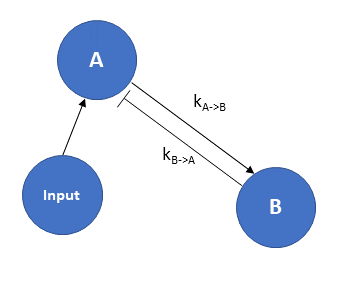


<b> Exercise 8: </b> write the ODEs that describe the coupled dynamics of the concentrations $A(t)$ and $B(t)$. Can you solve the two equations independently?

In [135]:
#%run solutionODEsExercise8.py

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Below, you can load the code that simulate the ODEs above, and change the "weight" parameters in the G.add_edges commands to modulate the rates at which A catalyzes the production of B, and B represses the production of A. Observe the different dynamical behavior, oscillations, amplified oscillations, changes in the frequency and amplitude of oscillations... 

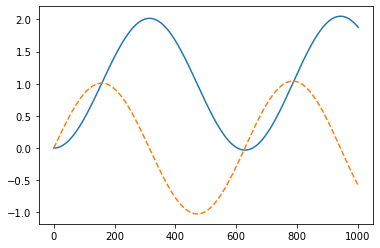

In [136]:
# %load solutionSimulateODEsExercise8.py


<b> Non-Linear systems : </b>
A system of ODEs is non-linear when … it is not linear. Which means, if there exist higher power of some of the biological quantities $Y_j$ in the right hand side of the ODEs for at least one $dY_i/dt$. Such a system cannot be written in the form $ \large \frac{dY}{dt} = \large A * Y + Y_0 $; then, the very powerful mathematical framework of linear algebra does not apply, and solutions are obtained on a case-by-case basis (see section 4) below).

But before embarking on a full resolution of ODE systems (Section 4) of this notebook), it might be worth to take a breath and ask ourselves: do we <b> really </b> need to solve it completely? Indeed, ODEs in biology and biomedicine are generally dynamical equations that explicit the time-dependence of biological variables. Many biological processes - in particular molecular processes - are fast, in the millisecond timescale or even faster. Thus, they would very rapidly reach some equilibrium, if their particular dynamics allow it. At equilibrium, even if individual molecular events keep going over time, the balance of these events make that on average, when looking at groups of molecules or an entire cell, they appear <b> static </b>, i.e. to <b> not depend on time anymore </b>. A classical example is the equilibrium of a protein complex and its constituents: if we wait long enough, individual complexes still form or dissociate at identical rates so that, even if there are microscopic binding/unbinding events, the concentration of complexes is roughly constant over time.  

By the time it reaches the equilibrium, the system is in a <b> transient state </b> which is described by the system of ODEs and its full, time-dependent solutions. But often, to address some questions or even fully understand a biological problem, it is sufficient to know the <b> steady state(s) </b>, i.e.  equilibrium state(s) in which the biological variables do not vary significantly over time.  It is noteworthy that there might be multiple steady states (for non linear systems), steady states that are never dynamically reached (like in oscillating systems, example above), … etc. 

Whether a steady state solution of an ODE model is relevant in an experimental situation depends on the time-scale defined by the slower rate in all ODEs, and how long the system is left to evolve before being measured/evaluated, relative to this slower time-scale. The response of a biomolecular system with milliseconds dynamics (slow rates of the order of $1000 s^{-1}$) to an experimental stimulus will be in the steady state less than a second after applying the stimulus. The proliferative response of a cell population to a drug will take several days/weeks to reach steady state, even if the drug is assimilated in minutes, because the slowest relevant rate here is the cell cycle that is 1 division per DAY. 

Below we will see how to search for the existence of, compute and analyze a steady state, and use the steady state concept to get more insight on the dynamical behavior of ODE systems. 


### 3) Analysis of the asymptotics: the steady state

<b> Define the steady state(s) and obtain the steady state equations </b>:

With the definition given above, a minimal requirement to be in a steady state is that the macroscopic biological variables are considered <b> constant over time </b>. Hence, <b> all their time derivatives are null </b>. This can be symbolically represented in mathematics with the following identity: 

$$ \Large \frac{d}{dt} = 0.$$

What does that mean in the real world? Let’s take the example of the ODEs describing the trimolecular complex formation $A + B <-> AB$ and $AB + A <-> A_2B$. The ODEs describing the reversible dynamics have been derived above in this notebook: 

$$ \frac{dAB}{dt} = k_{on1}*[A]*[B] - k_{off1}*[AB]- k_{on2}*[A]*[AB] + k_{off2}*[A_2B]$$
$$ \frac{dA_2B}{dt} = k_{on2}*[A]*[AB] - k_{off2}*[A_2B]$$
$$ \frac{dA}{dt} = - k_{on1}*[A]*[B] + k_{off1}*[AB]- k_{on2}*[A]*[AB] + k_{off2}*[A_2B]$$
$$ \frac{dB}{dt} = - k_{on1}*[A]*[B] + k_{off1}*[AB].$$

If we want to search for a steady state of this system of ODEs, we will set $\frac{d}{dt} = 0$ from which we get:

$$ 0 = k_{on1}*[A]*[B] - k_{off1}*[AB]- k_{on2}*[A]*[AB] + k_{off2}*[A_2B]$$
$$ 0 = k_{on2}*[A]*[AB] - k_{off2}*[A_2B]$$
$$ 0 = - k_{on1}*[A]*[B] + k_{off1}*[AB]- k_{on2}*[A]*[AB] + k_{off2}*[A_2B]$$
$$ 0 = - k_{on1}*[A]*[B] + k_{off1}*[AB].$$

Equations 2) and 4) above can be readily solved and we get: 

$$ \frac{[A]*[AB]}{ [A_2B]}= \frac{ k_{off2}}{ k_{on2}}$$
$$ \frac{[A]*[B]}{ [AB]}= \frac{ k_{off1}}{ k_{on1}},$$

which defines the <b> dissociation constants </b> of the complexes:

$$ Kd_2= \frac{ k_{off2}}{ k_{on2}} = \frac{[A]*[AB]}{ [A_2B]}$$
$$ Kd_1= \frac{ k_{off1}}{ k_{on1}} = \frac{[A]*[B]}{ [AB]}.$$

Note that if Equations 2) and 4) are satisfied, 1) and 3) are automatically satisfied. Thus, when we use Kd’s and this kind of formulas to compute concentrations in some biological context, we are implicitly assuming that the complex formation reactions are in the steady state. In the present situation, using the conservation equations for $A_0$ and $B_0$, the total concentrations of molecules A and B, we would the steady state concentrations of all 4 molecular species (A, B, AB and A2B), as a function of $A_0$ and $B_0$ and the Kd’s. There is just one solution. Exercise: compute it (correction upon request). 

Another (also non linear) example: the logistic ODE:

$$\frac{dP}{dt}=r*P(t)*(1-\frac{P(t)}{P_{max}})$$

What are the conditions to get a specie population $P)t$ that is stable in time? The mathematical translation of this question is: what is the steady state of this ODE? If $\frac{d}{dt} = 0$ then 

$$r*P(t)*(1-\frac{P(t)}{P_{max}}) = 0, $$

or in other words $r=0$ or $P=0$ or $P=P_{max}$. Here, 3 situations could lead to a stable situation in time: if $r=0$ the specie does not reproduce, hence because the model does not account for the death of individuals, the population will remain equal to its initial value $P_0$. This is a particular situation that is due to a particular value of a parameter, and not a state that is dynamically reached following a transient state. So strictly speaking it is not a steady state. 
However,  $P=0$ and $P=P_{max}$ <b> do </b> define two different steady states: indeed, if at some point in the dynamical evolution we reach $P=0$, then there is nothing left of the original population. So they can’t reproduce. So this state will remain stable over time. Likewise, if at some point $P=P_{max}$,  then the environment has no more resources to sustain the population growth and $P$ will remain equal to $P=P_{max}$ forever. A detailed mathematical analysis would show that the $P=0$ steady state is dynamically unstable, while the $P=P_{max}$ steady state is stable. But simple reasoning yields the same conclusion: if  $P=0$ but, suddenly, a new fertile couple immigrates from a neighboring environment (i.e., there is a small “fluctuation” around the $P=0$ steady state), then the 2 lucky ones will have all resources for them and proliferate. Even a small fluctuation around this steady state is sufficient to <b> escape from it </b>. Conversely, if  $P=P_{max}$ but, suddenly, a few individuals die accidentally, then their absence will provide a chance for environmental resources to re-accumulate, and the population will grow again until there is no resources left again and $P=P_{max}$. Here, a small fluctuation around this steady state will be <b> damped over time </b> and the system will get back to the steady state.

<b> Solve the steady state equations </b>:

Importantly: after applying the steady state condition(s) $\frac{d}{dt} = 0$, the system of ODEs become a system of algebraic equations. Such system of equations is generally much, much simpler to solve, as we’ve seen above in two simple non linear cases.
If the ODE system is linear in particular, we might even write down a general solution. The steady state takes the following form (in vector/matrix form): 

$$  \frac{dY}{dt} = 0 =  A * Y + Y_0 $$

so 

$$   A * Y  = - Y_0 $$

Because, before even attempting to solve our linear system, we have made sure that it was irreductible (i.e., all biological variables are linearly independent), the matrix $A$ is invertible and we have:

$$    Y  = - A^{-1}*Y_0 $$

In any case, the steady state is unique. If there is no constant “source” or “sink” terms in the ODE system (i.e., constants in the original equations which we have gathered in this “constant vector” $Y_0$), then $Y_0=0$ and the steady state is <b> identically null </b>:

$Y_{steady} = 0$. 

This an important result, from a more phenomenological perspective: an interacting (biological) system described by linear ODEs with no permanent “sources” or “sinks” is either reducible (i.e., some biological variables are linear combinations of others), or converges to 0 at large times. If the experimental data available on your system demonstrates the existence of another stable state at large times, different from “everything is 0”, then something is missing in the model (non linear interactions, or permanent “sources” or “sinks”).

For non linear systems, the steady state is generally not unique, think about how second degree equations $ax^2 +b^x +c=0$ have 2 solutions, like in the case of the logistic equation. This brings us to the next question: how do we know which steady state will be achieved by the system at large times? One strategy that helps to answer this question, at least reduce the number of possibilities, is to analyze the <b> stability </b> of all steady state




<b> Dynamics “around” the steady state(s) and steady state stability </b>:
When the biological variables have their steady state values, $\frac{d}{dt}$ is identically null. But what happens if the biological variables are “close” to their steady state values? This is an interesting question for two reasons. 1): if we can simplify the dynamics near the steady state, we will know how the system approaches the steady state. Still not a full resolution of the ODE, but that’s a beginning. 2): the analysis of small fluctuations around the steady state will tell us if it is stable or unstable. Is a small fluctuation amplified with time (ss unstable)? Damped (ss stable)? Stable steady states are more likely to be encountered in biomedicine, because biological noise generates permanent fluctuations that are often sufficient to pull systems out of unstable steady states. 

How do we proceed? ¨
1) first we rewrite each biological variable $Y_i(t)$ as:

$$Y_i(t) = Y_{i,steady} + \delta Y_i(t).$$

Because we are interested in variations of the biological variables “close” to their steady state values, we next assume that the $\delta Y_i(t)$ are small. The $Y_{i,steady}$ are “numbers”, the steady state values of the $Y_i$. Not functions of time.7

2) next we inject all these expressions for the biological variables $ Y_i(t)$ in all the ODEs that make the system. On the left hand sides, $\frac{dY_i}{dt}=\frac{d Y_{i,steady} }{dt}+\frac{d \delta Y_i}{dt}=\frac{d \delta Y_i}{dt}$ because $Y_{i,steady}$ are not functions of time, just values. On the right hand sides, we have sums, products, functions… of time and of the  $Y_i(t) = (Y_{i,steady} + \delta Y_i(t))$. Because we have replaced each $Y_i(t)$ by a sum of 2 terms, it can look awfully complicated. But we have a secret weapon.

3) DISCLAIMER magic weapon coming: we <b> linearize </b>. To do this, we take fully into consideration the fact that the variations around the steady state that we consider, the $\delta Y_i(t)$, are <b> small quantities </b>. Hence $\delta Y_i(t)^2 << \delta Y_i(t)$, $\delta Y_i(t)^3 << \delta Y_i(t)$ (try to compare 0.01^2 and 0.01^3 to 0.01 if you are not convinced), $\delta Y_i(t)* \delta Y_j(t) << \delta Y_i(t), \delta Y_y(t) $, $\delta Y_i(t)* \delta Y_j(t)^2 << \delta Y_i(t), \delta Y_j(t)$, … and so on and so forth. And we will simplify a lot the equation obtained in step 2) just by <b> neglecting/ignoring/eliminating… </b> all the terms the are or order >= 2 in the functions $\delta Y_i(t)$. In other words, we get rid of everything except the terms proportional to $\delta Y_i(t)$ and other constants (including the rates of original ODEs, the steady state values of the different variables…). 

Doing this way, w will obtain a new set of ODEs for the functions $\delta Y_i(t)$, which will be <b> linear </b> regardless of the original system. More specifically, the system will be of the form

$$ \frac{d \delta Y}{dt} = B * \delta Y $$

where the vector $\delta Y$ lists all the small perturbations $\delta Y_1(t)$, $\delta Y_2(t)$, $\delta Y_3(t)$, … etc. This linear system of ODEs describes the full dynamics of the initial system around its steady state. 
If all the eigenvalues of the new matrix $B$ are negative, the steady state is stable; if some are positive, the steady state is unstable (remember simple 1-variable ODEs $dY/dt=k*Y$: k negative, damped Y(t); k positive, exponential increase). And because each steady state corresponds to different values of the $Y_i$, the linearization procedure yield different matrices $B$ for different steady states.

That might look a bit technical at this stage: let’s do examples. Let’s start with the logistic ODE we’ve already discussed above:

$$\frac{dP}{dt}=r*P(t)*(1-\frac{P(t)}{P_{max}})$$

Just one variable $P(t)$, 2 steady states to analyse $P_{ss1}=0$ (ss1) and $ P_{ss2}= P_{max}$ (ss2). 
Analysis of fluctuations around ss1: we write $P(t)=P_{ss1}+ \delta P(t) = 0+ \delta P(t) =\delta P(t) $ so the ODE becomes:

$$\frac{d \delta P}{dt}=r*\delta P(t) *(1-\frac{\delta P(t) }{P_{max}}) = r* \delta P(t)  - r*\frac{\delta P(t)^2 }{P_{max}}$$

The first term is proportional to $\delta P(t)$, the second to $\delta P(t) ^2$ and hence can be neglected. The ODLE becomes:

 $$\frac{d \delta P}{dt}=r*\delta P(t) $$

and is indeed of the form $ \large \frac{d \delta Y}{dt} = 0 = \large B * \delta Y $ but since we have only 1 variable $P(t)$, the “matrix” $B$ is just one number, $r$. And because this number is positive, the steady state is unstable. 

Analysis of fluctuations around ss2: we write $P(t)=P_{ss2}+ \delta P(t) = P_{max}+ \delta P(t)  $ so the ODE becomes:

$$\frac{d \delta P}{dt}=r*( P_{max}+ \delta P(t))*(1-\frac{( P_{max}+ \delta P(t)) }{P_{max}}) = - r*( P_{max}+ \delta P(t))*\frac{\delta P(t) }{P_{max}}  $$ 
and if we keep only the linear term(s), we obtain: 

$$\frac{d \delta P}{dt}=-r* \delta P(t) .$$

Again, the equation obtained is of the form $ \frac{d \delta Y}{dt} =  B * \delta Y $ but since we have only 1 variable $P(t)$, the “matrix” $B$ is just one number, $ - r$. And because this number is <b> negative </b>, the steady state is stable.

This works exactly the same way for systems of equations, except that the $\pm r$ coefficient would become a matrix, with as many rows and columns than equations in the ODE system, and for which there would be the additional step to compute all eigenvalues. But computers are capable of computing eigenvalues pretty fast!



<b> Quasi steady state approximations (QSSAs) and further simplification of ODEs/systems </b>:

As briefly discussed in the introduction, the notion of steady state depends on the ratio between the time-scale of observation of the system, and the rates in the ODE system.  In some situations, some rates are much faster than others, and a subpart of the system (some of the biological variables) might reach the steady state on a short time-scale during which the slowly evolving biological variables barely change. Hence, the latter can be considered as “constants” with respect to time in solving the steady state for the former. This is called a <b> time-scale separation </b>. There is no general theory for this, since it depends on the particular rates of a particular model. Thus, it has to be done on a case-by-case basis. 
Let’s illustrate this concept on a couple of examples. Let’s start with a classic one: the Michaelis-Menten enzyme kinetics: An enzyme E of concentration [E] binds a substrate S, concentration [S], with rate $k_1$ forming an enzyme-substrate complex SE, concentration [SE]. The reciprocal reaction of SE complex dissociation without conversion of the substrate to the product happens with rate $k_2$. Within the complex, the enzyme converts the substrate to product with rate $k_3$. This latter reaction dissociate the complex, releasing enzyme and product P (concentration [P]). The ODEs describing the dynamics of the system are thus:

$$ \frac{dS}{dt} = -k_1*[S]*[E]+k_2*[SE] $$
$$ \frac{dE}{dt} = -k_1*[S]*[E]+k_2*[SE] + k_3*[SE]$$ 
$$ \frac{dSE}{dt} = k_1*[S]*[E] - k_2*[SE] - k_3*[SE]$$ 
$$ \frac{dP}{dt} = k_3*[SE] $$ 
 
The 4th equation can be separated from the others, as the product concentration does not appear in the equations 1-3. But still, we have to solve 3 coupled non linear ODEs (eqs. 1-3). This system has no general solution. 
<b> However </b>, the kinetics of the formation of the enzyme-substrate complex are generally much faster than the kinetics of enzyme-catalyzed conversion of substrate to product: $k_1,k_2>>k_3$.
Hence, <b> from the point of view of the species responding only to the fast kinetics </b>  $k_1,k_2$, the steady state is reached on time-scales at which the $k_3$-dependent species vary significantly. This is the case of the substrate concentration [S(t)]: because [S(t)] is governed by fast kinetics only, whenever [E(t)], [SE(t)] change under the influence to the slow kinetics $k_3$, [S(t)] immediately adjust thanks to fast $k_1$ and $k_2$ and stays constant until the slow kinetics make [E(t)] and [SE(t)] change again. Hence: 

$$ \frac{dS}{dt} = -k_1*[S]*[E]+k_2*[SE] \approx 0 $$

at any time. This approximation is a form of  <b> quasi steady state approximation </b> (QSSA) , and it is based on a clear <b> separation between slow and fast timescales </b>. Under this condition $ \frac{dS}{dt} = -k_1*[S]*[E]+k_2*[SE] \approx 0 $. The conservation of the total pool of enzymes imposes in addition $[E]+[SE]=E_0$, the total pool of enzyme, from which we get $[E]=E_0-[SE], which we inject in the equation above:

$$ -k_1*[S]* (E_0-[SE])+k_2*[SE] = 0$$ 

from which we get:

$$ -k_1*[S]* E_0+k_1*[S]*[SE]+k_2*[SE] = 0$$ 
$$[SE]=\frac{ k_1*[S]* E_0}{ k_1*[S]* E_0+k_2}$$ and thus we can compute the rate of product synthesis, 

$$ \frac{dP}{dt} = \frac{k_3* k_1*[S]* E_0}{ k_1*[S]* E_0+k_2}$$

which is the Michaelis-Menten law for enzyme kinetics. To which extent is this true? When assuming that $d[S]/dt=0$, we neglect the slow variations of [S], which are due to the slow kinetics, i.e. of the “order” of $k_3$. It is like rounding $0.106$ to $0.1$: when you use an approximation to get rid of one or several terms in an ODE, whatever result you get from it is a rounding of the true result. 
In other words, 

$$ -k_1*[S]* [E]+k_2*[SE] = 0$$ 

is “almost” true, up to some “error” of order $k_3$, just as $0.106=0.1$ is true up to some error $0.006$. And then, this error holds on until the end of our derivation, just like a rounding of, for instance, $\pi$ to $3,14$, yields to an error of the same order of magnitude when computing the perimeter $2*\pi*R$ of a circle. So the exact solution for $\frac{dP}{dt}$, which is already proportional to $k_3$, must have an additional term that is $k_3$-times smaller, so proportional to $k_3^2$. But since it’s way smaller, we don’t care about it.  
<b> So, to summarize: </b> enzyme kinetics are modeled with 4 ODEs, 

$$ \frac{dS}{dt} = -k_1*[S]*[E]+k_2*[SE] $$
$$ \frac{dE}{dt} = -k_1*[S]*[E]+k_2*[SE] + k_3*[SE]$$ 
$$ \frac{dSE}{dt} = k_1*[S]*[E] - k_2*[SE] - k_3*[SE]$$ 
$$ \frac{dP}{dt} = k_3*[SE], $$ 

the first three of which are independent and must be solved for [SE(t)] to inject the solution in the fourth one and get the rate of product synthesis $\frac{dP}{dt}$. The three coupled equations have <b> NO </b> general solution. But using the fact that $k_3$ is much smaller than $k_{1,2}$ (slower kinetics for substrate processing by substrate-bound enzyme than kinetics of enzyme-substrate binding), we assumed that enzyme-substrate binding equilibrium $ \frac{dS}{dt} = -k_1*[S]*[E]+k_2*[SE] = 0$ is realized at all times, instantaneously. Coupled with the conservation of the total pool of <b> enzyme </b>, this helped us to re-write the initial problem in a solvable way. To entirely solve the problem, the last step is to use the conservation of substrate $[S]+[SE]+[P]=S_0$, expression in which the concentration $[SE]=\frac{ k_1*[S]* E_0}{ k_1*[S]* E_0+k_2}$ is injected, to obtain a relationship between [S] and [P]. Finally, [SE] can also be obtained as a function of [P] as only variable, and the model parameters $k_{1,2,3}$ and $E_0$, $S_0$, making the last equation a 1-variable ODE for P(t) which we can solve. So, the QSSA allows us to solve the problem without the help of a computer program.

However, there is a conceptual limitation to this approximation, which stems from the fact that $ -k_1*[S]* [E]+k_2*[SE] = 0$ is true only up to some “error” of order $k_3$. Let’s inject  $ -k_1*[S]* [E]+k_2*[SE] = 0$ in the entire system and see what the ODEs become: 

$$ \frac{dS}{dt} = 0 $$
$$ \frac{dE}{dt} = k_3*[SE]$$ 
$$ \frac{dSE}{dt} = -k_3*[SE]$$ 
$$ \frac{dP}{dt} = k_3*[SE], $$ 

Taken as it is, this system would be solved like this (think about how you would do it): first, solve eq. 3 that now is a single variable ODE for [SE(t)]. That will produce an exponential decay for [SE(t)]. Inject this solution in both equations 2) and 4) and directly integrate with respect to time (if [SE(t)] is known as a function of time, these ODEs have “naturally separated” variables).  That sounds straightforward. So why will this lead to a silly result? 
If you put in your test tube, in the initial state, some substrate and some enzyme (as every biochemist would do), the initial concentration of SE complex is … 0. And because of the exponential decay, it will remain …. 0. So why the QSSA, that was historically used by Michaelis and Menten to solve the problem (and which, indeed, works very well to model experimental kinetics!), leads to such a silly result? 
Because $ -k_1*[S]* [E]+k_2*[SE] $ is  not <b> exactly </b> 0, it is small, of order $k_3$. And if you look at all the remaining terms in the simplified ODEs, they are all of order $k_3$. It is not reasonable to provide a different treatment (i.e., neglecting or not neglecting) to terms that have the same order of magnitude. <b> It is reasonable to assume that 0.106=0.1 if there is “nothing around”, but not if we want to simplify, for instance, the expression (0.106-0.1)+0.007. </b> The true result is 0.013. If you use the rounding in the bracket, you obtain 0.07. It’s a 2-fold error … 

Hence, the take home message is: <b> if there is time scale separation, systems of ODEs will simplify a lot by using the QSSA for the parts of the system that are under fast dynamics. </b>. But it comes with a warning: <b> pay attention to the order of magnitude of the different terms when using the approximation. </b>

The underlying problem with the original QSSA is that the overall “purpose” of an enzyme is to convert a free substrate S in a product P. if the QSSA we use is based on $dS/dt=0$, which mathematically expresses the conservation of the free substrate, we can easily understand that we’re not on good tracks to describe substrate conversion into product. In this particular example, there is another way to implement the time scale separation: to assume that the concentration of the <b> enzyme-substrate complex SE is constant </b>, and not the free substrate.  In other words, because SE complexes that dissociate upon completion of the rate-limiting step (the conversion of SE complex into product O, releasing the enzyme, rate $k_3$) slightly displace the S+E<->SE fast equilibrium, the latter rapidly adjusts and new SE complexes are freshly made, consuming free substrates, to re-establish the equilibrium SE concentration. 

Biologically, it is not very different that the Michaelis Menten QSSA. Technically, it sounds even better because this QSSA leaves room for the free substrate concentration to decrease over time. And mathematically, it is equivalent to assuming that 

$$ \frac{dSE}{dt} = k_1*[S]*[E] - (k_2+ k_3)*[SE]  = 0, $$

which is almost equivalent to assume that  $ k_1*[S]*[E] - (k_2)*[SE]  = 0 $ (historical QSSA), the only different being the term $ k_3)*[SE] $, which is… or order $k_3$. So mathematically, this approximation has the same level of “error” than the historical one, it is just a different QSSA that seems better to model the decrease of the concentration of free substrate over time. 

<b>Exercise 9: </b> Use this QSSA to solve the system of ODEs, following the same kind of calculations. In the equation for the conservation of substrate $[S(t)]+[SE(t)]+[P(t)]=S_0$, you can neglect the term $[SE(t)]$ to ease the calculation. This approximation is valid when the enzyme is in default compared to substrate (See correction below). If are not sure how you should proceed for the entire derivation, you can use the “hint” below. 


In [128]:
#%run hintExercise9.py

In [133]:
#%run solutionODEsExercise9.py


So we are now capable of solving complex ODE systems using a quasi steady state approximation and some calculus tricks. This category of QSSAa, where reaction <b> intermediates </b> between a pathway input and output, formed/degraded/dissociated via <b> fast kinetics </b> compared to the overall kinetics of the pathway are considered as having an <b> approximately constant concentration </b> ($d[intermediates]/dt \approx 0$) is very popular and efficient in modeling biochemical networks.

In practice, we have the choice of how we perform the QSSA. As illustrated on the historical example from Michaelis’ and Menten’s work, not all choices can lead to satisfactory solutions for <b> all </b> aspects of the model dynamics. But still, the original Michaelis-Menten law performs very well in describing the velocity of the enzymatic reaction, and is often used as a “module” when constructing ODE systems of more complex pathways (i.e.: reaction intermediates not accounted for, only the product vs substrate law with parameters is written). So, do not hesitate to try slightly different versions of the QSSA, adapted to each particular problem. The important points is that there must be a clear time scales separation, and all QSSA shall correspond to neglecting different terms of the same order of magnitude.  
If we can’t - or don’t want - to completely solve the system for its entire time-dependent dynamics, there are still techniques that can be used to get insight on the transcient regimes that may - or may not - lead to the/a steady state. 


### 4) Analysis of the full dynamics: is the steady state ever realized?  
In the previous section, we have discussed the steady state of systems of ODEs. Sometimes/often, it will be sufficient to address the biological question underlying your model development. Sometimes, not. For instance, assume you want to model some enzymatic reaction as part of a bigger model in vivo, but you need to know the kinetic parameters of the Michaelis-Menten-like dP/dt=f(S) relationship you will use. Not ideal to measure such parameters in vivo… But you got this great idea (at first sight): let’s monitor the dynamics of P in an in vitro test tube experiments where we put definite amounts of substrate and enzyme, and fit the dynamics with our model to obtain its kinetic parameters? Then, you’ll need the full time-dependent solution of your ODE framework. 

Then, you are entering a wild territory. All weapons are allowed: resolution of “independent” subsystems, QSSAs to simplify the original one and obtain such independent subsystems, redefining more convenient variables, separation of time and other variables for direct integration… What we have seen above.   

For linear systems, there is even a general way to proceed: indeed, the ODEs can be written in matrix form 

$$  \frac{dY}{dt} =  A * Y + Y_0 $$

and because, before even attempting to solve our linear system, we have made sure that it was irreductible (i.e., all biological variables are linearly independent), the matrix $A$ is invertible with the inverse matrix $A^{-1}$ satisfying $A*A^{-1}= A^{-1}* A = I$ where the multiplication is in the “matrix sense” and $I$ denotes the identity matrix (0’s everywhere except 1’s on the diagonal).
Let us first get rid of the vector $Y_0$ that contains all the “constants” from the original ODEs, by defining a new unknown vector

$$X=Y+ A^{-1}*Y_0.$$

Therefore, $Y=X- A^{-1}*Y_0$ and injecting in the matrix-form ODE we get: 

$$  \frac{d(X- A^{-1}*Y_0)}{dt} = \frac{dX}{dt}- \frac{d( A^{-1}*Y_0)}{dt}= \frac{d(X- A^{-1}*Y_0)}{dt}-0$$

because, regardless of how complicated it looks like (imagine, the product of the inverse of a matrix by a vector!), $A^{-1}*Y_0$ is just a constant in time. Its derivative is 0. Period. The right hand side simplifies, also ($X$ has been constructed in this purpose): 

$$A * (X- A^{-1}*Y_0) + Y_0  = A * X- A* A^{-1}*Y_0 + Y_0 = A * X -Y_0 +Y_0 = A*X. $$

So 

$$  \frac{dX}{dt} =  A * X$$

is the equivalent ODE for the vector $X(t)$. We can remark that $X$ is constructed as the difference between $Y(t)$ and its steady state value… Similar to what was done to study the dynamics of the fluctuations around the steady state in the previous section. 

So because every system of linear ODEs can be, using this trick, converted to an equivalent system without the “constants” $Y_0$, let’s only study systems of the type:

$$  \frac{dX}{dt} =  A * X$$

We’ll still be able to get $Y$ from $X$ via $Y=X- A^{-1}*Y_0$ once the matrix form ODE for $X$ has been solved. The point here is not to redo all the maths that yielded to the solution, but rather to remark how this first order ODE looks like… if $X$ was not a vector, just one function of time $x(t), and $A$ not a matrix, just a number $a$, the solution would be

$$ x(t)=e^{a*t}*x(t=0)$$

where $x(t=0)$ is the initial value of the function (could be any number). Well, we’re in a lucky day: the solution of the ODE <b> system </b> $ \frac{dX}{dt} =  A * X$ is …. (drumroll) …


In [137]:
#%run drumroll.py

Indeed. But this requires a bit of explanation on what the mathematical symbols mean in this equation. $X(t)$ is a vector containing the values of the biological variables, well at least the values “shifted” from the steady state values (remember $X=Y+A^{-1}*Y_0$). $X(t=0)$ is the vector listing the values of these rescaled variables at the initial time ($X(t=0)=Y(t=0)+A^{-1}*Y_0$). $ e^{A*t}$ is the exponential of the matrix $A*t$. We know how to multiply a matrix by a number (here, the time $t$). We just multiply all elements of the matrix by the number. But what is the exponential of a matrix? We know how to multiply 2 matrices. We know how to multiply twice the same (square) matrix (like, e.g., the matrix defining a system of linear ODEs). We can multiply it three times with itself also, or even 4 times… Meaning we know how to <b> elevate a matrix at a power k </b>: we just multiply k times the same matrix. 

The matrix exponential is defined as an infinite sum of powers of the same matrix. If $M$ is a matrix, 

$$ e^M = \sum \limits_{k=0}^{\infty} \frac{M^k}{k!}$$

where $k!$ is the factorial symbol $k!=1*2*3*4…*(k-1)*k$, and therefore, in our situation, we can use this definition for the matrix $M=A*t$:

$$ e^{A*t} = \sum \limits_{k=0}^{\infty} \frac{(A*t)^k}{k!} = \sum \limits_{k=0}^{\infty} t^k*\frac{(A)^k}{k!} .$$

Of course, that still seems complicated. But 1) we now have a solution for the ODE system, even if written in a formal way, and 2) computers are very efficient in calculating this kind of sums. In this case, it is usually sufficient to sum a rather small number of terms (truncated sum) to get an approximate value of the matrix exponential $ e^{A*t}$. 

The general solution of the linear ODE system in matrix form $ dY/dt = A* Y + Y_0 $ is then: 

$$ Y(t)= e^{A*t} * (Y(t=0)+ A^{-1}*Y_0) - A^{-1}*Y_0$$

In addition, there is a tremendous amount of work that has been done to compute the exponential of matrices analytically. Below, we will be giving some formulas, that will cover a broad range of matrices you can find in mathematical modeling of biological systems. Use it as a tool: don’t learn those formulas. But if the matrix you obtained when building your model is not in the list, don’t hesitate to search mathematical publications. 


1) diagonal matrices: 
$$A=  \begin{bmatrix} a_{11} & 0 & 0 & … & 0  \\ 0 & a_{22} & 0 & … & 0  \\ 0 & 0 & a_{33} & … & 0 \\ … & …& …& …&…   \\ 0 & 0 & 0 & … & a_{nn}   \end{bmatrix} $$

$$e^{A*t}=  \begin{bmatrix} e^{a_{11}*t} & 0 & 0 & … & 0  \\ 0 & e^{a_{22}*t} & 0 & … & 0  \\ 0 & 0 & e^{a_{33}*t} & … & 0 \\ … & …& …& …&…   \\ 0 & 0 & 0 & … & e^{a_{nn}*t}   \end{bmatrix} $$

(this is also true for any function of a diagonal matrix, not only exponential). It is important to remember here this important lesson from basic linear algebra courses: any invertible matrix $A$ <b> can be diagonalized </b>. So there exist a matrix $P$ which transforms $A$ into another matrix $D$ which is diagonal, via the transformation $P^{-1}*A*P=D$. And taking the exponential of this, we get $e^{P^{-1}*(A*t)*P}=e^D$ which then yields $P^{-1}*e^{A*t}*P=e^D$ from which we get $e^{A*t}=P*e^D* P^{-1}$. This the exponential of the diagonal matrix $D$ is super easy to compute, then eventually with a bit of algebraic calculation <b> it is possible to compute analytically the exponential of any matrix we want </b>. That can be a long task, and require care and effort, but it <b> will work </b>. 

2) block diagonal matrices: sometimes a matrix is not entirely diagonal but can be written as 

$$A=  \begin{bmatrix} P & 0 & 0  \\ 0 & Q & 0   \\ 0 & 0 & R   \end{bmatrix},$$

where $P$, $Q$ and $R$ are ordinary matrices, not necessarily diagonal or anything else. 

Then, 

$$e^{A*t}=  \begin{bmatrix} e^{P*t} & 0 & 0  \\ 0 & e^{Q*t} & 0   \\ 0 & 0 & e^{R*t}   \end{bmatrix},$$

meaning that when computing the exponential, we can treat $P$, $Q$ and $R$ separately and they wont “mix-up” in the exponential of $A*t$. However, this situation means that the subsystems of ODEs defined by the matrices $P$, $Q$ and $R$ could have been separated from the beginning and solved separately, since they are independent. But if we missed this step, it’s still time to catch up. 


3) Nilpotent matrices. Some (in fact, many) matrices become null when elevated to a certain power. Then of course all larger powers of the matrix are also 0. Then, for those matrices the simplest way to compute their exponential is to use the definition $ e^{A*t} = \sum \limits_{k=0}^{\infty} \frac{(A*t)^k}{k!} = \sum \limits_{k=0}^{\infty} t^k*\frac{(A)^k}{k!}$, because only some first terms will be non zero and the sum will be finite. Example:


$$A=  \begin{bmatrix} 5 & -3 & 2  \\ 15 & -9 & 6   \\ 10 & -6 & 4   \end{bmatrix},$$

we can show that $A^2=0$ and thus

$$ e^{A*t} = 1 + t*\frac{(A)^1}{1!}+ t^2*\frac{(A)^2}{2!} + t^3*\frac{(A)^3}{3!} = 1+t*A+0+0+… = 1+t*A$


4) Some particular 3*3 matrices have simple exponentials

$$A=  \begin{bmatrix} a & 1 & 0  \\ 0 & a & 1   \\ 0 & 0 & a   \end{bmatrix},$$

where $a$ is a parameter, then

$$ e{A*t}=  \begin{bmatrix} e^{a*t} & t* e^{a*t} & \frac{t^2}{2!}* e^{a*t}  \\ 0 & e^{a*t} & t* e^{a*t}   \\ 0 & 0 & e^{a*t}   \end{bmatrix},$$


5) Particular 2*2 matrices have simple exponentials: 

$$A=  \begin{bmatrix} 0 & 1   \\ -1 & 0   \end{bmatrix},$$

$$e^{A*t}=  \begin{bmatrix} \cos(t) & \sin(t)   \\ -\sin(t) & \cos(t)   \end{bmatrix},$$

and for any parameter $k$:


$$A=  \begin{bmatrix} 0 & k   \\ -k & 0   \end{bmatrix},$$

$$e^{A*t}=  \begin{bmatrix} \cos(k*t) & \sin(k*t)   \\ -\sin(k*t) & \cos(k*t)   \end{bmatrix},$$

(think, in particular for $k=-1$, or $-k$ instead of $k$...).



$$A=  \begin{bmatrix} a & 1   \\ 0 & a   \end{bmatrix},$$

where $a$ is any parameter

$$e^{A*t}=  \begin{bmatrix} e^{a*t} & t* e^{a*t}   \\ 0 & e^{a*t}   \end{bmatrix},$$
6) bidiagonal matrices. Bidiagonal matrices are matrices with elements only on the diagonal, and on the “upper” diagonal (or lower, but this can be obtained from the “upper” formulas using transposition). Particular bidiagonal matrices, with the same value on the diagonal and 1’s on the upper diagonal generalize the formulas given in 4) 5) above for 3*3 and 2*2 matrices to square matrices of any size:

$$A=  \begin{bmatrix} a & 1 & 0 & … & 0 &  0  \\ 0 & a & 1 & … & 0 &  0  \\ 0 & 0 & a & … & 0 &  0 \\ … & … & … & … & … &  0 \\ 0 & 0 & 0 & … & a & 1 \\ 0 & 0 & 0 & … & 0 &  a   \end{bmatrix},$$

$$e^{A*t}=  \begin{bmatrix}  e^{a*t} & \frac{t^1}{1!}* e^{a*t} & \frac{t^2}{2!}* e^{a*t} & … & \frac{t^{n-2}}{(n-2)!}* e^{a*t} &  \frac{t^{n-1}}{(n-1)!}* e^{a*t}  \\ 0 & e^{a*t} & \frac{t^1}{1!}* e^{a*t} & … & \frac{t^{n-3}}{(n-3)!}* e^{a*t} &  \frac{t^{n-2}}{(n-2)!}* e^{a*t}  \\ 0 & 0 &  e^{a*t} & … & \frac{t^{n-4}}{(n-4)!}* e^{a*t} & \frac{t^{n-3}}{(n-3)!}* e^{a*t}  \\ … & … & … & … & … &  … \\ 0 & 0 & 0 & … & e^{a*t} & \frac{t^1}{2!}* e^{a*t} \\ 0 & 0 & 0 & … & 0 &  e^{a*t}  \end{bmatrix},$$

But enough of theoretical material on linear ODE systems at the moment, it’s time for some exercises. Let us remember the elementary topological network elements we discussed in the notebook Section 1: building the model structure.  Specifically, let’s consider the example of simple negative feedback, where a constant input increases the concentration $A(t)$ of a biological quantity A, with a constant rate $1$. Then, A catalyzes the production of another biological quantity B, of concentration $B(t)$, $k_{A->B}$. In return, accumulating B catalyzes the degradation of A at a rate $k_{B->A}$. In the exercise 8, we have written the ODEs that describe the dynamics of this small network:

$$ \frac{dA}{dt} = 1 - k_{B->A}*B(t)$$
$$ \frac{dB}{dt}= k_{A->B}*A(t)$$

<b> Exercise 10: </b> Is it a linear system of ODEs? If yes, how can it be written in matrix form? Assume  $k_{B->A}= k_{A->B} = k$. How can the matrix be simplified?  Does it resemble one of the particular matrices for which the exponential is known? Give the general solution of the system of ODEs (with general initial values for the concentrations A, B). Why is it different if $k_{B->A} \neq k_{A->B} $ ? How would we compute the exponential of the system’s matrix?


In [187]:
%run solutionODEsExercise10.py

Yes it is a linear system. In matrix form it can be written:


<IPython.core.display.Latex object>

Where Y is the vector formed by the two unknown, time-dependent concentrations A(t) and B(t):


<IPython.core.display.Latex object>

Where Y_0 is the vector formed by the constants in the right hand side:


<IPython.core.display.Latex object>

and the matrix A contains, on the first line, the coefficients of A(t) and B(t) in the right hand side of the first equation (in this order), and on the second line, the coefficients of A(t) and B(t) in the right hand side of the second equation:


<IPython.core.display.Latex object>

if the two rates are equal to k, the matrix simplifies to:


<IPython.core.display.Latex object>

we can recognize the form of the matrix whose exponential has sin(t) and cos(t) terms (see formulas above), up to a multiplicative constant -k:


<IPython.core.display.Latex object>

So we know, because it is a linear system, that we can formally write the solution Y(t) as:


<IPython.core.display.Latex object>

but thanks to the particular form of the matrix A, we know how to compute the exponential


<IPython.core.display.Latex object>

and we can also remark that (or compute)


<IPython.core.display.Latex object>

So that we can compute all terms in the solution. For instance,


<IPython.core.display.Latex object>

The rest of the calculations will depend on the particular initial conditions, the vector Y(t=0). Let's assume that there is no A and no B at t=0, as in the simulations exercise 8, thus Y(t=0)=0. We can finish the matrix operations and we get the general solution (the 2 components of Y(t), in this order):


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We obtain oscillatory functions of time. If kA->B was different from kB->A, the matrix A wouldn't have one of the particular forms with which the calculation of the exponential is straightforward. So we would have needed to diagonalize the matrix using a transformation P such that D=P^-1*A*P is diagonal, compute the exponential of the diagonal matrix, and invert the transformation to get exp(A). This procedure would have mixed the oscillatory functions, generating damped or amplified oscillations depending on the choice of parameters. A good exercise to do!


For non linear systems, there is no such general method. But we can proceed graphically to get a rather deep understanding of the full dynamics, though we remain at the qualitative level: this is called the <b> phase portrait analysis </b>. And this is how it works.


<b> Phase portrait analysis </b>:

Let us consider a general non linear system of ODEs, of the form:

$$ \frac{dA}{dt} = f(A,B,parameters) $$
$$ \frac{dB}{dt} = g(A,B,parameters) $$

where $A$ and $B$ are the two biological quantities we are studying, and $f$ and $g$ are two functions of those biological quantities. It can be anything. For instance: 

$$ \frac{dA}{dt} = k*A^2*B-2*A^3 + \sin(\omega *B) $$
$$ \frac{dB}{dt} = \frac{A}{A+2*B}$$

Even if the functions $f$ and $g$ are not too complicated, it could be enough to prevent a full resolution of the system. To get insight on the dynamical behavior of the system and identify steady state, or limit cycles (i.e., oscillatory states that are faithfully reproduced over time and, thus, constitute some kind of stable end point even if not constant with respect to time), we use a graphical trick. Let us assume that we have chosen a set of the model parameters, which we don't chenge in the following unless otherwise specified. 

We consider the 2 dimensional plane,  which we will rename the <b> phase plane </b> for the occasion. We represent the biological variable $A$ on one axis and $B$ on the other. In other words, any point of the plane of coordinates $(A_0,B_0)$ represents a state of the system where the biological variable $A$ is equal to $A_0$, and the variable $B$ is equal to $B_0$ (regardless of how this state was reached). At this point, we can compute the right hand side of both ODEs:

$$ f(A_0,B_0,parameters) $$
$$ g(A_0,B_0,parameters) $$

Thus, according to the dynamical equations, the rates of change of $A$ and $B$ at this point (A_0,B_0) are:

$$ \frac{dA}{dt}(A_0,B_0) = f(A_0,B_0,parameters) $$
$$ \frac{dB}{dt}(A_0,B_0) = g(A_0,B_0,parameters), $$


which means that a few instants later ($dt$) the state of the system will be 


$$(A_0+dt*f(A_0,B_0,parameters), B_0+dt*g(A_0,B_0,parameters))$$


So far we did nothing more than re-expressing ODEs in terms of balance equations, i.e. the inverse of what we did at the very beginning of this notebook. 

The displacement vector between the original point $(A_0,B_0)$ and the final point $(A_0+dt*f(A_0,B_0,parameters), B_0+dt*g(A_0,B_0,parameters))$ defines the trend of evolution of the system in the near future, towards which state it will evolve from $(A_0,B_0)$. The coordinates of this displacement vector along the $A$ and $B$ axes respectively in the phase plane are nothing else than the rates of change $ f(A_0,B_0,parameters) $, $ g(A_0,B_0,parameters) $. 

If now we represent such displacement vectors on a grid of points $(A_0,B_0)$, the finest grid we can reasonably do while still yielding a "clear" figure, we will end up drawing tens/hundreds of arrows (displacement vectors) starting at all grid points and whose arrow indicates the direction in which the system shall evolve from this grid point. This is called the <b> phase portrait </b> of the dynamical system. Within the phase portrait, <b> following the arrows with the finger is a way to follow the dynamical evolution of the system </b> from any initial state, hence this can qualitatively make up for the absence of solution $A(t)$, $B(t)$ of the dynamical system ODEs.  

The best is to see how it looks like on a classic example: the <b> Lotka-Volterra predator prey model </b>. This model describes the dynamics of a natural system of interacting preys (represented by the population $A(t)$) and predators (represented by the population $B(t)$. The prey are assumed to have an unlimited food supply so that they reproduce at a constant rate $r$. They are subject to predation, hence their population diminishes at a rate proportional to the predator population (and, obviously, prey population). Predators reproduce at a rate proportional to their  food supply: the preys, and they die or emigrate at a constant rate $d$. Hence the ODEs representing the dynamics of the system are: 

$$ \frac{dA}{dt} = r*A(t)-a*A(t)*B(t) $$
$$ \frac{dB}{dt} = -d*B(t)+b*A(t)*B(t) $$

Below, a python script (adapted from https://johncox.dev/project/predator-prey/) plots the phase portrait of the Lotka-Volterra model. We encourage you to change the parameters and observe how the different vectors, that represent the time evolution of the system when starting from any population of preys and predators (one point (A,B)) 


In [ ]:
# %load LotkaVolterraPhasePortrait.py


With the default parameters, how will the system evolve if we start from an initial population of both preys and predators of 2 (arbitrary units)? Starting from the point (2,2) and following the arrows we see that the population of preys will increase first, with little increase in population of predators. Then the latter increases. until eventually there’s quite a lot of predators there and the population of preys stop increasing, and even decreases. When the population of preys get too low, the population of predators eventually drops. Then, another cycle begins… Until the system converges to the point (2,3.5), where the arrows are so small that populations do not change. Indeed, a small arrow means that $dA/dt$ and $dB/dt$ are both very small: we have reached a steady state.  And looking around this steady state, all the arrows seem to converge to it: it is dynamically stable, any small fluctuation from the steady state will generate a dynamical evolution that will bring the system back into this state. We note that even if the system does not converge towards a steady state, but describes circles/ellipses or any closed trajectory in the phase plane, we can consider this system as dynamically stable, and the closed trajectory is called a <b> limit cycle </b>. 

We can see that there is another steady state in the model: the point (0,0) where there is neither predators nor preys. And this is indeed mathematically true: $dA/dt$ and $dB/dt$ are both 0 if $A=0$ and $B=0$. However, unlike the first steady state, not all arrows around this state are converging to it: arrows along the “prey” axis are “escaping” from this point. What does that mean? It means that, when the system is in the state where there are almost no predators or preys, a tiny increase in the number of preys will be amplified exponentially, as indicated by the increasingly long arrows along the “prey” axis when “predators=0”. This steady state is dynamically unstable. And that’s a good thing: migratory rodents arriving to a predator-free new territory will have a chance to proliferate!

From the original parameters (you might have to reload the original Python script if you have already played with parameters), change the prey reproduction rate $r$ to 6, then to 5. 

<b> Question 5: </b> Is the dynamical behavior qualitatively different? How many steady states are there? are they stable, unstable ?


In [213]:
#%run solutionQuestion5.py

Feel free to play  around with other parameters and comment on the results. One important feature of this model is that it describes rather well the coupled dynamics of preys and predators observed in the wild. It is robust to parameter changes: if we re-tune the different rates, we still get, qualitatively, similar phase portraits and thus similar overall dynamics. 

Which brings us to another important point: when plotting the phase portrait, is is <b> absolutely required to keep the parameters unchanged </b>. Plot <b> one phase portrait per parameter set </b>. The characteristic features of the phase portrait (existence and stability of steady states, limit cycles… ) might depend on parameters. 

<b> Exercise 11: </b> We now assume that, unlike in the original Lotka-Volterra model, the environment can only sustain the growth of a limited population $p_max$ of preys, and thus that the prey reproduction rate diminishes linearly with increasing population of preys until it reaches 0 for $A(t)=pmax$. How would you modify the LV model ODEs to account for this effect? 

In [236]:
%run solutionODEsExercise11.py

If the resources are limited for the preys to grow, their effective reproduction rate will diminish with an increasing population of preys.
We can account for this limited support of the environment by multiplying the prey reproduction rate by (1-preys/pmax) where pmax is the maximal population of preys that can be sustained by the environment (hence, when preys reaches pmax, reproduction rate falls to 0):


<IPython.core.display.Latex object>

and the equation for the predators population [B] is unchanged:


<IPython.core.display.Latex object>

Now modify the code of the original Python script that plots the Lotka-Volterra phase portrait to include this modification in the dynamics. The solution is provided below.

Text(0.5, 1.0, 'Predator-prey phase portrait')

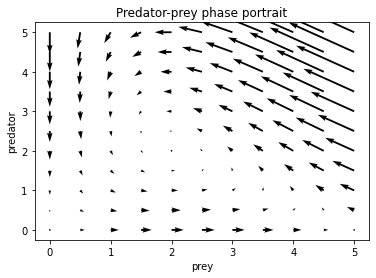

In [237]:
# %load LotkaVolterraPhasePortrait2.py
# Importing the needed python packages
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time 
import sys
from pylab import *
from matplotlib.patches import Rectangle
# Defining the right hand side of the ODEs (rate of changes of predator and prey)

def PredatorPrey(Population, t, r, a, b, d, pmax):
   
    dx = Population[0]*(r*(1-Population[0]/pmax)-a*Population[1])
    dy = Population[1]*(b*Population[0]-d)
    
    return np.array((dx,dy))



r = 7.0 # intitalization of the 4 parameters
a = 2.0
b = 1.5
d = 3.0
pmax = 5
coords = np.linspace(0,5,11)
X, Y = np.meshgrid (coords, coords)
Vx, Vy = PredatorPrey((X,Y), 0, r, a, b, d, pmax)
p=plt.quiver(X,Y,Vx,Vy)
plt.xlabel('prey')
plt.ylabel('predator')
plt.title('Predator-prey phase portrait')

<b> Question 6: </b> How many steady states are there now in this modified Lotka-Volterra model? Are they stable, unstable? Describe the evolution of the system when starting from the initial populations of (preys=0, predators=4) and (preys=4, predators=2.5). 

In [242]:
#%run solutionQuestion6.py


Although the phase portrait provides the dynamical trajectory of the system and the different states it will go through depending on the initial conditions, its does not tell at which <b> speed </b> the different phases of the trajectory are accomplished. In the previous example, following the arrows starting from (preys=4, predators=2.5) was showing an apparently rapid convergence to the stable steady state, while starting from (preys=0, predators=4), the system had to go through a multitude of other states before reaching the stable steady state. This trajectory  seems apparently longer. But <b> is it really ? How much time is really spent along both trajectories ?</b> This is an information that the phase portrait alone cannot give. 

To get insight on how time flies along trajectories, it is needed to get back to the ODEs. For instance, for the trajectory starting at (preys=0, predators=4), the first phase of the trajectory is achieved without increase in the number of preys, hence $A(t) \approx 0$ and the equations simplify to:

$$ \frac{dA}{dt} = 0 $$
$$ \frac{dB}{dt} = -d*B(t) $$

Hence, this first phase of the trajectory is accomplished with a rate $d$, the rate of death of the predators, and shall take a time of order $1/d$. 

Along the second phase of the trajectory, there is almost no predators $B(t) \approx 0$

$$ \frac{dA}{dt} = r*A(t)*(1-\frac{A(t)}{p_{max}}) $$
$$ \frac{dB}{dt} = 0$$

Hence, this phase will follow logistic dynamics with parameters $r$ and $p_{max}$. For the third phase, there is no such obvious simplification, but we can still use a perturbation analysis around the (pmax,0) steady state, as done earlier in this notebook. Then, slightly away from this steady state, the arrows seem “aligned” on the phase portraits hence we can consider that the populations of preys and predators are linearly correlated, $A(t)$ is a linear function of $B(t)$ or conversely… We can <b> do something </b>. Overall, this method is equivalent to a <b> piece-wise </b> resolution of the entire dynamics, and might not work in all cases, or at least not along all parts of the trajectory. 

This approach of the phase portrait is valid when there is <b> no time-dependent coefficient </b> in the original ODEs. If there <b> are </b> time-dependent coefficients, doing the same construction would yield arrows that move in time. This can be done, but it’s more complicated. 

Another limitation of this approach is that, in practice, it is limited to systems of 2 or 3 ODEs. For 4 or more, because there are only 3 dimensions in space, we cannot achieve a satisfactory graphic representation of the phase portrait. However, throughout this entire notebook you have learned many methods that allow to reduce the number of equations in an ODE system.

Below are a couple more exercises to become familiar with the concept of phase portrait. 

<b> Exercise 12 </b>: Modify the Python code used to plot the phase portrait of the Lotka Volterra model to plot the phase portrait for the elementary topological element that describe a negative feedback loop in a biomolecular interaction network. This model has been solved exactly in Exercise 10. The ODEs are:

$$ \frac{dA}{dt} = 1 - k_{B->A}*B(t)$$
$$ \frac{dB}{dt}= k_{A->B}*A(t)$$

Plot the phase portrait for different values of the rates $ k_{B->A}$ and $ k_{A->B}$ and conclude on the different types of dynamical responses depending on the relative values of the parameters. Make sure to also plot the $x<0$ and $y<0$ regions. 



In [257]:
# %load solutionPythonCodeExercise12.py 


Before doing more exercises, let’s have a short break: this model and the corresponding ODEs are an example of a more general class of systems of ODEs, the linear systems of ODEs with two variables $x(t)$ and $y(t)$ and constant coefficients. The general formulation of this model is:

$$ \frac{dx}{dt} = A*x+B*y$$
$$ \frac{dy}{dt}= C*x+D*y$$

The coefficients $A,B,C,D$ form a matrix 

$$\begin{bmatrix} A & B \\ C & D \end{bmatrix}.$$

The diagonalization of this matrix, followed by its elevation to the exponential allows to write a formal solution of the ODE system (see the general resolution of linear systems of ODE above). A good exercise to do if you have time. It follows from this derivation that the dynamical behavior of the system, characterized by the general appearance of its phase portrait, is characterized by 3 numbers: the matrix Trace ($p=A+D$), its Determinant ($q=A*D-C*B$) and a parameter $\Delta = p^2-4*q$. Plotting $\Delta$ as a function of $p$ and $q$ in the $(p,q)$ plane defines different regions of the plane in which the phase portraits of the ODE system have a characteristic appearance (see below, from Wikipedia https://en.wikipedia.org/wiki/Phase_plane):

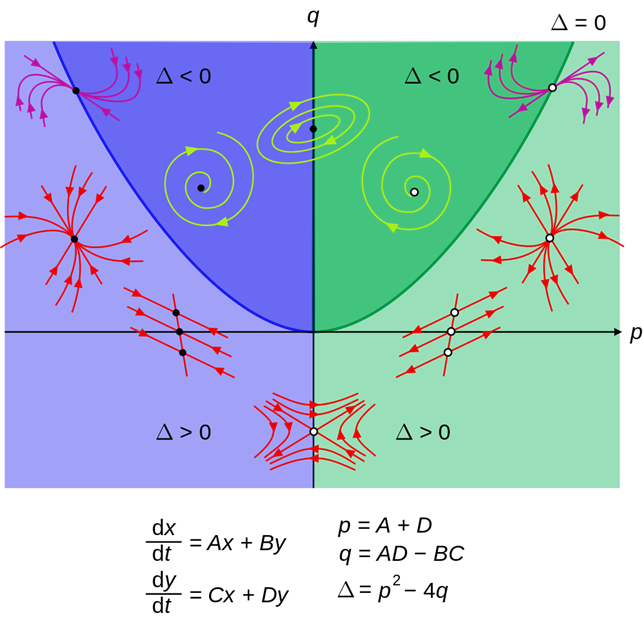

This is a rare instance where it is possible to plot, on the same 2-dimensional figures, multiple phase portraits corresponding to different parameter sets in ODE systems. You might use this portrait as a general guide to control your resolution of linear systems of 2 ODEs. 

Verify in which category the system discussed in Exercice 12 falls, depending on the values of the parameters $ k_{B->A}$ and $ k_{A->B}$. Compare your results with the general, parameter-dependent phase portrait (figure above). Did we get the same results?  

<b> Question 7 </b> And what about the analytical expression we obtained in Exercise 10 when $ k_{B->A} = k_{A->B}$? To which regime does it correspond? Is it any different if $ k_{B->A} \neq k_{A->B}$?




In [254]:
#%run solutionQuestion7.py


From this situation where the long term behavior is purely oscillatory, adding a tiny bit of $p>0$ (i.e., positive contribution of $A$ to its own expression and or $B$ to its own expression) leads to spiral-shapes phase portrait with an outward arrow (amplified oscillations). In contrast, adding a tiny bit of $p<0$, shifting from the y axis to the left (i.e., negative contribution of $A$ to its own expression and or $B$ to its own expression) leads to spiral-shapes phase portrait with an inward arrow (damped oscillations and convergence towards a steady state). 

Thus, this general multi-parameter phase portrait allows to predict the general behavior of the dynamical system. Although it is rigorously demonstrated here only for systems of 2 ODEs (2 biological variables), the lessons learnt from this diagram are general. Hence, it might also be used to adjust the structure of a model which would be guided by experimental observations (oscillations vs no oscillations, damped vs amplified vs purely oscillatory…). 


<b> Exercise 13: </b> Below are the equations describing the dynamics of formation of a trimolecular complex, together with conservation laws for the total pool of complex constituents (proteins A and B). Use the conservation laws to obtain ODEs for $d[A]/dt$ and $d[A_2B]/dt$ only. Then, plot the phase portrait in the following regimes: $A_0>2*B_0$ (excess of A), $B_0<A_0<2*B_0$ and $A_0<B_0$ (excess of B) ... Conclude. 

$$ d[AB]/dt = k_{on1}*[A]*[B] - k_{off1}*[AB]- k_{on2}*[A]*[AB] + k_{off2}*[A_2B]$$

$$ d[A_2B]/dt = k_{on2}*[A]*[AB] - k_{off2}*[A_2B]$$

$$ d[A]/dt = - k_{on1}*[A]*[B] + k_{off1}*[AB]- k_{on2}*[A]*[AB] + k_{off2}*[A_2B]$$

$$ d[B]/dt = - k_{on1}*[A]*[B] + k_{off1}*[AB]$$

$$ [A]+[AB]+2*[A_2B] = A_0$$

$$ [B]+[AB]+[A_2B] = B_0$$


In [320]:
#%run solutionODEsExercise13.py

In [306]:
# %load solutionPythonCodeExercise13.py


In [308]:
#%run solutionConclusionsExercise13.py

<b> Exercise 14: </b> Solve the same system using the quasi steady state approach in the case where $ k_{on1},k_{off1}$ are much larger than $ k_{on2},k_{off2}$  (fast formation of a reaction intermediate).

In [319]:
#%run solutionODEsExercise14.py

In [318]:
#%run solutionODEsExercise14bis.py


Although the examples we have seen represent conceptually simple biological systems, their dynamics are represented by ODEs and systems of ODEs that are very common to modeling of a broad range of biomedical systems. Hence, in practice it will be convenient to try to identify, in real world models, when the underlying equations are similar to the ones we have seen, and use the same tricks to solve them. For more complicated cases, we note that a R package developed by other groups is available online for phase portrait analysis of ODE systems (https://github.com/mjg211/phaseR).

### 5) Other types of ODEs
<b> Optional exercise: </b> The types of ODEs and systems we have gone through in the previous sections are ubiquitous to mathematical modeling of biological/biomedical systems. A good exercise to do is to search the Pubmed database of scientific publications in the fields of biology/biomedicine (in the broad sense), https://pubmed.ncbi.nlm.nih.gov/, for articles referring to “mathematical modeling” or “modeling” or “ODE”. The model equations you will find in these articles will be <b> formally </b> similar to the ones we discussed above, even though of course their <b> meaning </b> (and the meaning of the biological variables, parameters…) will be different, and different from one article to the other. Yet, <b> the resolution techniques discussed above shall be used similarly </b>, regardless of the meaning of the equations. Only when discussing ranges of parameter values, comparing parameters, the sign of some quantities, the values of some variables in the steady state or initial state (and their sign…)… , then we shall pay attention to the meaning of the variables and parameters. 

Doing this exercise, you might recognize that some equations are conceptually different from what we have seen. You might have encountered <b> space-dependent ODEs </b> of the form

$$\frac{dA}{dx}=f(A,x)$$

where $x$ is a space variable, for instance in a mitotic cell, the distance from the middle of a cell where chromosomes are positioned, and $f$ is a function of the biological variable A and this position $x$. The techniques described above (e.g., separation of variables, phase portraits, general solution for linear system…) are fully valid, but there is a noticeable difference: the notion of steady state is different. In a time-dependent system, it is always possible to envision the “large time”, to imagine that we can wait long enough so that all transient mechanisms (all with their own time-scale) are “finished”. In a space-dependent system, this might not be possible. The space dependent ODE will have space parameters, the equivalent of rates: e.g., in the ODE $dA/dx=-k*A$, the parameter $k$ defines a length $1/k$ that tells the typical size across which the  variations of $A$ will be significant. Well beyond this scale, $A$ may be considered as “uniform”, i.e. not depending on $x$ anymore. This is the equivalent of the steady state. But because biological systems have a finite extension in space, within the boundaries of the system the steady state-like condition $x>>1/k$ might not be achieved. Hence, $dA/dx$ might never be exactly 0. In general, in space-dependent ODEs, the steady state condition is replaced by what is called <b> boundary conditions </b> that specify the values of the biological variables at the boundaries of the system, or the values of their derivatives. For instance, the condition $dA/dx=0$ across some interface is equivalent to saying that there is <b> no flux of the biological variable A across the interface </b>, which is also very common (see e.g. next section).

You might also have encountered what is called <b> advanced </b> or <b> delayed </b> ODEs, of the form: 

$$\frac{dA}{dt}=f(A,a*t \pm b)$$

where $a$ and $b$ are two numbers. The situation where $a=1$ and there is a constant delay ($ a*t \pm b = t-b$, $b>0$) might describe well a broad range of systems, where one biological quantity responds to the value of another one but with some delay. In systems of connected neurons for instance, a spike in the action potential will propagate around axons with a finite speed, hence neurons further down in the spike trajectory will receive the signal with a delay that will depend on how far from they original neuron they are. If the states of those neurons feed back to the original neuron, delays shall be accounted for in the ODE system describing the state of the initial neuron. In neurobiology, formal delays in ODEs may arise also from  the transduction of electrical signals into biochemical signals and vice versa at neurological synapses, for instance. But that’s not specific to neurobiology: in gene expression networks, the activation of a gene A and further synthesis of the protein A may have an effect on another gene B, then C, then D… until one of those downstream effectors (or several!) affect the gene A. In principle, this system could be described with regular ODEs, without any time delay, but accounting for all the genes, proteins, and mRNAs involved in this feedback loop. In practice, this could mean dozens to hundreds of ODEs, each with their couple of parameters, and become intractable. Another way to approach this problem is to assume that the gene A has some retrospective effect on itself (feedback). However, because the transcription/traduction of genes B, C, D…. takes some time, the feedback effect is delayed.  

The dynamics of an ODE (or system) with a delay in time are different than in the absence of delay. This is illustrated, for instance, on the following figure (from https://www.biorxiv.org/content/10.1101/2020.08.02.233619v1.full), where a biological variable $x$ represses another variable $z$ through a third one, $y$. 


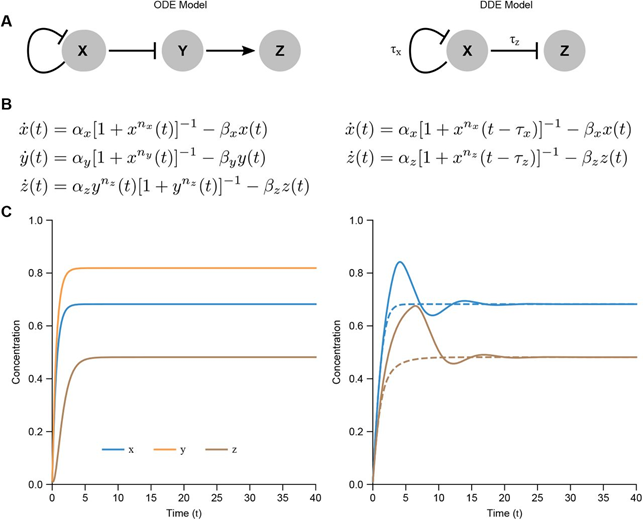


The model is represented either using three ODEs for $x$, $y$ and $z$ (left), or without explicitly representing the intermediate variable $y$ but accounting for its dynamics in a delay in how $x$ affects $z$. As shown on the figures, the long term behavior of the system is the same, though there are differences a short times when the variable $y$ yet has to build up. 

Thus, time-delayed (or advanced) ODEs are a valuable tool to integrate the effect of multiple genes (or neurons, … ) and considerably simplify the structure of a model, still preserving the fact that the dynamics of those multiple variables that we ignore “take some time”.  

The downside is that the methods presented in this notebook do not apply to time advanced or retarded ODEs. Yet, there is a great amount of research work currently being carried on to solve those kind of ODEs, both on the analytical and on the numerical sides. We encourage you to read the relevant literature and contact the authors if you are in the need of solving time-delayed/advanced ODEs. 

You may have also encountered time-dependent ODEs of the form 

$$ \frac{d^2 A}{dt^2} = f(A, \frac{dA}{dt}, t)$$

where $\frac{d^2 A}{dt^2} $ is, in fact, the time derivative of $\frac{dA}{dt}$, and hence the “second order derivative” of the biological variable $A$. Such an ODE is called a <b> second order ODE </b>. Those are not very frequent in biology, however they are very common in physics since the Newton laws of motion are second order ODEs. Hence, you might come across second order ODEs when modeling biological processes with a strong physical component, like for instance cell biomechanics (see also the supplementary notebook SuppNoteBook-PhysicsLawsInBiology). Because such ODEs are common in physics, there is also an arsenal of resolution methods. One of those techniques which does not require any additional knowledge is to remark that, by definition, $\frac{d^2 A}{dt^2} $ is the first order derivative of $\frac{dA}{dt}$. Hence, we can introduce a new biological variable $B$ which is the time derivative of $A$, $B=dA/dt$. Why is this useful? Because doing so, the second order derivative becomes the first order derivative of $B$: $ \frac{d^2 A}{dt^2} = \frac{dB}{dt}$. And thus, the second order ODE becomes a system of 2, coupled, first order ODEs:

$$\frac{dA}{dt} = B$$

$$ \frac{dB}{dt} = f(A,B,t)$$


And we just have to use what we have learned above to solve the system!


Finally, another category of equations you certainly have encountered when doing your pubmed search are differential equations that involve <b> biological variables that depend on both time and space </b>. Such equations are called <b> partial differential equations (PDEs) </b> and will be the topic of the next section. We note that, generally speaking, solving the steady state (large times) for PDEs yields to space-dependent ODEs. 

But let’s de-mystify the PDEs first. This is a more advanced level of mathematical modeling, so we will assume that you have become more comfortable with basic mathematics while going through the previous sections of this notebook.  



## Constructing partial differential equations: space-time dependent modeling
Before working on constructing and solving PDEs, let’s first remember some fundamental concepts relevant to the functions of several variables. 

### 1) Preliminary definitions:

As an analogy, think about the temperature of the air outside. You are at a specific location and measuring the temperature. What can you do? You can remain at the same spot and keep measuring. The variations you will get are the variations of temperature <b> due to time only </b>. Because, in principle, temperature can depend on other variables than time, you don’t want to claim that you <b> have measured the full/universal/comprehensive/unrestricted (…) temperature tiny tiny difference </b> $dT$. Rather, you can claim you have measured how temperature, at your location, depends on time. Assume how your colleagues are measuring the temperature at the <b> same time </b> but at different locations on the map (say, different $(x,y)$). Will the temperature difference between your measurements and your colleagues’ measurements be the same as the one you measured at different times? Certainly not. Again, imagine you sent weather balloons at different altitudes and you compare the temperatures they give at the <b> same time </b>, you will also get “different” differences. 

In other words, when a biological variable depends on multiple other variables, the notions of <b> derivatives </b> and of <b> tiny tiny tiny differences </b> are more subtle. If we have for instance a variable $T$ (like, e.g., temperature) that depends on both time and the three coordinates in space $x,y,z$: $T=T(t,x,y,z)$, it is possible 4 types of tiny tiny tiny differences: 

$$T(t+dt,x,y,z)-T(t,x,y,z)$$

which is the change in temperature upon a small increment in time when staying at the same location, and 

$$T(t,x+dx,y,z)-T(t,x,y,z)$$

$$T(t,x,y+dy,z)-T(t,x,y,z)$$

$$T(t,x,y,z+dz)-T(t,x,y,z)$$

which are the changes in temperature upon small changes of position along respectively the $x$, $y$ and $z$ axes. Because we are looking at infinitesimal changes, it is still true that those tiny tiny tiny changes in temperature are proportional to the tiny tiny tiny change in the relevant variable, e.g. $T(t+dt,x,y,z)-T(t,x,y,z)$ is still proportional to $dt$. 

And we use the <b> notation </b> $\frac{\partial T }{\partial t}$ to represent the coefficient of proportionality, i.e. <b> how much the change in temperature is proportional to the change in time </b>. Hence, by definition of the </b> $\frac{\partial  }{\partial } <b> notation </b>, the tiny tiny tiny differences in temperature upon small changes in time and x, y, z, coordinates respectively are given by:

$$T(t+dt,x,y,z)-T(t,x,y,z) = \frac{\partial T }{\partial t} * dt $$

$$T(t,x+dx,y,z)-T(t,x,y,z) = \frac{\partial T }{\partial x} * dx $$

$$T(t,x,y+dy,z)-T(t,x,y,z) = \frac{\partial T }{\partial y} * dy $$

$$T(t,x,y,z+dz)-T(t,x,y,z) = \frac{\partial T }{\partial z} * dz $$

$\frac{\partial T }{\partial t}$, $\frac{\partial T }{\partial t}$, $\frac{\partial T }{\partial t}$, and $\frac{\partial T }{\partial t}$ are called the <b> partial derivatives of the temperature with respect to t, x, y, and z </b>. The <b> order of derivation does not matter: </b> deriving with respect to x and then to y is equivalent than deriving with respect to y first and then to x. Equations that relate those derivatives together, and to the value of the function are called <b> partial differential equations or PDEs </b>. Of course, if you happen to simultaneously change both $t$ and $x,y,z$, i.e. comparing the temperatures $T(t,x,y,z)$ and $T(t+dt,x+dx,y+dy,z+dz)$, all those tiny tiny tiny differences in temperature will add up, because you can “decompose” the variations in small independent variations with respect to all variables: 

$$ T(t+dt,x+dx,y+dy,z+dz) - T(t,x,y,z) = \frac{\partial T }{\partial t} * dt + \frac{\partial T }{\partial x} * dx + \frac{\partial T }{\partial y} * dy + \frac{\partial T }{\partial z} * dz .$$

This difference, and only it, can be interpreted as the full/universal/comprehensive/unrestricted (…) temperature tiny tiny difference </b> $dT$ because it lists all possible sources of variation for the temperature $T$:

$$ dT = \frac{\partial T }{\partial t} * dt + \frac{\partial T }{\partial x} * dx + \frac{\partial T }{\partial y} * dy + \frac{\partial T }{\partial z} * dz .$$

We can remark, but this is not absolutely necessary for what comes next, that this “decomposition” in independent, elementary tiny changes $dt$, $dx$, $dy$, $dz$ is itself an approximation. Indeed, in terms of differences we can write: 

$$ T(t+dt,x+dx,y+dy,z+dz) - T(t,x,y,z) =[ T(t+dt,x+dx,y+dy,z+dz)- T(t,x+dx,y+dy,z+dz)]+[ T(t,x+dx,y+dy,z+dz)- T(t,x,y+dy,z+dz)]+[ T(t,x,y+dy,z+dz)- T(t,x,y,z+dz)]+[ T(t,x,y,z+dz)- T(t,x,y,z)] = \frac{\partial T }{\partial t} (t,x+dx,y+dy,z+dz) * dt + \frac{\partial T }{\partial x}(t,x,y+dy,z+dz) * dx + \frac{\partial T }{\partial y}(t,x,y,z+dz) * dy + \frac{\partial T }{\partial z}(t,x,y,z) * dz.$$

Hence, the partial derivatives with respect to the different variables t, x, y, z are not taken <b> exactly at the same point </b>. For instance, the time derivative is taken at the point $(t,x+dx,y+dy,z+dz)$. However, and this is a key thing to understand when we manipulate these small “d(something)”, any (continuous) function of t, x, y, and z at the point $(t,x+dx,y+dy,z+dz)$ is almost equal to its value at the point $(t,x,y+dy,z+dz)$, the difference being proportional to $dx$ (we have seen this many times!). Thus, the time derivative of $T$ at point $(t,x+dx,y+dy,z+dz)$ is almost equal to its value at the point $(t,x,y,z)$, the difference being the sum of three terms respectively proportional to $dx$, $dy$, $dz$: it is <b> extremely small </b>, even <b> as small as we can imagine </b> because the “d(something)” are a concept, a difference that can be as small as we need it to be.  Hence, in the equation

$$ T(t+dt,x+dx,y+dy,z+dz) - T(t,x,y,z) = \frac{\partial T }{\partial t} (t,x+dx,y+dy,z+dz) * dt + \frac{\partial T }{\partial x}(t,x,y+dy,z+dz) * dx + \frac{\partial T }{\partial y}(t,x,y,z+dz) * dy + \frac{\partial T }{\partial z}(t,x,y,z) * dz, $$

replacing the partial derivatives at the different points $(t,x+dx,y+dy,z+dz)$, $(t,x,y+dy,z+dz)$ … by the same partial derivatives at the point $(t,x,y,z)$ is equivalent to make “errors” of order $dt*dx$, $dt*dy$, $dx*dz$ … and so on, in other words squares of very small quantities. And how does 0.0001^2 compares to 0.0001? It is negligible. Closing the bracket. The full/universal/comprehensive/unrestricted (…) temperature tiny tiny difference </b> $dT$ is given by:

$$ dT = \frac{\partial T }{\partial t} * dt + \frac{\partial T }{\partial x} * dx + \frac{\partial T }{\partial y} * dy + \frac{\partial T }{\partial z} * dz .$$

As an important remark, especially for the construction of PDEs, there is a fundamental difference between $\frac{\partial T }{\partial t}$ when T is a function of several variables, and $\frac{dA }{dt}$ when A is a function of one variable (time). The latter may be interpreted in terms of the ratio of small differences, and we might multiply $dA/dt$ by $dt$ to obtain $dA$, since $t$ is the only source of variation of $A$, hence its total/full/universal… variations might be obtained this way. The former is a <b> notation </b>, and can be interpreted only as 

$$\frac{\partial T }{\partial t} (t,x,y,z)= \frac{T(t+dt,x,y,z)-T(t,x,y,z)}{dt}$$

but we could also have 

$$\frac{\partial T }{\partial t} (t,3*x,y,z)= \frac{T(t+dt,3*x,y,z)-T(t,3*x,y,z)}{dt}$$

and that would be a different number. Don’t try to recover $dT$ by multiplying $\frac{\partial T }{\partial t}$ by $dt$, this would give a wrong result. <b> Don’t ever try to multiply or divide by “$\partial$(something)” </b>, this doesn’t work. We don’t perform operations on  “$\partial$(something)”. 

However, we can perform operations on “d(something)”, right? Like multiply, divide them… ? Indeed. We still can, even in contexts of PDEs. For instance, what happens to  $dT$ if we divide it by $dt$ ?

$$ dT = \frac{\partial T }{\partial t} * dt + \frac{\partial T }{\partial x} * dx + \frac{\partial T }{\partial y} * dy + \frac{\partial T }{\partial z} * dz .$$


$$ \frac{dT}{dt} = \frac{\partial T }{\partial t}  + \frac{\partial T }{\partial x} * \frac{dx}{dt}  + \frac{\partial T }{\partial y} * \frac{dy}{dt}  + \frac{\partial T }{\partial z} * \frac{dz}{dt} .$$

We could have divided by $dx$, $dy$ or $dz$ and obtained similar equations. This is called a <b> chain rule </b>. 

Why does this matter? When the biological variables describing a biological system are space-dependent, unless in the presence of physical restrictions (sequestering in organelles, diffusion barriers…), there will be fluxes of those biological variables that will tend to re-equilibrate things and homogenize the system. This is a fundamental trait of all natural systems, nature “hates!” inhomogeneities. In biology, because cells and intercellular environments are somewhat viscous systems, fluxes of something are often accompanied by hydrodynamic motion: molecules move together, while interacting, and this can become tricky to write balance equations when constructing ODEs/PDEs if everything moves around. This aspect is detailed further in the supplementary notebook SuppNoteBook-PhysicsLawsInBiology, for those who are interested in this kind of modeling in particular.

A convenient analogy to understand how the “material fluxes” within a system contribute to the variations of biological variables defined within this system is the example of temperature measurements. Let’s assume you are measuring temperature over time, but instead of staying at your front door you are <b> cycling around. </b> We know, from the independent measurements of your colleagues, that temperature depends on $x$ and $y$ (let’s assume the bike doesn’t climb up in the air). So, <b> how much total temperature difference will you measure over a short cycling time dt ?</b> We can apply the chain rule: the total temperature difference $dT$ includes contributions from both the local change in temperature $\frac{\partial T}{\partial t}$ but also from the fact that we <b> have moved </b> between the two measurements, and that there was an existing temperature gradient in the region we have crossed. Hence, the total temperature difference $dT$ is given by the chain rule:


$$ \frac{dT}{dt} = \frac{\partial T }{\partial t}  + \frac{\partial T }{\partial x} * \frac{dx}{dt}  + \frac{\partial T }{\partial y} * \frac{dy}{dt} $$

(where we have forgotten about the upward motion of a bike - not a plane!). Interestingly, in this case, we notice that $\frac{dx}{dt} $ and $\frac{dy}{dt} $ are the two components of the $velocity vector$ of the motion. More generally, we get: 

$$ \frac{dT}{dt} = \frac{\partial T }{\partial t}  + \frac{\partial T }{\partial x} * v_x  + \frac{\partial T }{\partial y} * v_y + \frac{\partial T }{\partial z} * v_z  $$

where we have used $v_x$, $v_y$ and $v_z$ as the three components of the velocity vector, and where the left hand sides is the <b> total variation of temperature experienced over the time dt by an observed that moves at the velocity </b> $\vec v=(v_x,v_y,v_z) $.

This way of computing the time variations of a biological quantity that is embedded in an hydrodynamic flow (whether the quantity itself generates the flow or not) is extremely useful. Indeed, it allows to write down balance equations by splitting the small $dt$ interval in 2 steps: 

step 1): assume there is no hydrodynamic flow, and that the subsystem on which you are making the balance equation does not move, and add up all the terms that contribute to its rate of change over time (such that biochemical reactions…): this gives the term $\frac{\partial }{dt}$.

step 2) use the chain rule above to add the “flux-dependent terms”, that in fact depend only on the local velocity vector and the biological quantity for which we are establishing the balance equation. So this term will always be similar. Always. 

Mathematicians and physicists usually use the symbol $\vec \nabla $ to represent the vector that is formed by the three partial derivative with respect to the three components of space:

$$\vec \nabla = \begin{bmatrix} \frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}  \\ \frac{\partial}{\partial z} \end{bmatrix} .$$

Using this notation, some expressions become more simple, for instance the chain rule can be formally written as an equation between the operations of total derivation and partial derivation:

$$ \frac{d}{dt} = \frac{\partial  }{\partial t}  + \vec v . \vec \nabla $$

that can be “applied” to any function. Also, the <b> Laplacian operator </b>, that sums up the second derivatives of a function with respect to the three variables of space is nothing else than the scalar product of $\vec \nabla $ with itself:

$$ \Delta = \frac{\partial ^2}{\partial x^2}+\frac{\partial ^2}{\partial y^2}+\frac{\partial ^2}{\partial z^2} = \vec \nabla . \vec \nabla … $$

And many others. But you don’t have to understand this $\vec \nabla$ notation to understand this course, it will just be a convenient tool to use if you have complicated calculations to make since it shortens a lot the expressions with multiple partial derivatives. 



### 2) Constructing PDEs: the fundamental example of diffusion and reaction-diffusion systems:
As mention earlier in this notebook, fundamental physics laws might be used to directly obtain ODEs/PDEs to model biological systems. One of this laws is ubiquitous to biology: the law of diffusion. 

As students in biomedicine, you have certainly come across Fick’s law in the context of oxygen and carbon dioxide exchange across alveolar membranes in the lung, a fundamental aspect of respiratory physiology. In this context, the Fick’s law states that the flux of a gaz across a membrane (typically, dioxygen or CO2 , across the alveolar membrane) is proportional to the surface of the membrane, and to the difference in the partial pressure of the gaz on both sides of the membrane (and inversely proportional to the thickness of the membrane, for a finite thickness): 

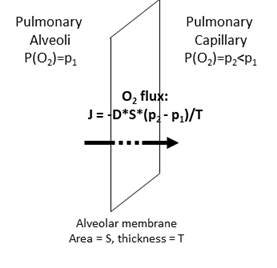

If there is more O2 on the left side, $p_2-p_1<0$ and the dioxygen flows from left to right. Generally the CO2 levels are higher on the capillary side, hence CO2 flows from capillaries to the alveoli. This is in short how respiration works.  

Many biomolecular systems of interest in biomedicine are inhomogeneous, and experiments measure spatial gradients of molecule concentration, activity, or interactions... etc, without necessarily the existence of physical diffusion barriers like an alveolar membrane. Think, for instance, about the gradients of maternal morphogens the exist in fertilized eggs of several model species, and that initiate the tissues differentiation and the very early steps of embryogenesis. 

How does Fick’s law translates in the case of a continuous inhomogeneous aqueous system, like the interior of a cytoplasm, a nucleoplasm, or inter-cellular environment? Naturally, partial pressures become concentrations, their equivalents in solutions. In addition, the “membrane” becomes a fictious surface within the solution, that has no material existence, but just serves as a separator to distinguish the side “1” from the side “2”. Thus, $(p_2-p_1)/T$, which  is nothing else than the pressure at locations “1” and “2” which are very close to each other divided by the distance between those 2 locations (i.e., an infinitely thin patch of membrane), is naturally analogous to the space derivative of concentrations. Thus, the flux per unit surface area is proportional to the opposite of the concentration gradient, the constant of proportionality is called the <b> diffusion coefficient </b>. Across a membrane, we speak of the diffusion coefficient of the membrane. Within a solution, we speak of the diffusion coefficient of/in the solution. 

In summary, the Fick’s law quantifies the universal "force" that tends to drive an inhomogeneous system back to homogeneity over time:

$$ \vec{J} = -D * \vec\nabla{C}$$

In this equation, $\vec{J}$ is the flux vector of a molecule in a solution that is generated by the existence of a spatial gradient $\vec\nabla{C}$ in the concentration $C$ of the molecule. $\vec{J}$ is quantified per unit time  and across a unit surface orthogonal to the gradient. $D$ is the diffusion coefficient (always positive), it has the units (in physics, we call this "dimension") of a surface per unit time, and depends on the type of molecule, the existence or not of a physical barrier orthogonal to the gradient (e.g. porous membrane...), temperature... etc.

<b> It is crucial to understand here than whenever a biological variable is not homogeneous, there exist a gradient in this variable. And whenever there is a gradient, there is an associated Fick’s flux. </b>. 

If the inhomogeneous biological variable is a concentration, there will be a Fick’s flux of molecules to re-equilibrate. If the inhomogeneous biological variable is an electric charge, there will be a Fick’s flux of electrons/protons to re-equilibrate. If the inhomogeneous biological variable is an average phosphorylation level, there will be an effective Fick’s flux of phosphate groups to re-equilibrate (because phosphate groups move on their substrates, there will be a flux of phosphorylated substrates to equilibrate phosphorylation level, and an opposite flux of unphosphorylated substrates to equilibrate the concentration of substrate). And so on and so forth.



Let us know work on another kind of balance equation: the <b> local balance equation </b>. In the previous section, when we were building ODEs, biological variables were only dependent on time. Hence, we were comparing values of the variables at time $t$ and an infinitely close time $t+dt$. If variables depend on space, we also have to account for the fact that biological variables have different values. The rule of thumb in such a situation if to <b> position ourselves and our balance equation within a very small volume inside our system </b>. A volume whose sides are, respectively along the x, y, and z axes, $dx$, $dy$ and $dz$ (see Figure below, left). 

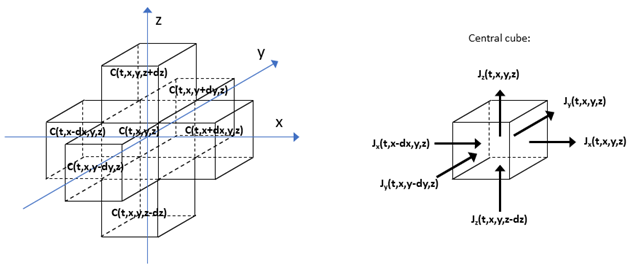

<b> The reasoning that follows is at least as important as the result we will obtain. </b>


We assume we are balancing a number of molecules, or equivalently a concentration here (because we assume the boundaries of our tiny volume fixed), within a central “mini-cube” around the point of coordinates (x, y, z). This is the central cube. We also consider the neighbor mini-cubes along all directions of space, i.e. the cubes localized at the points $x-dx$ and $x+dx$ (left and right neighbors along the x-axis, respectively); the cubes localized at the points $z+dz$ and $z-dz$ (top and bottom neighbors along the z-axis, respectively); and the cubes localized at the points $y-dy$ and $y-dy$ (front and back neighbors along the y-axis, respectively). The concentrations are a priori different in all of the cubes, since it depends on spatial coordinates. 

If there are no processes that create or destroy molecules, and only transport is accounted for, what happens to the concentration at (x,y,t) an instant of time $dt$ later? Fick’s law defines the flux of molecules along all axes, and from this central mini-cube Fick fluxes $J_x(t,x,y,z)$, $J_y(t,x,y,z)$, and $J_z(t,x,y,z)$  are emitted to the neighbor cubes at $x+dx$, $y+dy$, and $z+dz$ (Figure above, right). When we write “emitted”, the actual direction of the physical motion of the molecules depends on whether 

$$\frac{\partial C}{\partial x}(t,x,y,z) = \frac{C(t,x+dx,y,z)-C(t,x,y,z)}{dx},$$

$$\frac{\partial C}{\partial y}(t,x,y,z) = \frac{C(t,x,y+dy,z)-C(t,x,y,z)}{dy}, $$

and 
$$\frac{\partial C}{\partial z}(t,x,y,z) =  \frac{C(t,x,y,z+dz)-C(t,x,y,z)}{dz}$$

are positive or negative. But the flux computed with the Fick’s law $ \vec{J} = -D * \vec\nabla{C}$ is defined in the same reference frame than the gradient, here the (x,y,z) reference frame. Hence, positive partial derivative above indicate an inward motion of molecules, negative derivatives, outward: <b> molecules always diffuse from regions of high concentrations to regions of low concentrations </b>. 

The key thing is that similar equations must be written for <b> ALL </b> the cubes: Fick’s law applies to any “virtual interface” between neighboring volume elements. The molecules that are “emitted” by the volume at point $(x,y,z$ towards the neighbor mini-cubes along the x, y, and z axes ($(x+dx,y,z)$, $(x,y+dy,z)$, $(x,y,z+dz)$) are also <b> received </b> by the latter between times $t$ and $t+dt$. But we don’t care about these mini-cubes, because we are writing a balance equation for $(x,y,z)$, right?

This is absolutely true. But, likewise, this mini-cube $(x,y,z)$ that has all our attention receives also fluxes from the mini-cubes at points $(x-dx,y,z)$, $(x,y-dy,z)$, $(x,y,z-dz)$, as indicated on the Figure above (right). Because fluxes are also emitted from these mini-cubes… The only difference being that the values of these fluxes are slightly different, in principle, because concentrations gradients are not computed axactly at the same location in space. 

Hence, when making the balance, we find that the concentration in the mini-cube $(x,y,z)$  can be calculated using the difference between the fluxes emitted towards $(x+dx,y,z)$, $(x,y+dy,z)$, $(x,y,z+dz)$, and the fluxes received from $(x-dx,y,z)$, $(x,y-dy,z)$, $(x,y,z-dz)$, all of which are defined per unit time and thus need to be multiplied by the duration of the time interval:

$$C(t+dt,x,y,z)= C(t,x,y,z)+dt* \displaystyle \Bigg[-J_x(t,x,y,z) - J_y(t,x,y,z) - J_z(t,x,y,z) + J_x(t,x-dx,y,z) + J_y(t,x,y-dy,z) + J_z(t,x,y,z-dz) \Bigg] $$


or, taking a minus sign out of the big bracket


$$C(t+dt,x,y,z) = C(t,x,y,z)-dt* \displaystyle \Bigg[(J_x(t,x,y,z) - J_x(t,x-dx,y,z))  + (J_y(t,x,y,z)- J_y(t,x,y-dy,z) ) + (J_z(t,x,y,z) - J_z(t,x,y,z-dz)) \Bigg] $$

in which we recognize the expression of the derivatives of the flux components with respect to coordinates:


$$C(t+dt,x,y,z)= C(t,x,y,z)-dt* \displaystyle \Bigg[ \frac{\partial J_x}{\partial x} + \frac{\partial J_y}{\partial y} +\frac{\partial J_z}{\partial z}  \Bigg]$$


which we can rewrite:

$$\frac{\partial C}{\partial t} + \frac{\partial J_x}{\partial x} + \frac{\partial J_y}{\partial y} +\frac{\partial J_z}{\partial z}  = 0$$

This equation is called a <b> continuity equation </b>, because we are making explicit the fact that molecules are <b> locally </b> transported, their total number is conserved if we account for all neighbor elements. Indeed, molecules don’t spontaneously fly to distant regions of the system during an infinitely small time increment. They are displaced locally. 

In $\vec \nabla$ notation this equation is mode compact: 

$$ \frac{\partial C}{\partial t} + \vec\nabla . \vec J = 0$$

The term $ \vec\nabla . \vec J = \frac{\partial J_x}{\partial x} + \frac{\partial J_y}{\partial y} + \frac{\partial J_z}{\partial z}$ (where x, y z are the 3 directions of space and $J_x,y,z$ the components of the flux vector along these directions) is called the <b> divergence </b> of the flux vector $\vec J$ and expresses the balance of inward and outward molecule fluxes at the particular location where you are looking at (local) concentration changes. 

This derivation we have made was conducted in the absence of any rate of molecule production or destruction/conversion to something else. Also, it does not in principle assume any particular form for the fluxes: it could be done exactly the same way with fluxes that do not follow the Fick’s law. Also, the same derivation can be done exactly the same way in presence of biomolecular reactions that consume or produce the molecule. 

The resulting equation is 

$$\frac{\partial C}{\partial t} + \frac{\partial J_x}{\partial x} + \frac{\partial J_y}{\partial y} +\frac{\partial J_z}{\partial z}  = R$$

or equivalently

$$ \frac{\partial C}{\partial t} + \vec\nabla . \vec J = R$$


where $R$ is the net rate of molecule production (production - destruction/conversion to something else) at this particular location of the system. 

And this is where Fick’s law come in handy: it provides a <b> rigorous estimation of what the flux vector is in presence of diffusive transport only </b>. An immediate consequence is that, when plugging Fick's law in this continuity equation (and assuming the diffusion coefficient $D$ is homogeneous in space, one obtains the <b> diffusion equation </b>: 

$$ \frac{\partial C}{\partial t} = D* \Delta C + R = D* \displaystyle \Bigg( \frac{\partial^2 C}{\partial x^2}+\frac{\partial^2 C}{\partial y^2}+\frac{\partial^2 C}{\partial z^2} \Bigg) + R$$

If the diffusion coefficient is inhomogeneous, the equation is:

$$ \displaystyle \frac{\partial C}{\partial t} = R +  \displaystyle \Bigg[   \frac{\partial}{\partial x} \displaystyle \Bigg( D(x,y,z)*\frac{\partial C}{\partial x}  \Bigg)  +\frac{\partial}{\partial y} \displaystyle \Bigg( D(x,y,z)*\frac{\partial C}{\partial y}  \Bigg)  +\frac{\partial}{\partial z} \displaystyle \Bigg( D(x,y,z)*\frac{\partial C}{\partial z}  \Bigg)    \Bigg] = R + \vec \nabla (D(x,y,z)*\vec \nabla C)$$

But the case of homogeneous diffusion coefficient is very, very widespread and much more simple to solve. 

Such equations are called a <b> reaction-diffusion equations </b>. These equations are extremely frequent in mathematical modeling of biological system, and can give rise to very interesting phenomena including, for instance, color patterning on animal skin. We will discuss a few examples in the next section. 

Even though we introduced the full demonstration, in practice  you won’t have to redo this derivation all the time: if you have an ODE model

$$\frac{dA}{dt}= f(A,t) $$

where $A$ is some biological variable and $f$ a function of $A$ and, possibly time, if you want to account for possible space-dependence of $A$, just: 

1) add a diffusion term on the right hand side:

$$ \displaystyle \Bigg[   \frac{\partial}{\partial x} \displaystyle \Bigg( D(x,y,z)*\frac{\partial C}{\partial x} \Bigg)  +\frac{\partial}{\partial y} \displaystyle \Bigg( D(x,y,z)*\frac{\partial C}{\partial y} \Bigg)  +\frac{\partial}{\partial z} \displaystyle \Bigg( D(x,y,z)*\frac{\partial C}{\partial z} \Bigg)    \Bigg] $$

that, if $D$ is homogenous, becomes

$$  D* \displaystyle \Bigg( \frac{\partial^2 C}{\partial x^2}+\frac{\partial^2 C}{\partial y^2}+\frac{\partial^2 C}{\partial z^2} \Bigg) $$

2) convert the total derivative of $A$ to a partial derivative and you get the reaction-diffusion PDE:

$$\frac{\partial A}{\partial t}= f(A,t) + D* \displaystyle \Bigg(\frac{\partial^2 C}{\partial x^2}+\frac{\partial^2 C}{\partial y^2}+\frac{\partial^2 C}{\partial z^2} \Bigg)  $$


This is a straightforward way to convert a homogenous ODE model to a space-dependent model. Space-dependent inputs can then be introduced in the function $f$ as well... Depending on your needs!


### 3) Example of reaction-diffusion models in biology and biomedicine:
Since the reaction-diffusion model is the space-dependent equivalent to the model of interacting biological variables, there are nearly as many examples of successful reaction-diffusion models than of interacting networks. Below, we provide some examples, together with the kind of dynamical behaviors those  models are capable of predicting/recapitulating. Note that in the equations we will use the $\vec \nabla$, $\Delta$ notations for the spatial-derivative operations, to shorten the equations, but at anytime don’t hesitate to refer to their definition given earlier in this section. We will also represent the three spatial coordinates with just one coordinate vector, with the same purpose of saving room in formulas:

$$ \vec X = (x,y,z)$$

1) the generalized logistic equation: the Fisher-Kolmogoroff PDE (FK PDE). 

Logistic ODE:

$$\frac{dP}{dt}(t)=r*P(t)*(1-\frac{P(t)}{P_{max}})$$

FK PDE: 

$$\frac{dP}{dt}(t,\vec X)=D*\Delta P(t,\vec X) +  r*P(t,\vec X)*(1-\frac{P(t,\vec X)}{P_{max}})     $$

It is used to describe the spatial spread of a gene of interest in a population, but also the dynamics of populations growth (as does the logistic ODE). It becomes necessary to introduce the spatial component in the population when, for instance, either the reproducing rate $r$ or the carrying capacity of the environment $P_{max}$ depends on space, which again is very common. 

2) Extension to 2 (or more!) competing species: Lotka Volterra PDE (LV PDE) 

Let’s remember the coupled Lotka-Volterra equations:

$$\frac{dA}{dt}(t)=  k_A*A(t)* \displaystyle \Bigg( 1-\frac{A(t)}{A_{max}} \Bigg) -  k_{BA}*A(t)*B(t)$$

$$\frac{dB}{dt}(t)=  k_{AB}* A(t)*B(t)   -  k_B*B(t)$$

describing predator-prey interactions or, similarly, a system of interacting biomolecules with negative feedback where a molecule $A$ with logistic growth catalyzes the production of $B$, which itself catalyzes the degradation of $A$. If there is a source of inhomogeneity in the system (for instance, inhomogeneous values of $A$ and $B$ at the system’s boundaries, or space-dependent parameters), then the full spatial-dependence of the variables must be taken into account and the variables satisfy the coupled reaction-diffusion PDEs: 

$$\frac{dA}{dt}(t,\vec X)=D_A*\Delta P(t,\vec X) +  k_A*A(t,\vec X)* \displaystyle \Bigg( 1-\frac{A(t,\vec X)}{A_{max}} \Bigg) -  k_{BA}*A(t,\vec X)*B(t,\vec X)$$

$$\frac{dB}{dt}(t,\vec X)=D_B*\Delta B(t,\vec X) +  k_{AB}* A(t,\vec X)*B(t,\vec X)   -  k_B*B(t,\vec X)$$

where $D_A$ and $D_B$ denote the diffusion coefficients of both species, which may be different. 

3) The Susceptible-Infected-Recovered model in epidemiology (SIR model)

A very popular approach to study the spread of infectious diseases is to partition the total population into three subpopulations of susceptible, infectious and recovered individuals (denoted by the populations $S$, $I$ and $R$, respectively). Individuals are born in the “susceptible” group with a constant rate $b$  and each group dies with its own rate $\mu_{S,I,R} $. Susceptible individuals get infected with a rate that is proportional to the infected population (contagion), $\beta *I(t)$, and Infected individuals recover from infection with a rate $\alpha$ with some immunity, so that they don’t fall back into the “susceptible” group but rather into a “Recovered” group that is not susceptible to the infection again (immunity). In this scenario, the SIR model is governed by the following system of ODEs:

$$\frac{dS}{dt} = b -\beta * S(t)*I(t) - \mu_S*S(t)$$

$$\frac{dI}{dt} = \beta * S(t)*I(t) - \mu_I*I(t) - \alpha * I(t)$$

$$\frac{dR}{dt} = \alpha *I(t) - \mu_R*R(t),$$



This model might be used for homogenous distribution of the populations. And we know that this is not the case: densely populated regions propagate infectious diseases faster than low-density regions. <b> If the populations are inhomogeneous, it does not make sense anymore to write down equations for the “total” populations of the subgroups </b>, $S$, $I$, and $R$. Rather, we shall define <b> local populations densities </b>, $s(t,\ X)$,  $i(t,\ X)$,  and $r(t,\ X)$,  i.e. <b> the number of individuals per unit “volume” </b>. This is analogous to a concentration in biochemistry. For populations, the “volume” would rather be the surface area of a local patch of land…  The <b> same </b> model shall be written for $s(t,\ X)$,  $i(t,\ X)$,  and $r(t,\ X)$, just adding diffusion terms:   

$$\frac{\partial s}{\partial t} = D_s* \Delta s(t,\vec X) + b -\beta * s(t)*i(t) - \mu_S*s(t)$$

$$\frac{\partial i}{\partial t} = D_i* \Delta i(t,\vec X) +  \beta * s(t)*i(t) - \mu_I*i(t) - \alpha * i(t)$$

$$\frac{\partial r}{\partial t} = D_r* \Delta r(t,\vec X)  + \alpha *i(t) - \mu_R*r(t), $$

and the conservation for the total population size should integrate all the contributions of these local densities of populations (but we will come back to this in more details soon):

$$\int_{model domain} [s(t,\vec X)+r(t,\vec X)+i(t,\vec X)] \, d\vec X = P_{tot} = const.$$

4) Spontaneous pattern formation in biology (development): 

Spatial patterns are ubiquitous to biology, not only the nice colors on butterfly wings: how can our own genomes encode the fact that adults will have (anti)symmetric hands, each with five fingers and a thumb pointing inwards while the little finger points outwards? Spatial patterns can spontaneously arise from reaction-diffusion systems, under particular conditions that are still being discovered or refined. One of the historically important set of conditions was the <b> interaction between a locally amplified activator and a fast diffusing inhibitor </b> (we sometimes read “local activation, lateral inhibition”). This idea, proposed initially by Turing, was developed further by Gierer and Meinhardt in 1972 and is described by the following reaction-diffusion PDEs for the activator $A$ and its rapidly diffusing antagonist $H$:

$$ \frac{\partial A}{\partial t}=D_A*\Delta A + \rho_A*\frac{A^2}{(1+\kappa_A*A^2)}*\frac{1}{H}-\mu_A*A+\sigma_A$$

$$ \frac{\partial H}{\partial t}=D_H*\Delta H + \rho_H*A^2-\mu_H*H+\sigma_H,$$

where $\mu_{A,B}$ are removal/destruction/consumption rates, $\sigma{A,B}$ the production rates and $\kappa_A$ expresses the saturation of $A$ (all of which, in the general case, depend on other biochemical factors); $D_{A}<<D_B$ are the diffusion rates; and $\rho{A,B}$ the constants coupling the two species. 

Depending on the relative strength of the parameters, these coupled reaction-diffusion PDEs are capable of generating traveling “waves” of activation, stable patterns with activated “dots” within regions of dominant inhibition, or with intertwined “stripes” of dominant activated/inhibited regions… A very broad range of dynamical behaviors which are <b> all </b> observed in cell biology. 

For instance, reaction-diffusion models explain the digit patterning in vertebrates (see Figure below, from https://doi.org/10.1016/j.ydbio.2019.10.031 and references therein).

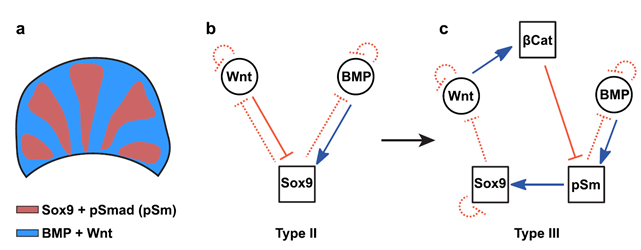



The formation of the digits is due to spatial patterns of the Sox9, pSm and BMP, Wnt proteins across cell layers during development (a). The mutual inhibition between these proteins, represented by the elementary topological network modules (b) and (c) coupled with diffusion explains the apparition of those patterns.  Further recent developments and categorization of reaction-diffusion PDEs are reviewed for instance in https://doi.org/10.1016/j.ydbio.2019.10.031 and references therein. Spatial patterning also explain the formation of neuronal structures in the brain, the organization of retina-connected nerves during vision development in embryos … etc.

5) Excitable dynamics and wave propagation in reaction-diffusion biological systems:

A broad range of responses to physiological stimuli are governed by similar reaction-diffusion dynamics. In general, the stimulus is a “spike” or a “wave”, that is carried by the biochemical network of reactions, modulated by diffusion, to a specific target. In this situation, the reaction-diffusion dynamics propagate biochemical signals as traveling waves to the final destination. This is relevant in the study of the contractions of cardiac tissues for instance, but also the nervous response to stimuli (including visual stimuli on the retina). In the adult visual system, retinal ganglion cells send their axons to target neurons in the lateral geniculate nucleus (LGN) in such a way that neurons originating from both eyes are well separated. But during development in utero, this is not the case. The adult organization of neurons originates in a coupled regulation of retinal ganglion cell signaling, which spontaneously generates calcium “waves” that propagate across central synapses to the LGN neurons, and the immature neural circuit. Thus, before photoreceptors are even present, the nervous wiring of the visual system has been autonomously organized through reaction-diffusion dynamics. 
When the signal cannot be transmitted as it should, these dynamics can also give rise to “wrong” spatial-temporal patterns, and important instance of which are spiral waves. For instance, heart contractions are also governed by similar dynamics and when disease such like vascular infarction inactivate some regions of the heart muscle, the wave of the electrical signal may turn into a spiral wave, causing irregular contractions and insufficient blood supply. Depending on the strength, the organism may experience tachycardia, atrial fibrillation, and ventricular fibrillation, which may be life-threatening. Defibrillators, for instance, attenuate spiral waves. 

6) Chemotaxis:

Let us now consider autonomous, motile cells (amoeba, bacterial, cancer cells…), immersed into a bath of chemoattractant $a$ (nutrients, growth factors …), with existing gradients such that $a(\vec X)$. In other words, autonomous cells in basically any non-homogeneous medium (cells will always prefer something to something else!). So a situation, again, of broad biomedical relevance. Let us define the $C(t,\vec X)$ the concentration of cells at the location$\vec X$ in space, at time $t$. 

In the absence of chemoattractant gradient, we can expect cells to move randomly. Hence, they would “diffuse”, in the general sense, corresponding to a Fick’s flux vector $\vec{J_{diff}}= -D*\vec \nabla C$  In addition, because of the presence of the chemoattractant gradient, we might expect that cells would tend to <b> follow preferentially </b> the chemoattractant, i.e. move towards region of high concentration of attractant. This leads to a chemotactic flux proportional to such gradient, and of the same sign:

$$\vec{J_{chem}}=  C*f(a)*\vec \nabla a$$

where the function $f(a)$ is a function of the concentration in chemoattractant, which can be a constant, or something more complicated with saturation effects… it’s a general, tunable form of the model. With these two fluxes added, the same derivation we did in the previous section would lead to :

$$\frac{\partial C(t,\vec X)}{\partial t} = D \Delta C(t,\vec X) - \vec \nabla \displaystyle \Bigg[ C(t,\vec X)*f(a(\vec X))*\vec \nabla a(\vec X) \Bigg] .$$

If now the chemoattractant is secreted by the cells, you will write another reaction-diffusion PDE for $a(t,\vec X)$ that will include diffusion of the molecule $a$, and a “rate of synthesis” that will be proportional to the concentration of cells… Leading to a system of coupled reaction--diffusion PDEs. And you have built a collective migration model!



7) Tumor growth and the invasion of health tissues:

Cancer invasion and metastatic spread are inherently spatial processes, which require space-time-dependent modeling (PDEs). One of the first models of cancer cell invasion of healthy tissues was proposed by Gatenby and Gawlinki in the late 1990’s (https://cancerres.aacrjournals.org/content/56/24/5745.long). The model assumes that a certain density of non-diffusing normal cells, $n(t,\vec X)$, competes with a density of diffusing cancer cells $c(t,\vec X)$, for the occupation of a fixed space (the space normally devoted to the healthy organ - this is a simplification). They normalize the densities so that the maximal density, corresponding to the occupation of the total volume, is 1. Both cell populations are assumed have a logistic growth, with a maximal density of, thus, 1. Cancer cells have the ability to move when normal cells would not. Their diffusion is impeded by the presence of the normal cells: the denser the normal tissue, the less easily cancer cells diffuse. Hence, the diffusion coefficient of cancer cells is assumed to be proportional to $(1-n)$. The model account for the fact that cancer cells secrete and excess of $H^+$ ions (excess concentration $h(t,\vec X)$) that leads to the death of normal cells.  Hence, the model resumes to three coupled reaction-diffusion PDEs:

$$\frac{\partial n}{\partial t}=r_n*n*(1-n) - \gamma * h*n $$

(for normal cells, logistic growth with rate $r_n$ and $H^+$-dependent death rate $\gamma * h $ )

$$\frac{\partial h}{\partial t}=r_h*c - \delta * h +D_h*\Delta h$$ 

(for H+ ions, production by cancer cells with rate $r_h$ and overall reabsorption by all tissues with average rate $\delta$, and diffusion with uniform diffusion coefficient $D_h$)

$$\frac{\partial c}{\partial t}= r_c*c*(1-c) + \vec \nabla \displaystyle \Bigg[ D_c*(1-n)*\vec \nabla c \Bigg]$$

(for cancer cells, logistic growth with rate $r_c$ and diffusion with a non uniform diffusion coefficient that decreases with increasing amount of normal cells $ D_c*(1-n)$: refer to the full derivation of the diffusion equation for an expression in terms of partial derivative and not the $\vec \nabla$ operator).

This model predicts the drop in overall cell density $n+c$ at the interface between a healthy tissue and a patch of cancer cells, as observed in experiments.


The purpose of this introductory section was to emphasize on the importance of understanding reaction-diffusion dynamics in a broad range of biological contexts. There are many, many more examples. However, RD equations are not the only PDEs one may encounter in the mathematical modeling of biological systems, and we will now see how to construct PDEs more generally. 



### 3) Constructing PDEs from space-dependent balance equations:

When dealing with space-dependent biological variables, there are a certain number of general rules to follow when constructing the PDEs. These rules shall guide the construction, rather than heavily constrain it: indeed, as we have already seen there is quite a lot of flexibility in choosing model ingredients, how to mathematically formulate model hypotheses (e.g. how “activation” of “repression” or “saturation” effects are translated in mathematical language)… But these rules shall help to properly design the framework. So we’ll start with them. 

<b> rule #1 </b> is to convert any relevant variable to a local <b> density </b> $ C(t,\vec x)$, which is defined as the variable population within a small volume element in which the variable may be considered homogeneous, such as the mini-cubes we used to explain the law of diffusion:

$$ C(t,\vec x) = \frac{dN}{dV} $$

where $dN$ is the total number of model object, biological variables, with certain features… within the volume $dV=dx*dy*dz$ (think of it as the volume of the mini-cube of sides $dx$, $dy$, $dz$ - this volume can be as small as we want: this is a “concept”; so yes, if we take it small enough biological variables may be homogeneous within the small volume). Every biological variable which will be the object of a PDE will have to be defined <b> locally, per unit volume </b>. If this is done, the total number of objects $N_{tot}$ within the total volume $V_0$ of the entire system is the integral sum of the number of objects within each of these small volume elements: 


$$N_{tot} = \int_{V_0} dN $$

in which we can replace $dN$ by its expression in terms of $C$ and $dV=dx*dy*dz $:

$$N_{tot}(t) = \int_{V_0} C \,dV = \int_{V_0} C(t,x,y,z) \,dxdydz .$$

This is how global conservation laws are implemented in space-dependent modeling: as conservation over time of integral sums. 

Once we have properly defined densities of the biological variables of interest, the next step is to position ourselves within one of these small volume elements around e.g. the point of coordinates $(x,y,z)$, and to write a balance equation just as we did for the reaction-diffusion system:

<b> rule #2 </b>

Choose a small volume element. Write down the densities/concentrations of biological variables within the elements. Explicit the “rates of change” $R$, i.e. the right hand sides of the corresponding ODE model, as functions of all the densities, exactly as we did when constructing ODEs. Add all the fluxes, expressed in units of “number of molecules/moles” per unit time and per unit surface area of the “interface” between the volume element in which we are writing the balance equation and its neighbors. Always add Fick’s flux, which is naturally expressed in such a unit:

$$\vec{J_{diff}}= -D*\vec \nabla C$$

Add any convective flux, i.e. the natural flux of molecules along an hydrodynamic flux:

$$\vec{J_{conv}}= -C*\vec{v}(x,y,z)$$

where $\vec v(x,y,z)$ is the velocity of the hydrodynamic current that carries molecules within it. If we account for a convective flux, all soluble molecules will be dragged and thus the convective flux will be the same for all molecular species. Note that many models don’t account for convective fluxes! If we are modeling at a larger scales (e.g. cells, not molecules), it works exactly the same way.

Add any additional flux that might bias the motion of the model objects, such that for instance the chemotactic flux (which, in contrast, will certainly be different for different model objects):

$$\vec{J_{chem}}=  C*f(a)*\vec \nabla a$$

Then, for each model object $A$, the balance equation is obtained exactly as we did for the diffusion equation and will therefore be:

$$\frac{\partial A}{\partial t} = R - \vec \nabla \vec{J_{tot}}(A) = R - \frac{\partial J_{x,tot}(A) }{\partial x}- \frac{\partial J_{y,tot}(A) }{\partial y}- \frac{\partial J_{z,tot}(A) }{\partial z}$$

where $\vec{J_{tot}}(A) = \vec J_{diff}+\vec J_{conv}+\vec J_{chem}+ … $ is the total flux of model object $A$ outward of the small volume of interest, per unit time and unit surface area of the volume facets, and $J_{x/y/z,tot}(A)  $ are its components along all axes of the reference frame. 

<b> rule #3 </b>

Implement the global conservation laws, if needed within each compartment of the model, i.e. for instance if the total number $N_{tot}$ of a given molecular specie is conserved over time, we can write for its concentration

$$N_{tot}= \int_{V_{compartment}} C(t,x,y,z) \,dxdydz = const.$$

Let’s see how it works with a couple of examples. And, once is not custom, let’s construct a PDE that has nothing to do with “space” stricto sensu. Though, we’ll use the same formalism. 
We assume we have a population of non dividing cells $N_0$. Because of biological variability, they all have different cell volume, however we assume that the distribution of cell volumes across the population is smooth and that there is some underlying rule (it is not something random). We assume all cells are growing in volume with the same growth rate $g$, meaning that each cell acquires the additional volume $g*dt$ during a small time increment $dt$. We want to mathematically model this system, i.e. the time evolution of cell volumes.  

<b> Question 8: </b> which biological quantity should we define ?


In [321]:
# %run solutionQuestion8.py


Here, we have the following variables: time, the distribution of cell volumes initially, and the growth rate of each individual cells. We want to study how the volume of cells change over time, which is pretty vague! 
Because all cells have a different volume, we should write N0 equations and we would get, for each cell, Vcell(t)=Vcell(t=0)+g*t because cells all grow at the same rate g.
But this is not convenient: rather, let us regroup together the cells for which the balance equation will be very similar. Those are all the cells which have approximately the same volume. 
So we denote C(t,V)=dN/dV the number of cells which, have time t, have a volume between V and V+dV. Our mini-cube-like element is, here, a bin located at the volume V and of width dV. And we bin cells as a function of their volume.



Once this is done, we can write a balance equation for the bin of size $dV$ located at a volume $V$. Is there synthesis/degradation of cells? No, just growth. And because the tiny element in which we write the balance equation is a cell volume bin, growth is a flux between bins. So, $R=0$. What is the flux? It is neither a diffusive system, nor a convective system. It is completely different. But we can still define a flux. How many cells leave the bin between $V$ and $V+dV$ during a very short time $dt$? There is a total of $C(t,V)*dV$ cells inside the bin, by definition of $C$, and we have chosen $dV$ small enough so that those cells have uniformly distributed volumes between $V$ and $V+dV$. Because each cell acquires an extra volume $g*dt$, only those cells which are close enough to the “border” of the bin will escape the bin and thus contribute to fluxes during the small time increment $dt$ (see figure below, the “blue” fraction of the volume bin $dV$). This volume gain $g*dt$ represent a fraction $g*dt/dV$ of the total bin, hence the number of cells within this “neighborhood of the border” is $ dN* g*dt/dV = C(t,V)*g*dt$. 


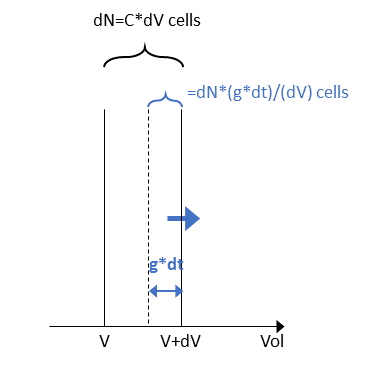


However, the is a similar <b> inward </b> flux of molecules that comes from the <b> previous bin </b>, the one starting at $V-dV$. And this flux is also obtained following the same reasoning, the only difference being that the concentration at volume $V-dV$ is involved. Hence, the balance equation becomes: 

$$dN(t+dt,V)=dN(t,V)+ C(t,V-dV)*g*dt - C(t,V)*g*t = dN(t)-g*dt*[C(t,V)-C(t,V-dV)]$$

We recognize here $ C(t,V)-C(t,V-dV)=\frac{\partial C}{\partial V}*dV$ so we have:

$$dN(t+dt,V)-dN(t,V)= -g*dt*\frac{\partial C}{\partial V}*dV $$

Let’s divide by the bin size, so that the left hand side become concentrations:

$$C(t+dt,V)-C(t,V)= -g*dt*\frac{\partial C}{\partial V}$$

And dividing by the time increment we recognize on the left hand side the derivative of concentration with respect to time:


$$\frac{\partial C}{\partial t}= -g*\frac{\partial C}{\partial V}$$

$$\frac{\partial C}{\partial t} + g*\frac{\partial C}{\partial V} = 0$$

We have constructed another PDE, from scratch, using a balance equation in a “bin” $dV$, a bit like a small volume element is a “bin” of space. The term we obtain on the right hand side is completely equivalent to what we would have obtained by adding a <b> convective flux </b> of strength $J=C*g$ and directed along the Volume axis. 

<b> Question 9: </b> Is it that silly to think about cells uniformly growing at a growth rate $g$  as cells being dragged in a flow of “velocity”  $g$ along the volume axis?



In [323]:
# %run solutionQuestion9.py


Another remark we can do on this simple yet instructive example is that we could have used the chain rule to obtain the PDE in a straightforward way. Indeed, the concentration $C(t,V)$ is the population of cells in the bin around the volume V. With time, the bin itself is moving forward in volume at the rate $g$, meaning that if nothing else what to happen, the entire bin would be transported to a volume $V(t)=V(t=0)+g*t$. The total derivative of $C$ can be obtained in analogy with the temperature change experienced by an observer cycling around: 

$$\frac{dC}{dt}=\frac{\partial C}{\partial t}+\frac{\partial C}{\partial V}*\frac{dV}{dt}$$

and since in this case $V(t)=V(t=0)+g*t$, $\frac{dV}{dt}=g$ and:

 $$\frac{dC}{dt}=\frac{\partial C}{\partial t}+g*\frac{\partial C}{\partial V}. $$



Although very interesting from a pedagogical point of view, the example of uniformly growing cells has little interest in practice. Let’s now discuss an example which is much more relevant to current biomedical knowledge: the modeling of microtubule dynamics and the “microtubule catastrophe”. 

Microtubules are an essential part of the cytoskeleton and, as such, are involved in many major cellular processes, and thus are implicated in a broad range. For instance, inhibiting microtubule formation alters cell division, so microtubule formation inhibitors are considered as anti-proliferative drugs in cancer treatments, however they also have pleiotropic effects. 

Microtubules are polymer filaments, assembled from dimers of α- and β-tubulin that are the basic “building blocks” of microtubules. Microtubule assembly is highly dynamic and respond to the needs of the cell. To form microtubules, the dimers of α- and β-tubulin bind to GTP in the cytosol and attach to the growing end of the microtubule, often referred to as the “+” end. The other end ((-) end) is stabilized by capping proteins. GTP-bound tubulin dimers eventually hydrolyze GTP into GDP, and GDP-bound tubulin dimers are much less prone to polymerization. Hence, dimers bound to GTP tend to assemble into microtubules, while dimers bound to GDP tend to fall apart, making the GTP-GDP cycle an essential part of microtubule dynamics. The tubulin (i.e., α- and β-tubulin dimer) cycle might be represented/simplified as follow (figure from https://arxiv.org/abs/0811.2245):


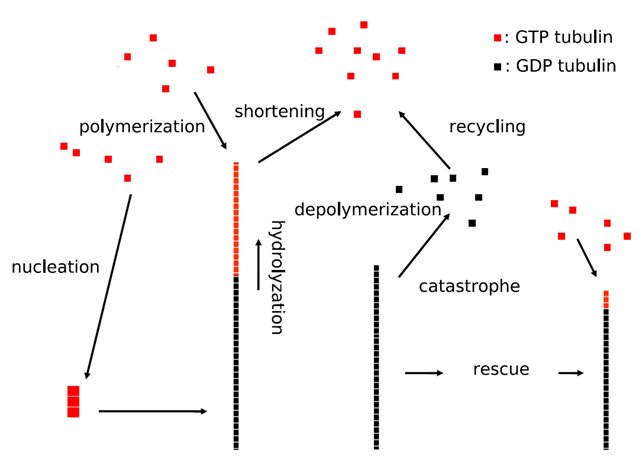


In short, GTP-bound tubulin either nucleates new filaments, polymerizes existing filaments (both filaments with GTP-bound and GDP-bound (+) ends, we refer to the latter as “microtubule rescue”), detaches from existing filaments (shortening), or is being hydrolyzed within filaments (hydrolyzation); GDP-bound tubulin either rapidly detaches (depolymerization/catastrophe), or is converted to GTP-bound in the cytosol (pumping, or recycling).

We will construct step-by-step a continuous mathematical formulation of this model of microtubule polymerization (i.e., PDEs). We assume we don’t have just one microtubule to model, but many, each with its own GTP- or GDP-bound tubulin content as shown on the figure above. In what follows, we assume that the pool of available GTP tubulin is infinite. We’ll see later how to modify our model if this is not the case. 

<b> Question 10: </b> Do we model each microtubule individually? Why?


In [325]:
# %run solutionQuestion10.py

<b> Question 11: </b> How would you choose the variables that affect this density? Depending on the choice of variables, what would be the model parameters? 

In [328]:
# %run solutionQuestion11.py

Let us start by modeling the processes that affect the density $u(t,x,y)$ regardless of the values of $t$, $x$ and $y$, i.e. processes that are relevant to microtubules of a given, finite length, with existing GDP- and GTP-tubulin domains ($x \neq y$). That excludes nucleation, depolymerization and rescue. We will add these processes after, following the same reasoning.  

<b> Exercise 15: </b> Write a balance equation for $u(t,x,y)$ that accounts for the remainder of the processes, i.e. polymerization, shortening and hydrolysis. If necessary, use an analogous reasoning as what we did for the cell size distribution example above. 


In [340]:
#%run solutionPDEsExercise15.py

<b> Exercise 16: </b> How should we complete our PDE scheme to account for nucleation, depolymerization and rescue?  How would the equations obtained in exercises 15, 16 should be modified, and by which equation should they be completed to account for a limited pool of tubulin?

In [351]:
# %run solutionPDEsExercise16.py

<b> Exercise 17 :</b> The article https://bmcsystbiol.biomedcentral.com/track/pdf/10.1186/s12918-016-0348-2.pdf presents a mathematical model of Alzheimer’s disease, that includes neurons, astrocytes, microglias and peripheral macrophages, as well as amyloid β aggregation and hyperphosphorylated tau proteins. The model is represented by a system of partial differential equations, Eqs 1-18. The model is used to simulate the effect of drugs that either failed in clinical trials, or are currently in clinical trials. (Text above is from the paper abstract). 

Which equation are space-dependent? Why? Which species (cell types, proteins…) are considered as freely diffusing and which are not? How do you interpret the second terms on the left hand sides of equations 11, 12 and 13, 14? What does that mean, biologically?


In [368]:
# %run solutionPDEsExercise17.py

### 4) Analytical resolution of PDE(s): basic approaches (sometimes sufficient!) 
Solving PDEs is often difficult, if not impossible analytically. In the next section, we will see some numerical methods. However, before we turned to computing, some techniques shall be tried first. In the worst case scenario, even if the resolution is impossible, “playing” with equations and trying to find solution in some parameter regimes, or to determine the general “asymptotics” (similar to what we did for ODEs with the phase portrait) will help to better understand the system and guide the numerical resolution. So here’s a list of tricks, in no particular order, and then we’ll look at examples:

<b> Tip #1: as in ODEs, solve the steady state: </b>

The steady state is defined locally in PDEs, i.e. at any point of space we require $\frac{\partial Y}{\partial t} = 0$, for all model variables $Y$. Thus, by construction, the steady state of PDEs define <b> differential equations i with respect to space </b>. If there is just one space coordinate left after simplifications (see following point for techniques to simplify), then it’s an ODE. All techniques we used to solve ODEs in time remain valid. 

The next simplifying step can be, then, to look for an <b> homogeneous solution </b> by setting </b> $\frac{\partial Y}{\partial x}=\frac{\partial Y}{\partial y}= \frac{\partial Y}{\partial z}=0$ for any variable $Y$. Indeed, <b> if there exist a such solution to the PDEs/system </b> (including the boundary conditions) written in the absence of these spatial derivation operators, then this solution will also be a solution of the full PDEs/system (including these operators), simply because our homogeneous solution $Y$ satisfies $\frac{\partial Y}{\partial x}=\frac{\partial Y}{\partial y}= \frac{\partial Y}{\partial z}=0$. It looks like a chicken and egg thing, but it’s not!  Think twice. If you find such a solution, it doesn’t mean it is the only one, but it means this is one possibility. So, how to know this is the solution that will be achieved in the steady state? If you want the answer now, go to tip # 3. Otherwise, stay here, and check at tip #2

<b> Tip #2:  use invariants and symmetries to simplify equations: </b>

A symmetry of a mathematical model is a transformation of space under which the model is invariant. Think you’re in summer, by the lake, a very large, wide lake in all directions. The water is perfectly still, and you throw a pebble in the water far from the shore, as far as you can. The pebble deforms the surface of the water before drowning, generating a mechanical wave on the surface of the water. Then, the wave propagates in all directions, making almost perfect circles that slowly fade away while moving away from the point of impact. Then, the lake is still again. We could have guessed the circular shape that the waves make without doing the experiment. Why? 

Because the mechanical properties of the water are the same everywhere in the lake, there is no <b> preferred direction </b> nor <b> particular point </b>. Hence, when the pebble hits the surface, the “point-like” perturbation  will propagates, yes, but since there is no preferred direction it will propagate equivalently in all directions… which defines a circle. The surface of the lake is like an infinite plane, so you can imagine you move it in either x or y direction, or rotate by any angle…. it will be unchanged. Thus, when at equilibrium, before the pebble hits the surface, the lake is invariant to both translations (in both x and y directions) or rotations (with respect to any vertical axis). When the pebble hits the surface, it defines a particular point, a reference, the “0” of the reference frame. Hence, it is now impossible to translate the lake in any direction, because this would “move the 0”. However, it is still possible to draw a vertical axis from this 0 and rotate the lake by any angle around this vertical axis: this would not affect the way the lake looks at all. And if rotating the system makes it unchanged, you must be able to rotate the solution of the system’s equations without changing it. In other words, the solution should depend on any particular angle of rotation around the symmetry axis (the vertical axis planted on the point of impact). 

And how this makes our lives easier? A traveling wave at a surface of a lake is defined by the height $z$ of the water relative the equilibrium level as a function of time $t$ and the horizontal coordinates $x$ and $y$ on the surface. The mechanical equations for water surface deformation involve derivatives of z with respect to x, y, t… Because we have noticed that the solution must be rotationally symmetric, instead of using x and y as space coordinates, we can use the polar coordinates $r$, the distance from the point of impact and $\theta$, the angle made relative to the x axis (we refer you to basic mathematics courses for the definition of polar coordinates). Maths books give the expression of the derivation operators (such like $\nabla$, $\Delta$ …) in function of $\partial /\partial r$ and $\partial /\partial \theta$, which is great. But wait: didn’t we say that the solution should be rotationally invariant? How then could it depend on an angle $\theta$ defined with respect to a particular axis? This is perfectly true: $\partial /\partial \theta=0$ and the solution only depends on $r$, and $t$. That’s 1 space-variable, not 2 anymore. Much simpler. 

Would it be so different for modeling a tumor growing in a completely isotropic environment, from a single cells (isotropic means structurally equivalent in all directions of space)?  Certainly not, at first sight we would try to find a solution for the tumor cell density that depends only on the distance from the original cell. We would use spherical coordinates, and look for rotationally invariant solutions in 3D. That will be 1 space variable, not 3 anymore. Much, much simpler. 

What if there is no full spherical symmetry? Assume we have a PDE model that involves the binding and unbinding of microtubule-associated proteins (MAPs) to a single, long microtubule (MT) filament (draw it, good exercise). As a first approximation we can consider it as infinite.  We want to describe the space-dependent concentration of the MAPs, so we include the diffusion term in addition to the biochemical rates, and we end up with 4 variables, time and 3 space-variables. We draw a reference frame that positions the z axis along the MT, and x and y orthogonal to it. Because the MT is very, very long, translating the system along the z axis doesn’t change it. So, again, the solution cannot depend on z (or, in other words, we expect the density of MAPs to be the same irrespective of the position along the MT … $\partial /\partial z = 0$). 
And because we can rotate the system around the MT/z axis, the model is also rotationally invariant within the ($x$,$y$) plane. Hence, we can define the polar coordinates in this plane and get rid of all derivatives with respect to the polar angle $\theta$ in the expression of the diffusion operator $\Delta$. Hence, again, we reduce 3 spatial variables to only 1 at the end. And the steady state $\partial /\partial t = 0$ becomes a single ODE for $r$. This system of coordinates (with a preferential axis $z$, and polar coordinates in the perpendicular plane ($x$,$y$), is called cylindrical coordinates. A biological system that has a preferred axis, but which is otherwise rotationally invariant around this axis, calls for cylindrical coordinates. 

When applying this kind of simplifications, we need to pay attention that the rotational or translational invariance is/are not violated by boundary conditions. For instance, a tumor growing isotropically (in all directions, so with a priori spherical symmetry), but which starts its growth close to less impenetrable tissue will not remain spherical for a long time. 

In addition, there is a noticeable exception to this rule: the cases of spontaneous symmetry-breaking. This is what happens, for instance, when a roughly spherical cell like a budding yeast cell becomes polarized. In this situation, there is some rotational symmetry, at least as a first approximation. But then, at some point, the cell “chooses” a preferred axis, and the symmetry is broken. This “choice” is related to a dynamical instability that is driven by diffusion. The tip #8 addresses this situation in more details. 


<b> Tip #3:  analyze the order of magnitude of the space-dependent terms to conclude on the plausibility  of a uniform solution; QSSA-like approaches in PDEs </b>

Let’s first have a look to the example of a large lipid vesicle fusing to a flat membrane and delivering its cargo of membrane-bound proteins. Once deposited on the new membrane, the cargo molecules will diffuse away from the fusion point. Hence, their dynamics is governed by the diffusion equation within the $x$, $y$ plane, which we can write for e.g., the concentration $C$ of one of the molecule as a function of time, $x$, $y$:

$$\frac{\partial C}{\partial t} = D*\Delta C = D* \displaystyle \Bigg[ \frac{\partial^2 C}{\partial x^2} +\frac{\partial^2 C}{\partial y^2} \Bigg] $$

where $D$ is the diffusion coefficient on the surface of the new membrane. Think about Tip #2: is there a reason why molecules would diffuse in one preferential direction? It doesn’t look as though, unless more details on the model are provided. Hence we shall write the spatial derivatives, i.e. the “Laplacian” operator $\Delta$, in terms of the polar coordinates and we get, after removing the contribution of the angular part:

$$\frac{\partial C}{\partial t} = D*  \frac{\partial^2 C}{\partial r^2} $$

where $r$ is the radial polar coordinate (distance from the point of fusion). A solution of this equation, from which in fact all other solutions can be built, is the following function of $t$ and $r=\sqrt(x^2+y^2)$:

$$C(t,r) = \frac{1}{\sqrt{4*\pi*D*t}}*e^{-\frac{r^2}{4*D*t}} $$ 

or if we turn back to $x$ and $y$: 

$$C(t,x,y) = \frac{1}{\sqrt{4*\pi*D*t}}*e^{-\frac{x^2+y^2}{4*D*t}} $$ 

where the distance $r$ or equivalently the $x$ and $y $ coordinates are measured from the point of vesicle delivery. How does this function behave? At <b> any given instant of time </b>,  this function is a gaussian, bell-shaped curve that extends in all directions of space from the point of vesicle fusion (you can see this in the exponential $e^{-\frac{x^2+y^2}{4*D*t}} $ which is a Gaussian function of $x$ and $y$. The width of this Gaussian is, by identification with the equation $e^{-\frac{x^2}{2*w^2}}$ of a Gaussian function with width $w$, $w(t)=\sqrt{2*D*t}$. 

So the diffusive dynamics of the spreading of the proteins delivered at one point on a flat membrane is a gaussian, that extends laterally with time over a distance $\sqrt{2*D*t}$. This time-dependent “spreading” distance  is how diffusion links space and time, and it is very important to keep whi $\sqrt{D*t}$ order of magnitude in mind. 

Indeed: 

1) if 2 points $A$ and $B$ in a biological system are separated by a distance $L$, and you apply a modification to the biological state at e.g. point $A$ at time $t=0$, if the “messengers” that propagate this biological modification are diffusing in the system, they expect to be able to modify point $B$ only after a time of order of magnitude $t \approx L^2/D $. This time-scale has then to be compared to the other time-scales relevant to the biology at point $B$, like e.g. biochemical rates… .

2) We can use this scaling alternatively: assume we know the typical length-scale $L_0$ of our system (e.g., the cell radius), and we have some biochemical reaction equations with reaction rates all slower than some maximal rate $k_{max}$, and we have diffusion. If $L_0^2/D < 1/k_{max}$ (sufficiently smaller, like one order of magnitude larger), then the typical time it takes for any perturbation to propagate from one side of the system to the other side ($L_0^2/D$) is much smaller than the typical rate at which perturbations are generated and/or processed by the biochemical network ($1/k_{max}$). Hence, diffusion averages out all space-dependent fluctuations before the biochemistry can even process them or separate them, and we can consider the system as homogenous. This is equivalent to a <b> Quasi Steady State Approximation </b> where the steady state of the diffusion subsystem (characterized by homogeneous distribution of biological variables) is reached at any instant of time. And this QSSA can be used, exactly the same way as we did when solving ODEs. 

Depending on the system, we can also have to compare biochemical rates with chemotactic fluxes (i.e., fluxes that are not only driven by the Fick’s but are biased towards a particular direction, for instance the gradient of a chemoattractant). How shall we process these terms? In the diffusion equation, the order of magnitude of the “diffusion rate” $1/t \approx D/L^2$ which we have properly derived from the solution can also be guessed looking at the diffusive term itself. Indeed, $D*  \frac{\partial^2 C}{\partial x^2}$ is D times the biological variable divided by some length to the square. It has to be compared to $\frac{\partial C}{\partial t}$ which is the biological variable divided by a time, or equivalently the biological variable multiplied by a rate. Hence, comparing $D/L^2$ to a rate makes sense. Similarly, in the presence of a chemotactic flux-like term $\frac{\partial}{\partial x} \displaystyle \Bigg( C*\frac{\partial A}{\partial x} \Bigg)$, the order of magnitude of the equivalent “rate” can be approximated as $\Delta A / L^2$ where $\Delta A$ is the typical magnitude of the chemoattractant gradient expected (or estimated from other PDEs using similar tricks), and $L$ is the typical length of the system or the compartment in which this gradient acts. 

Once this kind of arguments have been used to <b> guess the order of magnitude </b> of the different space-dependent terms in the PDE, we can use quasi steady state approximations to simplify the resolution. Typically, we will either use when the space-dependent/transport rates (including diffusion) are much faster that biochemical rates in which case we will assume the system homogenous, or in the converse situation when those rates are much slower and we will assume that the biochemical system is at equilibrium. If both categories of rates are of the same order of magnitude, we need other tips. 


<b> Tip #4:  search for “traveling waves-like solutions” </b>

Many biological systems are “excitable”, i.e. they exist in a resting, steady-state, and are physiologically excited by short signals which they process/modify/transport elsewhere, propagating the excitation. This is the case obviously for neuronal systems and cardiac tissues but not only (see also point 5 in the Examples of reaction-diffusion models in biology and biomedicine above). 

A perfect wave is a perturbation that propagates in one direction (e.g., along the x axis) without alteration. It corresponds to a solution of the full model equations, that is in general a function of time and space variables $Y(t,x)$, that can be expressed as a <b> function y of only a single variable </b>:

$$Y(t,x)=y(x-v*t).$$

But if this is true, if a function $Y$ of two variables $(t,x)$ can indeed be expressed this way, then 

$$\frac{\partial Y}{\partial t} = -v*y’(x-v*t)$$

where $y’(x-v*t)$ is the derivative function of $y$, taken at the same “composite point” $(x-v*t)$, and we have used the standard rule for the derivative of “composed” functions, and 

$$\frac{\partial Y}{\partial x} = y’(x-v*t).$$

Hence, 

$$\frac{\partial Y}{\partial t}+v*\frac{\partial Y}{\partial x}=0.$$


Conversely, when we are facing the equation above in the context of solving PDEs, we know that the solution $Y$ can be searched for as $Y(t,x)=y(x-v*t)$. If we know the initial conditions, i.t. $Y(t=0,x)$, we therefore know the function $y$: it is simply $y(u)=Y(t=0,u)$ where we have changed the name of the variable to $u$ on purpose, to avoid confusion. Thus, the solution at any point $x$ and any time $t$ is $Y(t,x)=y(x-v*t)=Y(t=0,x-v*t)$: this PDE only “propagates” the initial space structure of the function $Y$ at the initial time along the x axis at the speed $v$, so that the value of Y at any point is exactly its value at the point $x-v*t$ in the initial state. 

And this works to solve real problems. Earlier in this notebook we have derived the PDE for $C(t,V)$, the density of cells in a volume bin at the volume $V$ at time $t$ (or in another language, the cell volume distribution in the total population of cells):

$$\frac{\partial C}{\partial t} + g*\frac{\partial C}{\partial V} = 0.$$

This equation is the same as above, with the speed v being rather the growth rate $g$, and hence the shape of the cell volume distribution at time $t$ stems without alteration from the shape at time $t=0$:

$$C(t,V) = C(t=0, V-g*t).$$

This is a bit of a toy model, because growing cells eventually divide and the real equations are more complex (this is still an open research question). But we know that looking for traveling wave solutions is a way to simplify some PDEs. 

In a more biomedically relevant context, remember the time evolution of the density $u$ of microtubules with total length $x$ and length of the GDP domain $y$ (the simple case as in Exercise 15): 

$$\frac{\partial u}{\partial t}+(a*[GTP]-b)* \frac{\partial u}{\partial x} + \gamma*\frac{\partial u}{\partial y}.$$

Then, if the concentration $[GTP]$ of GTP-bound tubulin is assumed constant (in time) and uniform (in space), we can search for the solution $u(t,x,y)$ as a function $Z$ of a single “composite” variable, as we did above. The only difference here is that the composite variable should include both $t$, $x$ and $y$. So let us look for a solution $u=Z(t+K_1*x+K_2*y)$ where those coefficients $K_1$ and $K_2$ are chosen so that the equation simplifies a lot. In this case:

$$\frac{\partial u}{\partial t}= Z’(t+K_1*x+K_2*y)$$

$$ \frac{\partial u}{\partial x} = K_1*Z’(t+K_1*x+K_2*y)$$

and

$$\frac{\partial u}{\partial y} = K_2*Z’(t+K_1*x+K_2*y).$$

Hence, any function Z would solve the problem if 

$$1+(a*[GTP]-b)*K_1+\gamma*K_2 = 0.$$

This is just one equation to solve for two constants $K_1$ and $K_2$, which means that there is an infinite number of possibilities: we can give any value we want to $K_1$ and this will fix $K_2$, or conversely. 
What does that mean?  Let’s set $K_2=0$. Then we get $K_1=-1/((a*[GTP]-b))$, meaning that any function $Z$ of $t-x/(a*[GTP]-b)$ or equivalently of $x-(a*[GTP]-b)*t$ can be a solution of the PDE (check it if not convinced!), provided it is a solution at the initial time. The time-dependent solution can therefore be written:

$$u(t,x,y) = u(t=0,x-(a*[GTP]-b)*t,y)$$ 

where it is implicitly assumed that the distribution of microtubules at the initial time is $u(0,x,y)$. That corresponds to the situation where this initial distribution evolves towards a state where <b> each and any microtubule elongates with the same rate </b> $(a*[GTP]-b)$ <b> without hydrolyzing GTP </b>, similar to a uniform growth phase for cell volumes… The propagation of a “wave” in the “x-direction”, in the sense that the distribution of microtubules at time t can be guessed from the distribution at the initial time, but with microtubules shorter by $(a*[GTP]-b)*t$. 

Likewise, let’s set $K_1=0$. Then we get $K_2=-1/\gamma$, meaning that any function $Z$ of $t-y/\gamma$ or equivalently of $y-\gamma*t$ can be a solution of the PDE (check it if not convinced!), provided it is a solution at the initial time. The time-dependent solution can therefore be written:

$$u(t,x,y) = u(t=0,x,y-\gamma*t).$$ 

This solution represents a wave that propagates in the “y-direction”, in the sense that the density of microtubules of total length $x$ and GDP-domain length $y$ at time t is the density of microtubules of length $x$ and GDP-domain length $y-\gamma*t$ at the initial time. This corresponds to the situation where the initial distribution evolves towards a state where <b> each and any microtubule does not elongate by hydrolyzes GTP with the same rate </b> $\gamma$.

The existence of an infinite number of pairs $K_1$-$K_2$ that satisfy the equation $1+(a*[GTP]-b)*K_1+\gamma*K_2 = 0$ means that, in practice, the general traveling wave solution of $\frac{\partial u}{\partial t}+(a*[GTP]-b)* \frac{\partial u}{\partial x} + \gamma*\frac{\partial u}{\partial y}$ is a linear mix of these two solutions (depending of the physical constraints $x,y>0$, $y<x$ …). 

If the coefficients in the PDE (here for instance $a*[GTP]-b$ and $\gamma$ are not constants, but depend on space and/or time, it is still possible to search for a traveling wave-like solution. However, in this case, we will write:

$$Y(t,x)=Z(f(t)+g(x))$$

where we will choose the functions $f$ and $g$ so that the equation is solved for any function Z, as we did in the particular example where $f(t)=-v*t$ and $g(x)=x$. Then, a relationship is established between the initial spatial distribution of the biological variable $Y(t=0,x)$ and  $Z$, which defines the function $Z$, and once this is defined we shall take this function at an argument value of $ f(t)+g(x)$ to obtain the biological variable distribution at time $t$, $Y(t,x)$.


Hence, especially when spatial and temporal derivatives in a PDE are first order, looking for a traveling wave-like solution is a possibility that generally simplifies a lot the calculations. However, it must be attempted only if such a traveling wave would have a “physical meaning”. For instance, by definition a traveling wave solution has no steady state hence if we are interested in studying the equilibrium properties of a system at large times, these are not recommended solutions. 

Further reading on traveling wave solutions in PDEs relevant to biology, including of second order (you will recognize some of them): https://arxiv.org/abs/1208.3622v1 


<b> Exercise 18: </b> We consider the space-dependent logistic growth PDE (population dynamics, tumor growth, autocatalytic enzymatic reations… ), and to simplify we assume only one spatial coordinate x (the resolution extends to 3-dimensional dynamics):

$$\frac{\partial P}{\partial t} = D*\frac{\partial^2 P}{\partial x^2} + r*P*\displaystyle \Bigg( 1-\frac{P}{P_{max}} \Bigg).$$

First, we renormalize the time, space and the biological variable to get rid of parameters. This is most always a reasonable thing to do, once small and large parameters have been identified and the adequate QSSAs have been done. Here, renormalization is achieved by setting 

$$U=\frac{P}{P_{max}} $$

(unit-less biological variable P) and 

$$\tau = r*t$$

(unit-less time) and 

$$\xi=x/\sqrt{\frac{D}{r}}

(unit-less spatial coordinate). Hence 

$$\frac{\partial P}{\partial t}=r*P_{max}*\frac{\partial U}{\partial \tau}$$

and 

$$\frac{\partial^2 P}{\partial x^2}= \frac{P_{max}}{\sqrt{\frac{D}{r}}
^2}* \frac{\partial^2 P}{\partial \xi^2}= \frac{r*P_{max}}{D} *\frac{\partial^2 P}{\partial \xi^2}$$


and for $r \neq 0$ and $P_{max} \neq 0$ the logistic PDE takes the parameter-free convenient form:

$$\frac{\partial U}{\partial \tau} = \frac{\partial^2 U}{\partial \xi^2} + U*\displaystyle \Bigg( 1-U \Bigg).$$

We look for a traveling wave-like solution of the form $U(\tau,\xi)=\Phi(\xi-c*\tau)$ where $c$ is a parameter. Which equation should be satisfied by $\Phi$? How would you classify this equation, and remembering the lessons we learned from ODEs, how would you re-write this equation to be able to solve it or at least understand semi-quantitatively the underlying dynamics? Finally, what kind of information can we expect to get from the overall approach? 





In [376]:
%run solutionPDEsExercise18.py

Reporting the particular form Phi(x-c*t) in the renormalized logistic PDE, we obtain the following equation on the function Phi, which is simply an ODE because Phi is by definition a function of a single variable. Let us denote z this variable:


<IPython.core.display.Latex object>

where


<IPython.core.display.Latex object>

is the second derivative of Phi, and


<IPython.core.display.Latex object>

the first derivative of Phi with respect to its (unique) variable. Of course, to get biological insight at some point we'll get to write explicitly that this variable depends on both space and time though z=x-c*t. But to solve the mathematical equations, we don't need to, rather we keep things as simple as possible. The equation is a second order ODE. We have seen that one convenient way to tackle such equations was to express it as a system of 2 coupled first order ODEs, where one variable is the unknown function Phi and the second one, its derivative:

Hence, we denote Psi=Phi':


<IPython.core.display.Latex object>

therefore


<IPython.core.display.Latex object>

and the original second order ODE becomes a system of two coupled first order ODEs for Phi and Psi:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Then, to get better semi-quantitative insight on the dynamical behavior of the system, we could represent the phase portrait for different values of the parameter c. We note that the biologically acceptable values of Phi are such that 0<=Phi(z)<=1, because those biological variables are positive and the carrying capacity (maximal population) of the renormalized Logistic PDE is 1. Hence, the phase portrait shall be plotted for 0=<Phi<=1, the values of Psi being a priori unrestricted.
Doing so, we will obtain restrictions on the parameter c for which the system might converge to biologically acceptable solutions.
Hence, we will obtain a range of acceptable velocity c for which a traveling wave at velocity c might solve the logistic PDE problem, given a set of boundary conditions and/or initial conditions.
This does not preclude, however, the existence of other types of solutions. Traveling waves re frequently observed in space-dependent Lotka-Volterra models (similar to logistic) for pre

<b> Tip #5:  search for solutions with separated variables:</b>

There is a broad range of biological mechanisms that can be described as space-dependent perturbations that are damped over time, or systems where biological variables at different locations oscillate overtime but remain either synchronized (in phase) or “anti-synchronized” (i.e., oscillate with opposite phases), such like for instance genes that would be alternatively expressed or repressed in successive layers of cells during development (think about the anterior-posterior segmentation in Drosophila embryos)

This kind of systems are, somehow, the “contrary” of traveling waves: here, the time-dependence and space-dependence are clearly distinct, while in a traveling wave time and space are so inter-connected that they form a single pseudo-variable. Hence, many interesting and useful solutions of PDEs might be obtained by explicitly “forcing” this separation of time and space in the form of the solution, i.e. looking at particular solutions of the form: 

$$Y(t,x)=y_1(t)*y_2(x)$$

where $y_1$ and $y_2$ or two unknown functions of one single variable. 

We stress here that this is clearly different than solving an ODE with the method of the separation of variables, where by doing so we get <b> all </b> solutions of the ODE with the exception of some constant solutions that “cancel” the right hand side. Here, by looking for a solution of the form  $Y(t,x)=y_1(t)*y_2(x)$, we are focusing on finding a particular class of solutions of the PDE, not all of them. 

To illustrate the method, let us consider again the diffusion equation in the absence of synthesis/destruction rates on the right hand side:

$$ \frac{\partial C}{\partial t} = D* \Delta C = D*(\frac{\partial^2 C}{\partial x^2}+\frac{\partial^2 C}{\partial y^2}+\frac{\partial^2 C}{\partial z^2}) $$

We have a set of boundary conditions that must be satisfied for the concentration $C(t,x,y,z)$, and which are inhomogenous so that we cannot consider the homogeneous solution in the steady state. For instance, that would be the case if there is in the model an interface with a “reservoir” of molecules, and thus at the interface the concentration should equate those of the reservoir, by osmosis; but on the other side of the reservoir, the space is free to diffuse so that far away the concentration should be close to 0. In the steady state, the diffusion equation becomes: 

$$ \Delta C = \frac{\partial^2 C}{\partial x^2}+\frac{\partial^2 C}{\partial y^2}+\frac{\partial^2 C}{\partial z^2}  = 0$$

and is called the Laplace equation. Let’s search for a particular class of solution with separable variables $x$, $y$ and $z$. We denote $C_{\infty}$ the steady state concentration profile is of the form:

$$ C_{\infty}(x,y,z)= c_1(x)*c_2(y)*c_3(z).$

We report this form for the solution in the laplace equation. For instance, the first term will become 

$$\frac{\partial^2 C_{\infty}}{\partial x^2} = c_2(y)*c_3(z)* \frac{d^2 c_1}{dx^2}$$

because $c_2$, $c_3$ are not function of the variable $x$ and $c_1$ is function of <b> only </b> the variable $x$, hence the partial derivative becomes a total derivative. Likewise, 

$$\frac{\partial^2 C_{\infty}}{\partial y^2} = c_1(x)*c_3(z)* \frac{d^2 c_2}{dy^2}$$

and

$$\frac{\partial^2 C_{\infty}}{\partial z^2} = c_1(x)*c_2(y)* \frac{d^2 c_3}{dz^2}.$$

Hence the equation becomes: 

$$ c_2(y)*c_3(z)* \frac{d^2 c_1}{dx^2}+ c_1(x)*c_3(z)* \frac{d^2 c_2}{dy^2}+ c_1(x)*c_2(y)* \frac{d^2 c_3}{dz^2} = 0.$$

We suppose we are looking for solutions that do not vanish (i.e., $c_1$, $c_2$ and $c_3$ are never exactly 0). For biological variables this is most always very reasonable. The fact that $ C_{\infty}$ tends <b> asymptotically </b> towards 0 at infinity is not really a problem, as long as it does not cancel exactly at particular defined point of the system. Hence, and this is where the magic of the method operates, we can <b> divide the equation above by </b> $C_{\infty} = c_1(x)*c_2(y)*c_3(z)$ and we obtain: 

$$ \frac{1}{ c_1(x)}* \frac{d^2 c_1}{dx^2}+ \frac{1}{ c_2(y)}* \frac{d^2 c_2}{dy^2}+ \frac{3}{ c_3(z)}* \frac{d^2 c_3}{dz^2} = 0.$$

At this stage, we have the sum of three terms, <b> all of which depend on different variables of space </b>, and whose sum is 0. The first term depends only on the x coordinate, the second term on y… . 

If this situation happens, either on purpose as in this derivation or by chance in another derivation, the only possibility is that each term are, <b> separately </b>, equal to constants:

$$ \frac{1}{ c_1(x)}* \frac{d^2 c_1}{dx^2} = K_x$$

$$ \frac{1}{ c_2(y)}* \frac{d^2 c_2}{dy^2} = K_y$$

where $K_x$ and $K_y$ are constants, and

$$\frac{3}{ c_3(z)}* \frac{d^2 c_3}{dz^2} = K_z= - K_x - K_y $$

to ensure that the equations is satisfied.  Why are those constants? If, for instance, $K_x$ was a function of $x$, because the equation $ \frac{1}{ c_1(x)}* \frac{d^2 c_1}{dx^2}+ \frac{1}{ c_2(y)}* \frac{d^2 c_2}{dy^2}+ \frac{3}{ c_3(z)}* \frac{d^2 c_3}{dz^2} = 0 $ must be satisfied by the solution then we could have $$  \frac{1}{ c_2(y)}* \frac{d^2 c_2}{dy^2}+ \frac{3}{ c_3(z)}* \frac{d^2 c_3}{dz^2} = -K_x$$ dependent on $x$, which would contradict the fact that $c_2$ and $c_3$ are functions of $y$ and $z $ only respectively. Likewise, given the definition of $K_x= \frac{1}{ c_1(x)}* \frac{d^2 c_1}{dx^2}$, it cannot depend on $y$ or $z$ otherwise that would contradict the fact that $c_1$ is a function of $x$ only. Hence $K_x$ is neither a function of $x$, nor of $y$ or $z$ and thus it is, with respect to these variables, a constant (of course in the general case it can depend on model parameters…). 

Thus the Laplace equation can be rewritten as 3 independent second order ODEs for $c_1$, $c_2$ and $c_3$: 

$$ \frac{d^2 c_1}{dx^2} - K_x * c_1(x) = 0$$

$$ \frac{d^2 c_2}{dy^2}  - K_y * c_2(y) = 0$$

and

$$ \frac{d^2 c_3}{dz^2} + (K_x+K_y) * c_3(z) = 0$$


When $K_{x,y}$ are just constants, these equations are very, very familiar to physicists and mathematicians and have exact solutions. Depending on the signs of $K_x$, $K_y$ and $K_x+K_y$ the solutions are either exponential functions or sine and cosine functions. For instance: 

If $K_x>0$, the general solution of the equation:

$$ \frac{d^2 c_1}{dx^2} - K_x * c_1(x) = 0$$

is 

$$c_1(x)=A*e^{\sqrt{K_x}*x}+ B*e^{-\sqrt{K_x}*x}$$

where $A$ and $B$ are two constant coefficients that have to be determined from the boundary conditions, i.e. to be chosen so that the total steady state concentration $C_{\infty} $ fits with its requirements at the systems’s boundaries. Thus, in general, we compute those constants after we have solved the equations for $c_2$ and $c_3$.

If $K_x<0$, the general solution of the equation:

$$ \frac{d^2 c_1}{dx^2} - K_x * c_1(x) = 0$$

is 

$$c_1(x)=A*\cos{\sqrt{K_x}*x}+ B*\sin{\sqrt{K_x}*x}$$

where the constants $A$ and $B$ shall be computed from boundary conditions once all equations have been solved. Of course, the equations for $c_2$ and $c_3$ are very similar, so they are solved the same way. In short, there will be 4 possible cases: $ K_x>0$ and $ K_y>0$ will yield $K_z=- K_x- K_y<0$ and thus $c_1(x)$, $c_2(y)$ will be exponential functions while $c_3(z)$ will be oscillatory; $ K_x<0$ and $ K_y<0$ will yield $K_z=- K_x- K_y>0$ and thus $c_1(x)$, $c_2(y)$ will be oscillatory while $c_3(z)$ will be exponential; and $ K_x>0$, $ K_y<0$ (or conversely) in which $c_1(x)$ will be exponential, $c_2(y)$ oscillatory (or conversely) and the behavior of $c_3(z)$ will depend on the sign of $K_z=- K_x- K_y$ that could be either positive or negative if $K_x$ and $K_y$ have opposite signs. 

Hence, here using the technique of separation of variables we have found solutions of the Laplace equation that cover a broad range of dymamic behaviors, parametrized by constants. It is likely that the particular form of the boundary conditions might restrain the range of  $ K_{x,y,z} $ that provide acceptable solutions, and also strongly constraint the “integration constants”, i.e. the numbers $A$ and $B$ that make the general solution. As would any biological constraints on the concentration $C_{\infty}$, like positivity, finite values at large distances… 



<b> Tip #6:  Perturbation approaches :</b>

Sometimes, some terms in a PDE or system of PDE are much smaller than others, because they are for instance proportional to small parameter $\epsilon$ (by small we mean: smaller than other parameters). In this situation, the PDE then can be written in schematic form:

$$Space\,Time\,Derivatives = Biochemical\,Interaction\,rates + \epsilon* \displaystyle \Bigg(Other\,Space\,Time\,Derivatives + Other\,Biochemical\,Interaction\,rates \Bigg)$$

where the parameter $\epsilon$ is  much smaller than the other parameters that compose the terms $Space\,Time\,Derivatives$ and $Biochemical\,Interaction\,rates$. Then, imagine that we know how to solve the PDE:

$$Space\,Time\,Derivatives  = Biochemical\,Interaction\,rates $$

Then, in this situation, we can search for a solution of the full PDE using a perturbative approach, i.e. looking at a solution of the form:

$$Y_{full\,PDE} = Y_{simplified \,PDE}+  \epsilon * Y_{correction} $$

Reporting this form in the full PDE, and neglecting all terms proportional to $\epsilon^2$, $\epsilon^3$ … because they are even smaller, will generate 2 type of terms: Terms independent of epsilon; and terms proportional to $\epsilon$. The first ones should equate to $0$ if the unperturbed solution $Y_{simplified \,PDE}$ has been calculated correctly. And therefore, we will obtain a new PDE that will be solved for the $correction$ variable, $ Y_{correction} $. This PDE might be simpler than the first one, or not. It depends. 

Likewise, when the space-dependent terms are associated with small parameters, a similar perturbation approach can be used to search for solutions of the full PDE close to the homogenous solution, which is often much easier to find (using techniques used for ODEs). 


<b> Tip #7: Method of the characteristics </b>


Above we have seen the advantage that a reduction of the number of (space) variables could provide. However, sometimes (typically when other tips don’t work) it can be interesting to <b> increase </b> the number of variables. Let’s illustrate this statement on a first order PDE of the general form: 

$$ a(t,x,Y)*\frac{\partial Y}{\partial t}+ b(t,x,Y)*\frac{\partial Y}{\partial t}= c(t,x,Y)$

where $a$,$b$,$c$ are functions of the space-time variables and of the biological function $Y$. This covers a broad range of first order PDEs we find in biomedicine, like for instance reaction-convection, biological objects following chemoattractants, or PDEs obtained using balance equations (e.g., the microtubules problem we discussed before). This does not cover diffusion-like equations though, which are second order.

Then, we can remember how the total differential of a function $Y$ of 2 variables $t$ and $x$ shall be written, thanks to the chain rule: 

$$ dt*\frac{\partial Y}{\partial t}+ dx*\frac{\partial Y}{\partial t}= dY$

It can be demonstrated that if there exist a solution $Y(t,x)$ to the PDE, then there exist a parametrization with an <b> additional </b> variable (let’s call it $\tau$) for which:  

$$\frac{dt}{d\tau}= a(t,x,Y)$$

$$\frac{dx}{d\tau}= b(t,x,Y)$$

$$\frac{dY}{d\tau}= c(t,x,Y)$$

The PDE is then transformed into a system a three coupled ODEs. There is a geometrical interpretation to this new parametrization. If $Y(t,x)$ is a solution, we can represent it as a surface plot in 3D: the graph of the solution is the union of all points within the 3D reference frame which have the coordinates (t,x) and for which the coordinate along the third axis is exactly $Y(t,x)$. All these points form a continuous surface (you can plot any function of 2 variables using your favorite 3D plotter to realize that). The equations with the new parametrization also define the same set of points, but in a different way, along 3 dimensional curves that are parametrized by this new parameter $\tau$. 

The theory underlying this parametrization is not obvious, and there are in principle some conditions under which the method shall be used blindly (see https://arxiv.org/abs/1208.3622v1 for further details). However the result displayed above in the form of the 3 equations can be very useful: indeed, it is often simpler to solve a system of ODEs than a PDE.


The solution obtained, though, will be given in an implicit form $t(\tau)$, $x(\tau)$ and $Y(\tau)$ from which it can be difficult to extract an explicit form $Y(t,x)$. But we will get a graphical representation of the solution straightworwardly. Note that we have the choice of $\tau$, i.e. the value of $\tau$ that corresponds to the points $t=0$, $x$, $Y(t=0,x)$.


<b> Tip #8: Semi-quantitative understanding: the special and important case of reaction-diffusion problems </b>

To conclude on these tips for solving PDEs, we would like to emphasize on a particular type of PDEs: the reaction-diffusion systems, of the form:

$$ \frac{\partial X}{\partial t} = D_X*\Delta X + F(X,Y) $$

$$ \frac{\partial Y}{\partial t} = D_Y*\Delta Y + G(X,Y) $$

where $F$ and $G$ are the functions describing the biochemical/biological kinetics, and are typically non-linear functions of the biological variables $X$ and $Y$. There might be more variables, and more PDEs, but a system of 2 equations is sufficient to illustrate a very particular and important thing. 

Indeed, depending on the properties of these functions and the relative scaling of the diffusion coefficients, such a system can exhibit a <b> diffusion-driven (or Turing) instability </b>. That is, the </b> homogeneous steady state </b> $\frac{\partial }{\partial t} = \Delta = 0$ might be dynamically stable, a <b> small uniform fluctuation </b> of $X$ or $Y$ being damped over time. 

However, it is still possible that this homogeneous steady state is <b> dynamically unstable with respect to a non-uniform fluctuation </b>, i.e. a small fluctuation of $X$ or $Y$ that has some spatial structure. And this is much more relevant: in a cell for instance, it is very unlikely that the concentration of a cytosolic protein fluctuates from its equilibrium value by the <b> same amount </b> at all points of the cytosol. Hence, non-uniform fluctuations are ubiquitous to real biology while a uniform fluctuation is more a mind exercise. And if the uniform steady state is unstable, given that non-uniform fluctuations happen all the time and will be sufficient to destabilize the steady state, the biological system will never converge to this uniform state. Instead, we shall observe <b> temporally stable spatial patterning </b>, i.e. a non-uniform steady state. Turing processes are extremely frequent in biology, in development, population dynamics, cell cycle biology… 

As a consequence, when studying a reaction diffusion system around the steady state it is crucial to <b> probe the system for a diffusion-driven instability </b>, i.e. to analyze small space-dependent fluctuations around the uniform, homogeneous steady state. 

Some preliminary conditions must be met to observe a Turing instability (in other words, if these conditions are not met there is no point studying the non-uniform fluctuations around the steady state):

1) the experimental system must carry a signature of spatial patterning, or at least symmetry breaking: Stripes of cells with opposite genetic expression profiles in Drosophila embryos, spontaneous symmetry breaking during cell polarization… etc. 

2) The two species $X$ and $Y$ must diffuse with different coefficients: 

$D_X \neq D_Y $

No Turing instability if $D_X = D_Y $.

3) $F$ and $G$ must be non linear functions of $X$ and $Y$

4) The uniform steady state must be stable to uniform fluctuations (because we are looking for diffusion-driven instabilities, not instabilities in the broad sense. We assess the dynamic stability of the uniform steady state of a PDE system exactly as we do to assess the stability of a ODE steady state, since in this case the diffusion term is not accounted for. Generally speaking, we compute the matrix:

$$\begin{bmatrix}  \frac{\partial F}{\partial X} & \frac{\partial F}{\partial Y}  \\ \frac{\partial G}{\partial X} & \frac{\partial G}{\partial Y} \end{bmatrix}$$  

at the uniform steady state point for $X$ and $Y$, i.e. replacing the values of the variables in the expression of the derivatives of $F$ and $G$ by their steady state values $X=X_0$ and $Y=Y_0$.Then, if the trace of the matrix is negative and the determinant is positive, the system is stable. These conditions are sufficient for stability with respect to uniform fluctuations. Doing the full derivation we have seen in the chapter on ODEs works as well. 

5) The uniform steady state is unstable with respect to non-uniform fluctuations. With adequate renormalization, it is always possible to write the system of 2 reaction-diffusion PDEs as :

$$ \frac{\partial x}{\partial \tau} = \Delta x + \gamma*f(x,y) $$

$$ \frac{\partial y}{\partial \tau} = d*\Delta y + \gamma*g(x,y) $$

where $x$, $y$, are unit-less variables, $f$ and $g$ are unit-less equivalents of the functions $F$ and $G$ and $d$ is the ratio of the diffusion constants $d=D_Y/D_X$ and $\gamma$ is the relative strength of the biochemical rates to the diffusion rate (of $x$). This means that, roughly speaking, the dynamics of reaction-diffusion systems are governed by two parameters, the ratio of diffusion constants and the ratio of the biochemical rates to diffusion rates, at least as far as Turing instabilities are concerned. With these renormalized variables, the condition of stability of the uniform steady state with respect to uniform perturbation is still , for 

$$A= \begin{bmatrix}  \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}  \\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y} \end{bmatrix},$$

$$Trace(A)=  \frac{\partial f}{\partial x} + \frac{\partial g}{\partial y} <0$$

and 

$$det(A)=   \frac{\partial f}{\partial x}*\frac{\partial g}{\partial y} - \frac{\partial f}{\partial y}* \frac{\partial g}{\partial x} >0$$. 

And the conditions for diffusion-drive instabilities are also expressed in terms of those derivatives, still taken at the steady state: 

$$d*\frac{\partial f}{\partial x} + \frac{\partial g}{\partial y} >0$$

and 

$$\frac{( d*\frac{\partial f}{\partial x} + \frac{\partial g}{\partial y})^2}{4*d}>det(A).$$

Given that $  \frac{\partial f}{\partial x} + \frac{\partial g}{\partial y} <0$ from the condition of stability of the uniform steady state with respect to uniform fluctuations, the first of the two conditions for Turing instability implies $d \neq 1 $. So, we recover the need for different diffusion. The full derivation of these results is reported in  the following report (https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj8pcyoi7_uAhWptIsKHZGaDPsQFjABegQIARAC&url=http%3A%2F%2Fpeople.disim.univaq.it%2F~mdifrance%2Fnew-biomath.pdf&usg=AOvVaw01Li_7DTA25viBSgSWL5Tn ). It is a good exercise to try to reproduce these results on your own, as it uses quite a lot of general arguments mathematicians like a lot (typically, analysis of the sign of matrix eigenvalues, the so-called “positivity” condition). We are willing to help if you want to redo this derivation on your own.
For more complex systems, that arise from more complex models (with 3 or more interacting species), we recommend reading this article from Landge et al. : https://www.sciencedirect.com/science/article/pii/S001216061930377X/pdfft?md5=5e2e92110b02073a94646f469d1cfff2&pid=1-s2.0-S001216061930377X-main.pdf , where the conditions for Turing instability are discussed for different elementary topological modules in biological networks.


In short, this rapid analysis of the conditions of stability of the uniform and non-uniform steady states provides a way to guess in which parameter regimes we might expect to form temporally-stable spatial patterns. This pre-analysis simplifies a lot the exploration of the parameter space when doing simulations or numerical resolutions of the systems of PDEs.



## What if can’t solve ODEs/PDEs? Numerical approaches to integration/resolution

When solving (systems of) ODEs/PDEs, sometimes analytical methods won’t work. In this case it is generally possible to integrate the equations numerically. Numerical integration means computing, i.e. manipulating numbers and not only symbols as we did here. This involves, for instance, specifying initial conditions, boundary conditions, numerical values for parameter…. As each of these sets of initial/boundary conditions  (IC/BC) and parameters will require to perform one separate integration (for instance, with a graphical output of the solution), fully exploring the set of possibilities should in principle requires dozens to hundreds of integrations, depending on the number of parameters and reasonable IC/BC values.  And each of these integrations takes (computational) time, and time is precious.

The general philosophy of a numerical integration of an ODE/PDE is to go back to square 1 and remember how we defined these derivatives and partial derivatives at the very beginning of this notebook: as tiny tiny tiny differences. $\frac{dY}{dt}$ was, for instance, defined as 

$$\frac{Y(t+dt})-Y(t){(t+dt)-t} =  \frac{dY}{dt} $$

where the tiny tiny tiny time interval $dt$ was more a concept, in the sense we could choose it as small as needed so that, between $t$ and $t+dt$, the variations of $Y$ were neglected. 

When doing numerical integration of ODEs/PDEs, we do the opposite: we replace these derivatives by tiny tiny tiny differences, which are numerically tractable numbers. Hence, assume for instance we want to integrate the ODE $\frac{dY}{dt} = R(Y,t)$ where the function $R(Y,t)$ describe how the rate of change of $Y$ depends on both the value of $Y$ and time. In this situation we will replace the derivative by its expression as tiny tiny differences:   

$$ \frac{dY}{dt} =\frac{Y(t+dt})-Y(t){(t+dt)-t} = R(Y,t) $$

which is equivalent to :

$$ Y(t+dt} = Y(t) + dt* R(Y,t).$$

This equation means that if we know the value of $Y$ at the time $t$, we can use this formula to compute $Y$ at the time $t+dt$, and then provided we know the initial value $Y(t=0$ we can construct the entire solution, step by step, on a grid of values of time. But before doing so, there are a few preliminary things to do.

<b> Step 1: reduce the number of variables, parameters, and define unit-less variables </b>

Hence it is recommended to always try to reduce, before doing the integration, the number of variables and of parameters using approaches discussed throughout the number. 

Doing so, we will also try to define unit-less variables, for instance multiplying  the time variable $t$ by one of the rate to obtain a unit-less time $\tau$... This has two advantages. First , it reduces the number of parameters and thus the number of numerical integrations we have to perform in order to have a full understanding of all the possible dynamical regimes predicted by the model. And second, this is a way to <b> rescale all variables so that their relevant ranges of variation are of the same order of magnitude </b>. Consider for instance the space-dependent logistic PDE:

$$\frac{\partial P}{\partial t} = D*\frac{\partial^2 P}{\partial x^2} + r*P*\displaystyle \Bigg( 1-\frac{P}{P_{max}} \Bigg).$$

The rate $r$ defines how fast the system evolves in time. Hence, if we choose a large value for $r$, the system will evolve fast whereas if we take small values it will evolve slowly. In the former scenario, to get a full description with still a good resolution in time you will have to take time points quite close to each other, while in the latter you will need to cover a large amount of time. The diffusion coefficient $D$ also defines another time scale, and if both are different, you might need to either integrate over a large amount of time AND take a lot of points, which will take forever to achieve. But we have seen that  with the renormalized variables  $U=\frac{P}{P_{max}} $, $\tau = r*t$, and $\xi=x/\sqrt{\frac{D}{r}}$, the logistic PDE equation was becoming:

$$\frac{\partial U}{\partial \tau} = \frac{\partial^2 U}{\partial \xi^2} + U*\displaystyle \Bigg( 1-U \Bigg).$$

First, this equation has no parameters so only one single numerical integration will be required, for given initial/boundary conditions (ICs/BCs). And second, <b> because there is no parameter, there is neither small nor large terms in this PDE </b> so all terms have the same order of magnitude “1”, and so the numerical integration will be performed on a regular space-time grid with equally spaced points… This will be more efficient computationally and will prevent some numerical instabilities and  improve the robustness of the integration script. 

Does integrating only this parameter-less equation mean any loss of generality? Certainly not, this is the contrary. A parameter that you manage to make “disappear” from the solution might be considered as being solved for all of its possible values. For instance, once we get the plot of the solution $(U(\tau,\xi)$ of the reduced system, getting a plot of the solution $P(t,x)$ for a given set of parameters $P_{max}$, $r$ and $D$ only requires to :

- dilate the “U” axis by a factor $P_{max}} $

- contract the $\tau$ axis by a factor $r$, and

- dilate the  $\xi$ axis by a factor $\sqrt{\frac{D}{r}}$


<b> Step 2: define a time (or space, or both) grid</b>

Define a grid in time (and, if solving PDEs, space) at which the values of the functions will be computed. In general we start with a uniform grid, i.e. we define a given time step $\delta t$, and the we define the time grid as a succession of time values separated by the time step $\delta t$:  

$$t_0=0$$

initial time, 

$$t_1=t_0+\delta t$$

$$t_2=t_1+\delta t$$

…

$$t_N=t_{N-1}+\delta t.$$

Indeed, we have to stop at some point: it is not possible with a computer to integrate up to $t=\infty$, just because this would take an infinite amount of time, which we don’t have. How to choose when to stop? A good starting point if to compute the “characteristic time” for all terms in the original equation. For terms of the kind:

$$k_{deg}*Y(t)$$

(degradation rates), or $k_{off}*C(t)$ (complex dissociation rate),  the characteristic time is just the inverse of the rate $1/ k_{deg}, \, 1/ k_{off} $. But for terms such that 

$$k_{on}*Y(t)*X(t)$$

(e.g. formation of XY complex) then the rate is $ k_{on}*Y(t)$ if we are writing the ODE for $X$, and $k_{on}*X(t)$ if we are writing the ODE for $Y$. In this case, the characteristic time is $\frac{1}{ k_{on}*X_{min}}$, or $\frac{1}{ k_{on}*Y_{min}}$ (the largest of the two), and $X,Y_{min}$ are typical orders of magnitude of basal, minimal  $X$, $Y$ concentrations. For diffusion terms such that 

$$D\frac{\partial^2 Y}{\partial x^2}$$

the characteristic time is $L^2/D$ where $L$ is the characteristic length that defines the size of the system. Once we have listed all characteristic times, pick the largest one, multiply by $\approx$10 (at least $3-4$), and this gives a good estimate of “how long” you must keep integrating until you reach the steady state (or any state that might be considered as $t \approx \infty$. 

Note that this is a trial and error process, and the grid can of course be adjusted: the maximal time might be increased or reduced depending on how the graphical representation of the solution looks (if it seems to still be varying at the end of the integration: increase the maximal time, if the solution stops varying way before the maximal time, reduce it). Be careful this maximal time will likely depend on parameters: if you change parameters, re-estimate this maximal time. 

The choice of the time step $\delta t$ is guided by how fast the solution changes in time, i.e. the magnitude of the time derivative $dY/dt$. This magnitude is given by the right hand side of the ODE. Hence, it is good to plot a graphical representation of the right hand side of the ODE in order to find its maximal values. Then, we divide the typical scale of values we expect for $Y(t)$ (0.1? 1? 100?) by this right hand side maximal magnitude and we have an idea of the characteristic time of the <b> relative variations of </b> $Y$. For a good enough resolution, we can choose the time step at least 10-100 times smaller than this characteristic time. If, when plotting the final solution, it appears too much “coarse-grain”, or if the algorithm doesn’t behave smoothly, we need to reduce the time step. If the integration is too slow, we need to increase it.  It is also possible to use time grids that are refined in regions where the solution vary rapidly (where the value of the time derivative is high), so the time step can be dynamically adjusted while the integration is being performed.

<b> Step 3: Actually implement the integration </b>

Even though all integration algorithms are based on the same principle of using finite, tiny tiny differences to compute solutions steps by steps, there are many different ways to do so and all have their pros and cons. The purpose of this section is not to replace a  <b> Numerical Analysis Course </b>, but rather introduce some general concepts, keywords, tools, and a couple of very common and easy-to-implement integration techniques. 

There are three goals an ODE/PDE solver algorithm should achieve in a given context: Convergence, i.e., the algorithm should effectively provide an approximative value of the solution, not anything else - ; Fast, i.e. the solution should be obtained in a reasonable amount of time, and Stable, i.e. the tiny errors made at each step when approximating the derivative with tiny tiny differences should not get amplified at each step, otherwise the numerical scheme will quickly diverge to non-realistic values like negative concentrations, or infinite quantities… Some problems are called “stiff” in the sense that they make simple algorithms such that the one we discuss below to become unstable. If this ever happens, and if adjusting the time step as suggested above doesn’t work, try to look for an algorithm recommended for stiff problems (will generally be slower!). 

In order to help you start with numerical resolution of differential problems, we discuss below some very useful and easy algorithms. 

1) The original Euler algorithm (forward Euler method):

This is the direct implementation of

$$ Y(t+dt) = Y(t) + dt* R(Y,t).$$

The algorithm is made of the sequence of following instructions: 
- Define a time step $\delta t$
- Define a maximal time $Tmax=N*\delta t$ (we will perform $N$ increments in time
- Define 2 arrays along 1 dimension, of length N+1 : $T=(0,\delta t,2*\delta t, …, N*\delta t)$ and $Y=(Y_0,0,0….0)$ where $Y_0$ is the initial value $Y(t=0)$, and all other values will be computed below. 
- For i = 1 to N (we will go through all the timepoints, starting with the first one t=0)
          Compute $R(Y_i,t_i) $
          Compute $Y_{i+1}=Y_i+\delta t * R(Y_i,T_i) $
          Go to next $i$
- Plot( set of all $T_i, Y_i$ points)

This method is easy to implement, intuitive, reasonably fast, but very bad for stiff problems (not extremely stable). One possibility to improve the stability is to write exactly the same tiny tiny tiny difference, but instead of computing the rates (right hand side) $R$ at the time $t$, we compute them at time $t+dt$:

$$ Y(t+dt) = Y(t) + dt* R(Y(t+dt),t+dt).$$


 The “error” we make by doing so is of order $dt$, so it is neither better not worse, in principle, than computing $R$ at time $t$, we should be able to do both equally. This leads to the backward Euler method. 

2) The backward Euler method:

This is an implementation of

$$ Y(t+dt) = Y(t) + dt* R(Y(t+dt),t+dt).$$

but when we are still trying to proceed further in time, from the initial condition at t=0. We can see here that, if $Y(t)$ is known, this defines an equation for $Y(t+dt)$ that is not as explicit as for the FW method: we need to solve for $Y(t+dt)$! Depending on the function $R$ (given here as a general expression), it might be not too difficult: if $R$ involves only linear, quadratic or even third degree terms, we can solve the equation analytically and write an explicit form for $Y(t+dt)$, which will depend on $dt$, $Y(t)$, and the forward time $t+dt$. Thus it will have the form: 

$$ Y(t+dt) = Q(dt,Y(t),t+dt).$$

If we manage to do that, the algorithm is: 
 
The algorithm is made of the sequence of following instructions: 
- Define a time step $\delta t$
- Define a maximal time $Tmax=N*\delta t$ (we will perform $N$ increments in time
- Define 2 arrays along 1 dimension, of length N+1 : $T=(0,\delta t,2*\delta t, …, N*\delta t)$ and $Y=(Y_0,0,0….0)$ where $Y_0$ is the initial value $Y(t=0)$, and all other values will be computed below. 
- For i = 1 to N (we will go through all the timepoints, starting with the first one t=0)
          Compute $Q(\delta t,Y_i,t_{i+1})$
          Compute $Y_{i+1}=Q(\delta t,Y_i,t_{i+1})$    (********)
          Go to next$ i$
- Plot( set of all $T_i, Y_i$ points)

If we don’t manage to solve the backward equation for $Y(t+dt)$ and find an explicit expression $Q$, the step (********) has to be also performed numerically: we need to solve an algebraic equation

$$ Y_{i+1} = Y_i + dt* R(Y_{i+1}, t_{i+1})$$

numerically for the unknown $Y_{i+1}.$ 

Let’s open a bracket here and rapidly discuss how to find numerically solutions for algebraic equations. Algebraic equations with an unknown $x$ can always be written in a form $f(x)=x$, called a <b> fixed-point equation </b>. A fixed-point equation is generally solved iteratively: you guess an approximate value of the solution, let’s call it $x_0$ (just knowing the order of magnitude is sufficient, no need to really “guess” the value). Then we compute $f(x_0)$ and call this new number $x_1$. Then we compute $f(x_1)$ and call this new number $x_2$. And so on and so forth… until the difference between two successive $x_n$ and $x_{n+1}$ is very small, smaller than a tolerance threshold we have chosen. Because of the way the $x_n$ are constructed, the final iteration of this algorithm is indeed a number that almost satisfies $f(x)=x$ (because $x_n \approx x_{n+1}=f(x_n)$. This method can be unstable, but the closer to the real solution your initial guess is, the less likely it is to not converge. Closing the bracket. 

How does that help in our case? The algebraic equation we need to solve at each iteraction of the backward Euler method is 

$$ Y_{i+1} = Y_i + dt* R(Y_{i+1}, t_{i+1})$$

 which is indeed of the type $x=f(x)$ if we define the function $f$ as:

$$ f(x) = Y_i + dt* R(x, t_{i+1})$$

In addition, we know a rather good approximation of the solution we want to converge to ($Y_{i+1}$): the previous value, $Y_i$. Hence, we will use the fix point method with the starting value $Y_i$ and the iterative function $ f(x) = Y_i + dt* R(x, t_{i+1})$ to find $Y_{i+1}$ at the step (********) and complete the backward Euler process. 

Because, in comparison with the forward method, we have replaced an explicit assignation for $Y_{i+1}$ by an iterative fixed-point algorithm at each time step, this backward method will take significantly long time to complete. However, it is generally <b> more robust in particular for stiff problems </b>. 

 3) Runge Kutta methods (below, the fourth order method, RK4):

Again, we want to implement

$$ Y(t+dt) = Y(t) + dt* R(Y,t).$$

and, as we have seen for the backward Euler method, there are many ways by which to compute the “right hand side “ R for each time iteration. With the FW Euler method, we compute $R$ at the <b> beginning </b> of the time interval $[t,t+dt]$. For the backward method, we compute $R$ at the end of this interval (the point $t+dt$). In the Runge-Kutta methods, we kind of average the two approaches, and approximate $R$ with a piece-wise linear function on the interval  $[t,t+dt]$. Here is how we do:

- First we compute $ R(Y_i,t_i)$ the value of the right hand side at the first point of the time interval. We call this $k_1= R(Y_i,t_i)$, and this is in fact the slope of $Y(t)$ at the beginning of the interval and thus, in first approximation, if we replace $Y(t)$ by a straight line for the first half of the interval we can approximate the mid-interval value $Y(t_i+\frac{\delta t}{2})$ by $Y(t_i+\frac{\delta t}{2}) = Y_i+\frac{\delta t}{2}*k_1$. 

- Then we can compute the value of the right hand side at this mid-interval point, and denote it $k_2$: $k_2=R(Y_i+\frac{\delta t}{2}*k_1,t_i+ \frac{\delta t}{2})$. $k_2$ is the slope at the mid-interval point, computed by assuming that we obtained $Y$ at this mid-interval point by using the slope at the beginning of this interval. But, as for FW vs BW Euler, why doing this choice? Why the value of $Y$ at the mid-interval wouldn’t be computed from the slope at mid-interval instead of the initial slope? 

- Indeed we can construct a value Y at mid-interval using $Y_i$ and the slope $k_2$: $Y(t_i+\frac{\delta t}{2}) = Y_i+\frac{\delta t}{2}*k_2$.  Doing so, of course, affects the value of $R$ at mid interval and we can thus compute a new slope which we call $k_3$: $k_3= R(Y_i+\frac{\delta t}{2}*k_2,t_i+ \frac{\delta t}{2})$.

- Finally, this third slope $k_3$ is used to approximate $Y$ at the last point of the interval, which we use to compute the right hand side $R$ in a fourth different way, $k_4$: $k_4= R(Y_i+delta t*k_3,t_i+ \delta t)$.

This produces 4 different approximations for the slope $dY/dt$ within the interval $[t,t+dt]$. The end-point value $Y(t+dt)$ is next computed as a weighted average of these four values: 

$$ Y(t+dt) = Y(t) + dt*\frac{k_1+2*k_2+2*k_3+k_4}{6}$$


The algorithm is thus made of the sequence of following instructions: 
- Define a time step $\delta t$
- Define a maximal time $Tmax=N*\delta t$ (we will perform $N$ increments in time
- Define 2 arrays along 1 dimension, of length N+1 : $T=(0,\delta t,2*\delta t, …, N*\delta t)$ and $Y=(Y_0,0,0….0)$ where $Y_0$ is the initial value $Y(t=0)$, and all other values will be computed below. 
- For i = 1 to N (we will go through all the timepoints, starting with the first one t=0)
          Compute $k_1= R(Y_i,t_i)$
          Compute $k_2= R(Y_i+\frac{\delta t}{2}*k_1,t_i+ \frac{\delta t}{2})$
          Compute $k_3= R(Y_i+\frac{\delta t}{2}*k_2,t_i+ \frac{\delta t}{2})$
          Compute $k_4= R(Y_i+delta t*k_3,t_i+ \delta t)$
          Compute $Y_{i+1}=Y_i+\delta t *\frac{k_1+2*k_2+2*k_3+k_4}{6}$
          Go to next $i$
- Plot( set of all $T_i, Y_i$ points)


Runge Kutta numerical schemes are very good at “damping” the approximation error at each stage, hence the provide a generally good robustness. The amount of extra computation time is not huge, hence it is a good compromise between FW and BW Euler methods. There exist many other Runge Kutta schemes, and many other numerical schemes in general…  

<b> Step 4: analyze the solution (unicity … ) </b>
A numerical integration should not be performed blindly, so we need to analyze the solution we get, bringing back in the original biological parameters, in order to see if the result makes sense. 

Any system of ODEs where the solutions are bounded (i.e. there is no singularity in the solution, which is the case in all biological problems), has a <b> unique solution </b> for any <b given set of initial conditions </b>. It is extremely convenient for  numerical integration, it means that if the script works and you obtain a solution, this is the only one and thus the “right” one. Note that this does not prevent multi-stability, i.e. the existence of multiple steady states: it just says that once you’ve chosen the ICs, the system has only one possible evolution in time (possibly towards one or the steady states).  

This is not true for PDEs, where in principle multiple types of solutions can exist with a given set of ICs/BCs, as we have seen in the previous section. Hence, when doing the numerical integration, we need to be aware that we won’t simulate all possible dynamical behaviors. A way to “enforce” a certain type of solution is to inject this type of solution in the PDE, transform the PDE and simplify it (as we did, for instance, for wave-like solutions, separated variables solutions… in the previous section), and integrate the transformed PDE or system. 


<b> Step 5: (could be step 3!) Use an already programmed ODE/PDE integrator  </b>

Most scientific computing programs or pre-compiled languages have toolboxes to integrate ODEs, and many have toolboxes for PDEs. For instance, Matlab (Mathworks) has many ODE solvers (https://www.mathworks.com/help/matlab/math/choose-an-ode-solver.html) . In open source, the SciPy Python library has a class of automated “integrators”, scipy.integrate that includes a scipy.integrate.ode class, the Dsolve R package also does ODE/PDE integration in R… There are a lot of available resources.

But it is always goo to know how to do things by ourselves, so let’s train on an exercise and write a code to solve a biologically relevant ODE: the Gompertz tumor growth model.

<b> Exercise 19: </b> Are there some preliminary steps we should do? Write two “algorithmics” scripts (i.e., a sequence of instructions you would send to a computer) to solve the Gompertz ODE with the Runge-Kutta 4 and forward Euler methods: 

$$\frac{dC}{dt} = -\lambda * C * \ln{\frac{C}{C_{max}}}$$

where $\lambda$ and $C_{max}$ are positive parameters. If you are comfortable with at least one programming language, “translate” this script into this language to plot the solution. 



We can get rid of all parameters by setting: 


<IPython.core.display.Latex object>

and


<IPython.core.display.Latex object>

both of which are unit-less
Then the ODE becomes:



<IPython.core.display.Latex object>


As we can see, there is no parameter, so we can use a natural scale for the time step (i.e., neither delta t = 0.00000001 nor delta t  = 1000000)

Sequence of instructions for the forward Euler method:
- delta_t=0.001
- tmax=10
- N=10000
- U=array_of_zeros(1 row, 10001 columns 
- U(1)=U0, initial value of the renormalized variable U
- T=array_of_zeros(1 row, 10001 columns 
- FOR i=1 to N+1 do T(i)=(i-1)*delta_t  end FOR loop   : we define the time grid
- for i=1 to N do:
      U(i+1)=U(i)-delta_t*U(i)*ln(U(i))
end FOR loop
plot({T(i),U(i)}

Sequence of instructions for the RK4 method:
- delta_t=0.001
- tmax=10
- N=10000
- U=array_of_zeros(1 row, 10001 columns 
- U(1)=U0, initial value of the renormalized variable U
- T=array_of_zeros(1 row, 10001 columns 
- FOR i=1 to N+1 do T(i)=(i-1)*delta_t  end FOR loop   : we define the time grid
- for i=1 to N do:
      k1=-U(i)*ln(U(i)) 
      k2=-[U(i)+k1*delta_t/2]*ln([U(i)+k1*delta_t/2]) 
      k3=-[U(i)+k2*delta_t/2]*ln([U(i)+k2*delta_t/2])

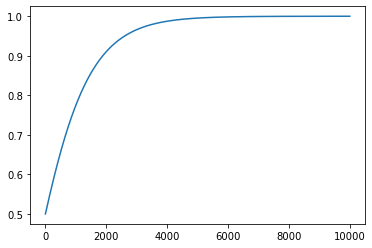

In [6]:
%run solutionCodeExercise19.py


### If really even numerical integration is tedious… call a specialist!

Above, we have tried to give you many tips to approach ODEs/PDEs. Some require little calculations, some more. In all cases, using these tips to try to solve the equations analytically will make you more comfortable with frequent mathematical calculations, and the more comfortable the more likely you will be to try to solve all problems this way. This is a good thing, a virtuous circle! 
More than often you will find useful to look in mathematics handbooks to search for formulas, solutions of known differential equations, values of integrals … The bible, in this purpose, is the book from Abramovitz and Stegun, a version of which can be found following this link: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjQ7rbi5r7uAhVJl4sKHS2ODzoQFjABegQIAhAC&url=http%3A%2F%2Fwww.math.ubc.ca%2F~cbm%2Faands%2Fabramowitz_and_stegun.pdf&usg=AOvVaw1U_ASCWo0L99YvAJxpCZOH 

However, sometimes, problems are just too complicated: we can’t find an analytical solution, and the schemes for numerical integration are unstable. Or the model is ill-defined and we don’t realize it. It is then important to keep in mind that mathematics is a constantly evolving field, and new solutions of old problems (or solutions of new problems arising from e.g., computational biomedicine!) are constantly found. The community of applied mathematicians and physicists is a friendly community, and with what you have learned here you will be able to clearly state your problem and the kind of answer you are looking for. This knowledge shall help you to set up collaborations.
 



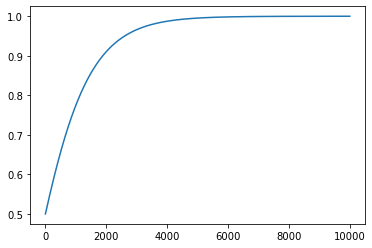